<a href="https://colab.research.google.com/github/MilkaKaplan/Portfolio_DS/blob/main/Copy_of_text_similarity_tf_idf_count_vectorizer_12_05_2023_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/Bahaakhalled/Bahaakhalled.github.io/blob/main/SubmittedMachinfy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align='center'>Unsupervised Textual Similarity</h1>

---

# Business Problem:

Finding the Similarity between multiple long sentences in terms of meaning

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from wordcloud import WordCloud 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.pipeline import Pipeline
import spacy
from collections import Counter
nlp = spacy.load('en_core_web_sm')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

###Getting to know the Data

In [4]:
data=pd.read_csv('/content/drive/MyDrive/ML OZON/OZON1.csv', encoding='utf-8')
data.head(3)


Номер пары  Идентичность пары  Порядковый номер1  \
0           1                  1                  1   
1           2                  1                  2   
2           3                  1                  3   

                                             ссылка1  \
0  https://www.ozon.ru/product/myagkaya-igrushka-...   
1  https://www.ozon.ru/product/detskaya-myagkaya-...   
2  https://www.ozon.ru/product/am-nyam-myagkaya-i...   

                                           название1  цена1  цена по карте1  \
0   Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см    430           421.0   
1  Детская мягкая игрушка Ам-ням для девочек для ...    392           384.0   
2  Ам ням мягкая игрушка/Cut the Rope Ам ням/зеле...    419           411.0   

                                           Описание1            Тип1  \
0  Лягушонок Ам Ням из игры Cut the Rope обязател...  Мягкая игрушка   
1           Ам-НямМягкий, нежный друг для ребенка!!!  Мягкая игрушка   
2  Лягушонок Ам Ням из игры Cut the Rope обязател...  Мягкая игрушка   

                 Материал1  ... Материал2  Вид игрушки2 Высота игрушки, см2  \
0                     Плюш  ...      Плюш       Лягушка                20.0   
1  Искусственные материалы  ...      Плюш       Лягушка                20.0   
2                      NaN  ...      Плюш       Лягушка                20.0   

     Цвет2 Дополнительные функции2 Страна-изготовитель2  \
0  Зеленый            Без эффектов                Китай   
1  Зеленый            Без эффектов                Китай   
2  Зеленый            Без эффектов                Китай   

  Минимальный возраст ребенка2 Персонаж2 Пол ребенка2  Бренд2  
0                   10 месяцев    Ам Ням      Унисекс     NaN  
1                   10 месяцев    Ам Ням      Унисекс     NaN  
2                   10 месяцев    Ам Ням      Унисекс     NaN  

[3 rows x 36 columns]

In [5]:
copydata=data.copy()
copydata.shape

(121, 36)

In [6]:
#все строки и столбцы в DataFrame будут полностью отображаться при выводе на экран
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [7]:
copydata.head(5)

Номер пары  Идентичность пары  Порядковый номер1  \
0           1                  1                  1   
1           2                  1                  2   
2           3                  1                  3   
3           4                  1                  4   
4           5                  1                  5   

                                             ссылка1  \
0  https://www.ozon.ru/product/myagkaya-igrushka-...   
1  https://www.ozon.ru/product/detskaya-myagkaya-...   
2  https://www.ozon.ru/product/am-nyam-myagkaya-i...   
3  https://www.ozon.ru/product/myagkaya-igrushka-...   
4  https://www.ozon.ru/product/am-nyam-829630932/...   

                                           название1  цена1  цена по карте1  \
0   Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см    430           421.0   
1  Детская мягкая игрушка Ам-ням для девочек для ...    392           384.0   
2  Ам ням мягкая игрушка/Cut the Rope Ам ням/зеле...    419           411.0   
3                     Мягкая игрушка Ам Ням/Ням Плам    419           411.0   
4                                             Ам ням    790           774.0   

                                           Описание1            Тип1  \
0  Лягушонок Ам Ням из игры Cut the Rope обязател...  Мягкая игрушка   
1           Ам-НямМягкий, нежный друг для ребенка!!!  Мягкая игрушка   
2  Лягушонок Ам Ням из игры Cut the Rope обязател...  Мягкая игрушка   
3  Лягушонок Ам Ням из игры Cut the Rope обязател...  Мягкая игрушка   
4  Амням игрушка мягкая необычайно яркая и забавн...  Мягкая игрушка   

                 Материал1        Вид игрушки1  Высота игрушки, см1    Цвет1  \
0                     Плюш             Лягушка                 20.0  Зеленый   
1  Искусственные материалы  Герои мультфильмов                 15.0  Зеленый   
2                      NaN             Лягушка                 18.0      NaN   
3                    Ткань             Лягушка                 18.0  Зеленый   
4                     Плюш             Лягушка                 20.0  Зеленый   

  Дополнительные функции1 Страна-изготовитель1 Минимальный возраст ребенка1  \
0            Без эффектов                Китай                   10 месяцев   
1            Без эффектов                Китай                    0 месяцев   
2                     NaN                  NaN                     От 2 лет   
3                     NaN                  NaN                   10 месяцев   
4            Без эффектов                Китай                     От 3 лет   

  Персонаж1 Пол ребенка1  Бренд1  Порядковый номер2  \
0    Ам Ням      Унисекс     NaN                  1   
1       NaN      Унисекс  SIDORI                  1   
2    Ам Ням      Унисекс     NaN                  1   
3    Ам Ням      Унисекс     NaN                  1   
4    Ам Ням      Унисекс     NaN                  1   

                                             ссылка2  \
0  https://www.ozon.ru/product/myagkaya-igrushka-...   
1  https://www.ozon.ru/product/myagkaya-igrushka-...   
2  https://www.ozon.ru/product/myagkaya-igrushka-...   
3  https://www.ozon.ru/product/myagkaya-igrushka-...   
4  https://www.ozon.ru/product/myagkaya-igrushka-...   

                                          название2  цена2  цена по карте2  \
0  Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см    430           421.0   
1  Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см    430           421.0   
2  Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см    430           421.0   
3  Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см    430           421.0   
4  Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см    430           421.0   

                                           Описание2            Тип2  \
0  Лягушонок Ам Ням из игры Cut the Rope обязател...  Мягкая игрушка   
1  Лягушонок Ам Ням из игры Cut the Rope обязател...  Мягкая игрушка   
2  Лягушонок Ам Ням из игры Cut the Rope обязател...  Мягкая игрушка   
3  Лягушонок Ам Ням из игры Cut the Rope обяза

**проверка пропусков или дублирования**

In [8]:
copydata[copydata.duplicated()].sum()

Номер пары                      0.0
Идентичность пары               0.0
Порядковый номер1               0.0
ссылка1                         0.0
название1                       0.0
цена1                           0.0
цена по карте1                  0.0
Описание1                       0.0
Тип1                            0.0
Материал1                       0.0
Вид игрушки1                    0.0
Высота игрушки, см1             0.0
Цвет1                           0.0
Дополнительные функции1         0.0
Страна-изготовитель1            0.0
Минимальный возраст ребенка1    0.0
Персонаж1                       0.0
Пол ребенка1                    0.0
Бренд1                          0.0
Порядковый номер2               0.0
ссылка2                         0.0
название2                       0.0
цена2                           0.0
цена по карте2                  0.0
Описание2                       0.0
Тип2                            0.0
Материал2                       0.0
Вид игрушки2                

In [9]:
# Displays colum names, complete (non-missing) cases per colum, and datatype per colum
copydata.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 36 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Номер пары                    121 non-null    int64  
 1   Идентичность пары             121 non-null    int64  
 2   Порядковый номер1             121 non-null    int64  
 3   ссылка1                       121 non-null    object 
 4   название1                     121 non-null    object 
 5   цена1                         121 non-null    int64  
 6   цена по карте1                77 non-null     float64
 7   Описание1                     121 non-null    object 
 8   Тип1                          121 non-null    object 
 9   Материал1                     110 non-null    object 
 10  Вид игрушки1                  121 non-null    object 
 11  Высота игрушки, см1           121 non-null    float64
 12  Цвет1                         110 non-null    object 
 13  Допол

Check for missing values and clean


In [10]:
# Возвращает «False», если значение не отсутствует, и «True», если значение отсутствует, для каждого значения в кадре данных
# It returns 'False' if a value is not missing and 'True' if a value is missing, for each value in a dataframe
copydata.isnull()


Номер пары  Идентичность пары  Порядковый номер1  ссылка1  название1  \
0         False              False              False    False      False   
1         False              False              False    False      False   
2         False              False              False    False      False   
3         False              False              False    False      False   
4         False              False              False    False      False   
5         False              False              False    False      False   
6         False              False              False    False      False   
7         False              False              False    False      False   
8         False              False              False    False      False   
9         False              False              False    False      False   
10        False              False              False    False      False   
11        False              False              False    False      False   
12        False              False              False    False      False   
13        False              False              False    False      False   
14        False              False              False    False      False   
15        False              False              False    False      False   
16        False              False              False    False      False   
17        False              False              False    False      False   
18        False              False              False    False      False   
19        False              False              False    False      False   
20        False              False              False    False      False   
21        False              False              False    False      False   
22        False              False              False    False      False   
23        False              False              False    False      False   
24        False              False              False    False      False   
25        False              False              False    False      False   
26        False              False              False    False      False   
27        False              False              False    False      False   
28        False              False              False    False      False   
29        False              False              False    False      False   
30        False              False              False    False      False   
31        False              False              False    False      False   
32        False              False              False    False      False   
33        False              False              False    False      False   
34        False              False              False    False      False   
35        False              False              False    False      False   
36        False              False              False    False      False   
37        False              False              False    False      False   
38        False              False              False    False      False   
39        False              False              False    False      False   
40        False              False              False    False      False   
41        False              False              False    False      False   
42        False              False              False    False      False   
43        False              False              False    False      False   
44        False              False              False    False      False   
45        False              False              False    False      False   
46        False              False              False    False      False   
47        False              False              False    False      False   
48        False              False              False    False      False   
49        False              False              False    False      False   
50        False              False              False    False      False   
5

In [11]:
#количество отсутствующих значений по каждому столбцу
copydata.isnull().sum()


Номер пары                       0
Идентичность пары                0
Порядковый номер1                0
ссылка1                          0
название1                        0
цена1                            0
цена по карте1                  44
Описание1                        0
Тип1                             0
Материал1                       11
Вид игрушки1                     0
Высота игрушки, см1              0
Цвет1                           11
Дополнительные функции1         33
Страна-изготовитель1            44
Минимальный возраст ребенка1     0
Персонаж1                       22
Пол ребенка1                     0
Бренд1                          55
Порядковый номер2                0
ссылка2                          0
название2                        0
цена2                            0
цена по карте2                  44
Описание2                        0
Тип2                             0
Материал2                       11
Вид игрушки2                     0
Высота игрушки, см2 

In [12]:
#приводим написание колонок к единому стилю
copydata=copydata.rename(columns={'Номер пары':'номер_пары', 'Идентичность пары':'идентичность_пары', 'Порядковый номер1':'порядковый_номер1', 'цена по карте1':'цена_по_карте1',
                                  'Описание1':'описание1', 'Тип1':'тип1', 'Материал1':'материал1', 'Вид игрушки1':'вид_игрушки1', 'Высота игрушки, см1':'высота_игрушки_см1',
                                  'Цвет1': 'цвет1', 'Дополнительные функции1':'доп_функции1', 'Страна-изготовитель1':'страна_изготовитель1', 'Минимальный возраст ребенка1':'мин_возраст1', 
                                  'Персонаж1' : 'персонаж1', 'Пол ребенка1':'пол_1', 'Бренд1':'бренд1', 'Порядковый номер2':'порядковый_номер2', 'цена по карте2':'цена_по_карте2', 
                                  'Описание2':'описание2', 'Тип2':'тип2', 'Материал2':'материал2', 'Вид игрушки2':'вид_игрушки2', 'Высота игрушки, см2':'высота_игрушки_см2', 'Цвет2':'цвет2',
                                  'Дополнительные функции2':'доп_функции2', 'Страна-изготовитель2':'страна_изготовитель2', 'Минимальный возраст ребенка2':'мин_возраст2',
                                  'Персонаж2':'персонаж2', 'Пол ребенка2':'пол2', 'Бренд2':'бренд2'}) 

#проверяем
copydata.columns 

Index(['номер_пары', 'идентичность_пары', 'порядковый_номер1', 'ссылка1',
       'название1', 'цена1', 'цена_по_карте1', 'описание1', 'тип1',
       'материал1', 'вид_игрушки1', 'высота_игрушки_см1', 'цвет1',
       'доп_функции1', 'страна_изготовитель1', 'мин_возраст1', 'персонаж1',
       'пол_1', 'бренд1', 'порядковый_номер2', 'ссылка2', 'название2', 'цена2',
       'цена_по_карте2', 'описание2', 'тип2', 'материал2', 'вид_игрушки2',
       'высота_игрушки_см2', 'цвет2', 'доп_функции2', 'страна_изготовитель2',
       'мин_возраст2', 'персонаж2', 'пол2', 'бренд2'],
      dtype='object')

In [13]:
copydata.head(3)

номер_пары  идентичность_пары  порядковый_номер1  \
0           1                  1                  1   
1           2                  1                  2   
2           3                  1                  3   

                                             ссылка1  \
0  https://www.ozon.ru/product/myagkaya-igrushka-...   
1  https://www.ozon.ru/product/detskaya-myagkaya-...   
2  https://www.ozon.ru/product/am-nyam-myagkaya-i...   

                                           название1  цена1  цена_по_карте1  \
0   Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см    430           421.0   
1  Детская мягкая игрушка Ам-ням для девочек для ...    392           384.0   
2  Ам ням мягкая игрушка/Cut the Rope Ам ням/зеле...    419           411.0   

                                           описание1            тип1  \
0  Лягушонок Ам Ням из игры Cut the Rope обязател...  Мягкая игрушка   
1           Ам-НямМягкий, нежный друг для ребенка!!!  Мягкая игрушка   
2  Лягушонок Ам Ням из игры Cut the Rope обязател...  Мягкая игрушка   

                 материал1        вид_игрушки1  высота_игрушки_см1    цвет1  \
0                     Плюш             Лягушка                20.0  Зеленый   
1  Искусственные материалы  Герои мультфильмов                15.0  Зеленый   
2                      NaN             Лягушка                18.0      NaN   

   доп_функции1 страна_изготовитель1 мин_возраст1 персонаж1    пол_1  бренд1  \
0  Без эффектов                Китай   10 месяцев    Ам Ням  Унисекс     NaN   
1  Без эффектов                Китай    0 месяцев       NaN  Унисекс  SIDORI   
2           NaN                  NaN     От 2 лет    Ам Ням  Унисекс     NaN   

   порядковый_номер2                                            ссылка2  \
0                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   
1                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   
2                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   

                                          название2  цена2  цена_по_карте2  \
0  Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см    430           421.0   
1  Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см    430           421.0   
2  Мягкая игрушка Ам Ням/ Cut the Rope/ Ам ням 20см    430           421.0   

                                           описание2            тип2  \
0  Лягушонок Ам Ням из игры Cut the Rope обязател...  Мягкая игрушка   
1  Лягушонок Ам Ням из игры Cut the Rope обязател...  Мягкая игрушка   
2  Лягушонок Ам Ням из игры Cut the Rope обязател...  Мягкая игрушка   

  материал2 вид_игрушки2  высота_игрушки_см2    цвет2  доп_функции2  \
0      Плюш      Лягушка                20.0  Зеленый  Без эффектов   
1      Плюш      Лягушка                20.0  Зеленый  Без эффектов   
2      Плюш      Лягушка                20.0  Зеленый  Без эффектов   

  страна_изготовитель2 мин_возраст2 персонаж2     пол2 бренд2  
0                Китай   10 месяцев    Ам Ням  Унисекс    NaN  
1                Китай   10 месяцев    Ам Ням  Унисекс    NaN  
2                Китай   10 месяцев    Ам Ням  Унисекс    NaN

In [14]:
#приводим написание значений столбцов к нижнему регистру

copydata[['название1', 'описание1', 'тип1', 'материал1', 'вид_игрушки1', 'цвет1', 'доп_функции1', 'страна_изготовитель1', 'мин_возраст1',
          'персонаж1', 'пол_1', 'бренд1', 'название2', 'описание2', 'тип2', 'материал2', 'вид_игрушки2', 'цвет2', 'доп_функции2', 'страна_изготовитель2',
          'мин_возраст2', 'персонаж2', 'пол2', 'бренд2']] = copydata[['название1', 'описание1', 'тип1', 'материал1', 'вид_игрушки1', 'цвет1', 'доп_функции1',
          'страна_изготовитель1', 'мин_возраст1', 'персонаж1', 'пол_1', 'бренд1', 'название2', 'описание2', 'тип2', 'материал2', 'вид_игрушки2', 'цвет2',
          'доп_функции2', 'страна_изготовитель2', 'мин_возраст2', 'персонаж2', 'пол2', 'бренд2']].astype(str).apply(lambda x: x.str.lower())
 

In [15]:
copydata.head(3)

номер_пары  идентичность_пары  порядковый_номер1  \
0           1                  1                  1   
1           2                  1                  2   
2           3                  1                  3   

                                             ссылка1  \
0  https://www.ozon.ru/product/myagkaya-igrushka-...   
1  https://www.ozon.ru/product/detskaya-myagkaya-...   
2  https://www.ozon.ru/product/am-nyam-myagkaya-i...   

                                           название1  цена1  цена_по_карте1  \
0   мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430           421.0   
1  детская мягкая игрушка ам-ням для девочек для ...    392           384.0   
2  ам ням мягкая игрушка/cut the rope ам ням/зеле...    419           411.0   

                                           описание1            тип1  \
0  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
1           ам-няммягкий, нежный друг для ребенка!!!  мягкая игрушка   
2  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   

                 материал1        вид_игрушки1  высота_игрушки_см1    цвет1  \
0                     плюш             лягушка                20.0  зеленый   
1  искусственные материалы  герои мультфильмов                15.0  зеленый   
2                      nan             лягушка                18.0      nan   

   доп_функции1 страна_изготовитель1 мин_возраст1 персонаж1    пол_1  бренд1  \
0  без эффектов                китай   10 месяцев    ам ням  унисекс     nan   
1  без эффектов                китай    0 месяцев       nan  унисекс  sidori   
2           nan                  nan     от 2 лет    ам ням  унисекс     nan   

   порядковый_номер2                                            ссылка2  \
0                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   
1                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   
2                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   

                                          название2  цена2  цена_по_карте2  \
0  мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430           421.0   
1  мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430           421.0   
2  мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430           421.0   

                                           описание2            тип2  \
0  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
1  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
2  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   

  материал2 вид_игрушки2  высота_игрушки_см2    цвет2  доп_функции2  \
0      плюш      лягушка                20.0  зеленый  без эффектов   
1      плюш      лягушка                20.0  зеленый  без эффектов   
2      плюш      лягушка                20.0  зеленый  без эффектов   

  страна_изготовитель2 мин_возраст2 персонаж2     пол2 бренд2  
0                китай   10 месяцев    ам ням  унисекс    nan  
1                китай   10 месяцев    ам ням  унисекс    nan  
2                китай   10 месяцев    ам ням  унисекс    nan

In [16]:
#Заменяем отсутствующие значения в столбце 'цена по карте1' значениями из столбца 'цена1'
copydata['цена_по_карте1'].fillna(copydata['цена1'], inplace=True)


In [17]:
copydata.iloc[6]

номер_пары                                                              7
идентичность_пары                                                       0
порядковый_номер1                                                       7
ссылка1                 https://www.ozon.ru/product/toys-figurka-igrus...
название1               toys фигурка игрушка башкатряс амням персонаж ...
цена1                                                                1618
цена_по_карте1                                                     1618.0
описание1               фигурка-башкотряс амням персонаж популярной ин...
тип1                                                              фигурка
материал1                                                         пластик
вид_игрушки1                                             \nфункциональная
высота_игрушки_см1                                                   10.0
цвет1                                                      зеленый, белый
доп_функции1            с головой на п

In [18]:
#количество отсутствующих значений (NaN) в столбце 'цена_по_карте1' 
copydata['цена_по_карте1'].isnull().sum()

0

In [19]:
#уникальные значения 
copydata['материал1'].unique()

array(['плюш', 'искусственные материалы', 'nan', 'ткань', 'пластик, пвх',
       'пластик', 'мягкий материал'], dtype=object)

Учитывая, что отсутствует единый стандарт для заполнения поля имеет смысл сравнивать поле по тексту, а не создавать отдельные категории. Либо все редкие категории объединить в одну

In [20]:
# Заменяем пустые значения на "материал_неизвестен" либо можно заменить на наиболее часто встречающиеся значения
copydata['материал1'].fillna('НЕизвестны', inplace=True)


In [21]:
#количество отсутствующих значений (NaN) в столбце 'материал1'
copydata['материал1'].isnull().sum()

0

In [22]:
#уникальные значения 
copydata['цвет1'].unique()

array(['зеленый', 'nan', 'белый, черный', 'зеленый, белый'], dtype=object)

In [23]:
# Заменяем пустые значения на наиболее часто встречающиеся
copydata['цвет1'].fillna(copydata['цвет1'].mode(), inplace=True)



In [24]:
#количество отсутствующих значений (NaN) в столбце 'цвет1'
copydata['цвет1'].isnull().sum()

0

In [25]:
#наиболее часто встречающееся значение) столбца 'цвет1' 
copydata['цвет1'].mode()

0           зеленый
1    зеленый, белый
Name: цвет1, dtype: object

In [26]:
# заменили пустые значения на 'Зеленый'
copydata['цвет1'].fillna(copydata['цвет1'].mode()[0],inplace=True)


In [27]:
copydata['цвет1']. isnull().sum()

0

In [28]:
#уникальные значения 
copydata['страна_изготовитель1'].unique()

array(['китай', 'nan', 'россия'], dtype=object)

In [29]:
# Ввиду того, что отсутствует 30% значений, для отсутствующих значений отражаем 'не_известна'
copydata['страна_изготовитель1'].fillna('НЕизвестны', inplace=True)

In [30]:
#количество отсутствующих значений (NaN) в столбце 'страна_изготовитель1'
copydata['страна_изготовитель1'].isnull().sum()

0

In [94]:
# отсутствует 20% значений, заменяем на "персонаж_не_известен"
copydata['персонаж1'].fillna('нет', inplace = True)


In [95]:
#количество отсутствующих значений (NaN) в столбце 'персонаж1'
copydata['персонаж1'].isnull().sum()

0

In [33]:
# отсутствующие значения заменяем на 'бренд_не_известен'
copydata['бренд1'].fillna('НЕизвестны', inplace = True)


In [34]:
#количество отсутствующих значений (NaN) в столбце 'бренд1'
copydata['бренд1'].isnull().sum()

0

In [35]:
#Заменяем отсутствующие значения в столбце 'цена по карте2' значениями из столбца 'цена2'
copydata['цена_по_карте2'].fillna(copydata['цена2'], inplace=True)


In [36]:
#количество отсутствующих значений (NaN) в столбце 'цена_по_карте2'
copydata['цена_по_карте2'].isnull().sum()

0

In [37]:
#Заменяем отсутствующие значения в столбце 'материал2' значениями из столбца 'материал_неизвестен'
copydata['материал2'].fillna('НЕизвестны', inplace=True)

In [38]:
#количество отсутствующих значений (NaN) в столбце 'материал2'
copydata['материал2'].isnull().sum()

0

In [39]:
#Заменяем отсутствующие значения в столбце 'цвет2' на частое значениями из столбца 'цвет2'
copydata['цвет2'].fillna(copydata['цвет2'].mode()[0],inplace=True)

In [40]:
#Заменяем отсутствующие значения в столбце 'страна_изготовитель2' значениями из столбца 'не_известна'
copydata['страна_изготовитель2'].fillna('НЕизвестны', inplace=True)

In [41]:
#Заменяем отсутствующие значения в столбце 'персонаж2' значениями из столбца 'персонаж_не_известен'
copydata['персонаж2'].fillna('НЕизвестны', inplace = True)

In [42]:
#Заменяем отсутствующие значения в столбце 'бренд2' значениями из столбца 'бренд_не_известен'
copydata['бренд2'].fillna('НЕизвестны', inplace = True)

In [45]:
#Заменяем отсутствующие значения в столбце 'доп_функции1' значениями из столбца 'доп_функции1_не_известны'
copydata['доп_функции1'].fillna('НЕизвестны', inplace=True)

In [46]:
#Заменяем отсутствующие значения в столбце 'доп_функции2' значениями из столбца 'доп_функции2_не_известны'
copydata['доп_функции2'].fillna('НЕизвестны', inplace=True)

In [47]:
#количество отсутствующих значений (NaN)
missing_values = copydata.isna().sum()
print(missing_values)

номер_пары              0
идентичность_пары       0
порядковый_номер1       0
ссылка1                 0
название1               0
цена1                   0
цена_по_карте1          0
описание1               0
тип1                    0
материал1               0
вид_игрушки1            0
высота_игрушки_см1      0
цвет1                   0
доп_функции1            0
страна_изготовитель1    0
мин_возраст1            0
персонаж1               0
пол_1                   0
бренд1                  0
порядковый_номер2       0
ссылка2                 0
название2               0
цена2                   0
цена_по_карте2          0
описание2               0
тип2                    0
материал2               0
вид_игрушки2            0
высота_игрушки_см2      0
цвет2                   0
доп_функции2            0
страна_изготовитель2    0
мин_возраст2            0
персонаж2               0
пол2                    0
бренд2                  0
dtype: int64


In [53]:
copydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   номер_пары            121 non-null    int64  
 1   идентичность_пары     121 non-null    int64  
 2   порядковый_номер1     121 non-null    int64  
 3   ссылка1               121 non-null    object 
 4   название1             121 non-null    object 
 5   цена1                 121 non-null    int64  
 6   цена_по_карте1        121 non-null    int16  
 7   описание1             121 non-null    object 
 8   тип1                  121 non-null    object 
 9   материал1             121 non-null    object 
 10  вид_игрушки1          121 non-null    object 
 11  высота_игрушки_см1    121 non-null    float64
 12  цвет1                 121 non-null    object 
 13  доп_функции1          121 non-null    object 
 14  страна_изготовитель1  121 non-null    object 
 15  мин_возраст1          1

In [54]:
#преобразование столбца 'цена_по_карте1' в объекте DataFrame copydata в числовой формат с знаком (signed)
copydata['цена_по_карте1']=pd.to_numeric(copydata['цена_по_карте1'], downcast='signed')


In [56]:
#уникальные значения 
copydata['цена_по_карте1'].unique()

array([ 421,  384,  411,  774, 1289, 1618, 1936, 1549,  775, 1645],
      dtype=int16)

In [51]:
#уникальные значения 
data['цена по карте1'].unique()

array([ 421.,  384.,  411.,  774., 1289.,   nan, 1645.])

In [57]:
copydata['цена_по_карте1'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 121 entries, 0 to 120
Series name: цена_по_карте1
Non-Null Count  Dtype
--------------  -----
121 non-null    int16
dtypes: int16(1)
memory usage: 370.0 bytes


In [59]:
#заменяем NaN на 0 и приводим к типу int
#copydata['цена_по_карте1'] = pd.to_numeric(copydata['цена_по_карте1'], errors='coerce').fillna(0)

copydata['цена_по_карте1'] = copydata['цена_по_карте1'].apply(lambda x: int(str(x).replace('.', '')))


In [60]:
copydata.head(3)

номер_пары  идентичность_пары  порядковый_номер1  \
0           1                  1                  1   
1           2                  1                  2   
2           3                  1                  3   

                                             ссылка1  \
0  https://www.ozon.ru/product/myagkaya-igrushka-...   
1  https://www.ozon.ru/product/detskaya-myagkaya-...   
2  https://www.ozon.ru/product/am-nyam-myagkaya-i...   

                                           название1  цена1  цена_по_карте1  \
0   мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430             421   
1  детская мягкая игрушка ам-ням для девочек для ...    392             384   
2  ам ням мягкая игрушка/cut the rope ам ням/зеле...    419             411   

                                           описание1            тип1  \
0  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
1           ам-няммягкий, нежный друг для ребенка!!!  мягкая игрушка   
2  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   

                 материал1        вид_игрушки1  высота_игрушки_см1    цвет1  \
0                     плюш             лягушка                20.0  зеленый   
1  искусственные материалы  герои мультфильмов                15.0  зеленый   
2                      nan             лягушка                18.0      nan   

   доп_функции1 страна_изготовитель1 мин_возраст1 персонаж1    пол_1  бренд1  \
0  без эффектов                китай   10 месяцев    ам ням  унисекс     nan   
1  без эффектов                китай    0 месяцев       nan  унисекс  sidori   
2           nan                  nan     от 2 лет    ам ням  унисекс     nan   

   порядковый_номер2                                            ссылка2  \
0                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   
1                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   
2                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   

                                          название2  цена2  цена_по_карте2  \
0  мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430           421.0   
1  мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430           421.0   
2  мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430           421.0   

                                           описание2            тип2  \
0  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
1  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
2  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   

  материал2 вид_игрушки2  высота_игрушки_см2    цвет2  доп_функции2  \
0      плюш      лягушка                20.0  зеленый  без эффектов   
1      плюш      лягушка                20.0  зеленый  без эффектов   
2      плюш      лягушка                20.0  зеленый  без эффектов   

  страна_изготовитель2 мин_возраст2 персонаж2     пол2 бренд2  
0                китай   10 месяцев    ам ням  унисекс    nan  
1                китай   10 месяцев    ам ням  унисекс    nan  
2                китай   10 месяцев    ам ням  унисекс    nan

In [61]:
#преобразование столбца 'цена_по_карте2' в объекте DataFrame copydata в числовой формат с знаком (signed)
copydata['цена_по_карте2']=pd.to_numeric(copydata['цена_по_карте2'], downcast='signed')

In [62]:
#уникальные значения copydata['цена_по_карте2']
copydata['цена_по_карте2'].unique()

array([ 421,  384,  411,  774, 1289, 1618, 1936, 1549,  775, 1645],
      dtype=int16)

In [159]:
#уникальные значения data['цена по карте2']
data['цена по карте2'].unique()

array([ 421.,  384.,  411.,  774., 1289.,   nan, 1645.])

In [63]:
copydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   номер_пары            121 non-null    int64  
 1   идентичность_пары     121 non-null    int64  
 2   порядковый_номер1     121 non-null    int64  
 3   ссылка1               121 non-null    object 
 4   название1             121 non-null    object 
 5   цена1                 121 non-null    int64  
 6   цена_по_карте1        121 non-null    int64  
 7   описание1             121 non-null    object 
 8   тип1                  121 non-null    object 
 9   материал1             121 non-null    object 
 10  вид_игрушки1          121 non-null    object 
 11  высота_игрушки_см1    121 non-null    float64
 12  цвет1                 121 non-null    object 
 13  доп_функции1          121 non-null    object 
 14  страна_изготовитель1  121 non-null    object 
 15  мин_возраст1          1

In [64]:
#уникальные значения
copydata['высота_игрушки_см1'].unique()

array([20. , 15. , 18. ,  3.5, 10. ])

In [65]:
#уникальные значения
copydata['высота_игрушки_см2'].unique()


array([20. , 15. , 18. ,  3.5, 10. ])

In [66]:
copydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   номер_пары            121 non-null    int64  
 1   идентичность_пары     121 non-null    int64  
 2   порядковый_номер1     121 non-null    int64  
 3   ссылка1               121 non-null    object 
 4   название1             121 non-null    object 
 5   цена1                 121 non-null    int64  
 6   цена_по_карте1        121 non-null    int64  
 7   описание1             121 non-null    object 
 8   тип1                  121 non-null    object 
 9   материал1             121 non-null    object 
 10  вид_игрушки1          121 non-null    object 
 11  высота_игрушки_см1    121 non-null    float64
 12  цвет1                 121 non-null    object 
 13  доп_функции1          121 non-null    object 
 14  страна_изготовитель1  121 non-null    object 
 15  мин_возраст1          1

#Создание новых столбцов


In [67]:
#Создаем новые столбцы:
# Разница между столбцами цена1 и цена2.
copydata['разница_"цена1"_и_"цена2"'] =  copydata['цена1'] - copydata['цена2']


In [68]:
# Разница между столбцами цена по карте1 и цена по карте2
copydata['разница_"цена_по_карте1"_и_"цена_по_карте2"'] = copydata['цена_по_карте1'] - copydata['цена_по_карте2']


In [69]:
# Разница между столбцами Высота игрушки, см1 и Высота игрушки, см2
copydata['разница_"высота_игрушки_см1"_и_"высота_игрушки_см2"'] = copydata['высота_игрушки_см1'] - copydata['высота_игрушки_см2']


In [70]:
#уникальные значения
copydata['разница_"цена1"_и_"цена2"'].unique()

array([    0,   -38,   -11,   360,   885,  1188,  1506,  1119,   345,
        3070,    38,    27,   398,   923,  1226,  1544,  1157,   383,
        3108,    11,   -27,   371,   896,  1199,  1517,  1130,   356,
        3081,  -360,  -398,  -371,   525,   828,  1146,   759,   -15,
        2710,  -885,  -923,  -896,  -525,   303,   621,   234,  -540,
        2185, -1188, -1226, -1199,  -828,  -303,   318,   -69,  -843,
        1882, -1506, -1544, -1517, -1146,  -621,  -318,  -387, -1161,
        1564, -1119, -1157, -1130,  -759,  -234,    69,   387,  -774,
        1951,  -345,  -383,  -356,    15,   540,   843,  1161,   774,
        2725, -3070, -3108, -3081, -2710, -2185, -1882, -1564, -1951,
       -2725])

In [71]:
#уникальные значения
copydata['разница_"цена_по_карте1"_и_"цена_по_карте2"'].unique()


array([    0,   -37,   -10,   353,   868,  1197,  1515,  1128,   354,
        1224,    37,    27,   390,   905,  1234,  1552,  1165,   391,
        1261,    10,   -27,   363,   878,  1207,  1525,  1138,   364,
        -353,  -390,  -363,   515,   844,  1162,   775,     1,   871,
        -868,  -905,  -878,  -515,   329,   647,   260,  -514,   356,
       -1197, -1234, -1207,  -844,  -329,   318,   -69,  -843, -1515,
       -1552, -1525, -1162,  -647,  -318,  -387, -1161,  -291, -1128,
       -1165, -1138,  -775,  -260,    69,   387,  -774,    96,  -354,
        -391,  -364,    -1,   514,   843,  1161,   774,   870, -1224,
       -1261,  -871,  -356,   291,   -96,  -870])

In [72]:
#уникальные значения
copydata['разница_"высота_игрушки_см1"_и_"высота_игрушки_см2"'].unique()

array([  0. ,  -5. ,  -2. , -16.5, -10. ,   5. ,   3. , -11.5,   2. ,
        -3. , -14.5,  -8. ,  16.5,  11.5,  14.5,   6.5,  10. ,   8. ,
        -6.5])

In [73]:
#новый столбец 'разница_"цена1"и"цена2"' будет содержать абсолютные значения разницы между значениями из исходного столбца 
copydata['разница_"цена1"_и_"цена2"'] = abs(copydata['разница_"цена1"_и_"цена2"'])

In [74]:
#уникальные значения
copydata['разница_"цена1"_и_"цена2"'].unique()

array([   0,   38,   11,  360,  885, 1188, 1506, 1119,  345, 3070,   27,
        398,  923, 1226, 1544, 1157,  383, 3108,  371,  896, 1199, 1517,
       1130,  356, 3081,  525,  828, 1146,  759,   15, 2710,  303,  621,
        234,  540, 2185,  318,   69,  843, 1882,  387, 1161, 1564,  774,
       1951, 2725])

In [75]:
#новый столбец 'разница_"высота_игрушки_см1"_и_"высота_игрушки_см2"' будет содержать абсолютные значения разницы между значениями из исходного столбца 
copydata['разница_"высота_игрушки_см1"_и_"высота_игрушки_см2"'] = abs(copydata['разница_"высота_игрушки_см1"_и_"высота_игрушки_см2"'])

In [76]:
#новый столбец 'разница_"цена_по_карте1"_и_"цена_по_карте2"' будет содержать абсолютные значения разницы между значениями из исходного столбца 
copydata['разница_"цена_по_карте1"_и_"цена_по_карте2"'] = abs(copydata['разница_"цена_по_карте1"_и_"цена_по_карте2"'])


In [77]:
copydata.head(5)

номер_пары  идентичность_пары  порядковый_номер1  \
0           1                  1                  1   
1           2                  1                  2   
2           3                  1                  3   
3           4                  1                  4   
4           5                  1                  5   

                                             ссылка1  \
0  https://www.ozon.ru/product/myagkaya-igrushka-...   
1  https://www.ozon.ru/product/detskaya-myagkaya-...   
2  https://www.ozon.ru/product/am-nyam-myagkaya-i...   
3  https://www.ozon.ru/product/myagkaya-igrushka-...   
4  https://www.ozon.ru/product/am-nyam-829630932/...   

                                           название1  цена1  цена_по_карте1  \
0   мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430             421   
1  детская мягкая игрушка ам-ням для девочек для ...    392             384   
2  ам ням мягкая игрушка/cut the rope ам ням/зеле...    419             411   
3                     мягкая игрушка ам ням/ням плам    419             411   
4                                             ам ням    790             774   

                                           описание1            тип1  \
0  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
1           ам-няммягкий, нежный друг для ребенка!!!  мягкая игрушка   
2  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
3  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
4  амням игрушка мягкая необычайно яркая и забавн...  мягкая игрушка   

                 материал1        вид_игрушки1  высота_игрушки_см1    цвет1  \
0                     плюш             лягушка                20.0  зеленый   
1  искусственные материалы  герои мультфильмов                15.0  зеленый   
2                      nan             лягушка                18.0      nan   
3                    ткань             лягушка                18.0  зеленый   
4                     плюш             лягушка                20.0  зеленый   

   доп_функции1 страна_изготовитель1 мин_возраст1 персонаж1    пол_1  бренд1  \
0  без эффектов                китай   10 месяцев    ам ням  унисекс     nan   
1  без эффектов                китай    0 месяцев       nan  унисекс  sidori   
2           nan                  nan     от 2 лет    ам ням  унисекс     nan   
3           nan                  nan   10 месяцев    ам ням  унисекс     nan   
4  без эффектов                китай     от 3 лет    ам ням  унисекс     nan   

   порядковый_номер2                                            ссылка2  \
0                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   
1                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   
2                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   
3                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   
4                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   

                                          название2  цена2  цена_по_карте2  \
0  мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430             421   
1  мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430             421   
2  мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430             421   
3  мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430             421   
4  мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430             421   

                                           описание2            тип2  \
0  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
1  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
2  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
3  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
4  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   

  материал2 вид_игрушки2  высота_игрушки_см2    цвет2  доп_функции2  \
0      плюш      лягушка                20.0  з

In [78]:
#Объединяем в одно значение характеристики, имеющие менее 10%_1 отсутствующих значений и отдельно более 10% (экспертно)
copydata['Характеристики отсутствующие значения <10%_1'] = copydata['описание1'] + ' ' + copydata['тип1'] + ' '  + copydata['материал1'] + ' '\
+ copydata['вид_игрушки1']  + ' ' + copydata['цвет1'] + ' '  + copydata['мин_возраст1']  + ' ' + copydata['пол_1']


In [79]:
#Объединяем в одно значение характеристики, имеющие менее 10%_2 отсутствующих значений и отдельно более 10% (экспертно)
copydata['Характеристики отсутствующие значения <10%_2'] = copydata['описание2']+ ' ' + copydata['тип2'] + ' '+ copydata['материал2']+ ' ' + copydata['вид_игрушки2']\
+ ' ' + copydata['цвет2']+ ' ' + copydata['мин_возраст2'] + ' '+ copydata['пол2']

In [80]:
#Объединяем в одно значение характеристики, имеющие более 10%_1 отсутствующих значений и отдельно более 10% (экспертно)
copydata['Характеристики отсутствующие значения >10%_1'] = copydata['доп_функции1']+ ' ' + copydata['страна_изготовитель1']+ ' ' + copydata['персонаж1'] + ' '+ copydata['бренд1'] 

In [96]:
copydata['Характеристики отсутствующие значения >10%_1'].isnull().sum()

0

In [81]:
#Объединяем в одно значение характеристики, имеющие более 10%_2 отсутствующих значений и отдельно более 10% (экспертно)
copydata['Характеристики отсутствующие значения >10%_2'] = copydata['доп_функции1']+ ' ' + copydata['страна_изготовитель1']+ ' ' + copydata['персонаж1'] + ' '+ copydata['бренд1'] 

In [97]:
copydata['Характеристики отсутствующие значения >10%_2'].isnull().sum()

0

In [82]:
copydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 43 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   номер_пары                                           121 non-null    int64  
 1   идентичность_пары                                    121 non-null    int64  
 2   порядковый_номер1                                    121 non-null    int64  
 3   ссылка1                                              121 non-null    object 
 4   название1                                            121 non-null    object 
 5   цена1                                                121 non-null    int64  
 6   цена_по_карте1                                       121 non-null    int64  
 7   описание1                                            121 non-null    object 
 8   тип1                                                 121 non-null    o

##Functions

All Functions Used in Notebook:


1.   Remove Punctuation
2.   Lower Case
3.   Tokenize
4.   Remove Stop Words
5.   Remove Digits
6.   Lemmatize
7.   Remove empty tokens
8.   Remove single meaningless letters
9.   Detokenize
10.  Remove Spaces
11.  Count Vectorizer + Cosine Similarity
12.  Tf-Idf Vectorizer + Cosine Similarity





Создание наборов данных для поиска косинусной близости в разрезе характеристик

In [83]:
#названия всех столбцов 
copydata.columns.values

array(['номер_пары', 'идентичность_пары', 'порядковый_номер1', 'ссылка1',
       'название1', 'цена1', 'цена_по_карте1', 'описание1', 'тип1',
       'материал1', 'вид_игрушки1', 'высота_игрушки_см1', 'цвет1',
       'доп_функции1', 'страна_изготовитель1', 'мин_возраст1',
       'персонаж1', 'пол_1', 'бренд1', 'порядковый_номер2', 'ссылка2',
       'название2', 'цена2', 'цена_по_карте2', 'описание2', 'тип2',
       'материал2', 'вид_игрушки2', 'высота_игрушки_см2', 'цвет2',
       'доп_функции2', 'страна_изготовитель2', 'мин_возраст2',
       'персонаж2', 'пол2', 'бренд2', 'разница_"цена1"_и_"цена2"',
       'разница_"цена_по_карте1"_и_"цена_по_карте2"',
       'разница_"высота_игрушки_см1"_и_"высота_игрушки_см2"',
       'Характеристики отсутствующие значения <10%_1',
       'Характеристики отсутствующие значения <10%_2',
       'Характеристики отсутствующие значения >10%_1',
       'Характеристики отсутствующие значения >10%_2'], dtype=object)

In [84]:
#новый объект copydata_nazvanie, который содержит только столбцы 'номер_пары', 'название1' и 'название2' из исходного DataFrame copydata
copydata_nazvanie=copydata.loc[:, ['номер_пары', 'название1','название2']]
copydata_nazvanie.head(2)

номер_пары                                          название1  \
0           1   мягкая игрушка ам ням/ cut the rope/ ам ням 20см   
1           2  детская мягкая игрушка ам-ням для девочек для ...   

                                          название2  
0  мягкая игрушка ам ням/ cut the rope/ ам ням 20см  
1  мягкая игрушка ам ням/ cut the rope/ ам ням 20см

In [85]:
#новый объект copydata_opisanie, который содержит только столбцы 'номер_пары', 'описание1' и 'описание2' из исходного DataFrame copydata
copydata_opisanie=copydata.loc[:, ['номер_пары', 'описание1','описание2']]
copydata_opisanie.head(2)

номер_пары                                          описание1  \
0           1  лягушонок ам ням из игры cut the rope обязател...   
1           2           ам-няммягкий, нежный друг для ребенка!!!   

                                           описание2  
0  лягушонок ам ням из игры cut the rope обязател...  
1  лягушонок ам ням из игры cut the rope обязател...

In [86]:
#новый объект copydata_tip, который содержит только столбцы 'номер_пары', 'тип2' и 'описание2' из исходного DataFrame copydata
copydata_tip = copydata.loc[:, ['номер_пары', 'тип1','тип2']]
copydata_tip.head(2)

номер_пары            тип1            тип2
0           1  мягкая игрушка  мягкая игрушка
1           2  мягкая игрушка  мягкая игрушка

In [87]:
#новый объект copydata_material, который содержит только столбцы 'материал1' и 'материал2' из исходного DataFrame copydata
copydata_material = copydata.loc[:, ['материал1','материал2']]
copydata_material.head(2)

материал1 материал2
0                     плюш      плюш
1  искусственные материалы      плюш

In [88]:
#новый объект copydata_vid_igrushki, который содержит только столбцы 'вид_игрушки1' и 'вид_игрушки2' из исходного DataFrame copydata
copydata_vid_igrushki = copydata.loc[:, ['вид_игрушки1','вид_игрушки2']]
copydata_vid_igrushki.head(2)

вид_игрушки1 вид_игрушки2
0             лягушка      лягушка
1  герои мультфильмов      лягушка

In [89]:
#новый объект copydata_color, который содержит только столбцы 'цвет1' и 'цвет2' из исходного DataFrame copydata
copydata_color = copydata.loc[:, ['цвет1','цвет2']]
copydata_color.head(2)

цвет1    цвет2
0  зеленый  зеленый
1  зеленый  зеленый

In [90]:
#новый объект copydata_dop_fun, который содержит только столбцы 'доп_функции1' и 'доп_функции2' из исходного DataFrame copydata
copydata_dop_fun = copydata.loc[:, ['доп_функции1','доп_функции2']]
copydata_dop_fun.head(2)

доп_функции1  доп_функции2
0  без эффектов  без эффектов
1  без эффектов  без эффектов

In [91]:
#новый объект copydata_country, который содержит только столбцы 'страна_изготовитель1' и 'страна_изготовитель2' из исходного DataFrame copydata
copydata_country = copydata.loc[:, ['страна_изготовитель1','страна_изготовитель2']]
copydata_country.head(2)

страна_изготовитель1 страна_изготовитель2
0                китай                китай
1                китай                китай

In [92]:
#новый объект copydata_min_age, который содержит только столбцы 'мин_возраст1' и 'мин_возраст2' из исходного DataFrame copydata
copydata_min_age = copydata.loc[:, ['мин_возраст1','мин_возраст2']]
copydata_min_age.head(2)

мин_возраст1 мин_возраст2
0   10 месяцев   10 месяцев
1    0 месяцев   10 месяцев

In [93]:
#новый объект copydata_personaz, который содержит только столбцы 'персонаж1' и 'персонаж2' из исходного DataFrame copydata
copydata_personaz = copydata.loc[:, ['персонаж1','персонаж2']]
copydata_personaz.head(2)

персонаж1 персонаж2
0    ам ням    ам ням
1       nan    ам ням

In [191]:
#новый объект copydata_sex, который содержит только столбцы 'пол_1' и 'пол2' из исходного DataFrame copydata
copydata_sex = copydata.loc[:, ['пол_1','пол2']]
copydata_sex.head(2)

пол_1     пол2
0  унисекс  унисекс
1  унисекс  унисекс

In [192]:
#новый объект copydata_brend, который содержит только столбцы 'бренд1' и 'бренд2' из исходного DataFrame copydata
copydata_brend = copydata_sex = copydata.loc[:, ['бренд1','бренд2']]
copydata_brend.head(2)

бренд1 бренд2
0     nan    nan
1  sidori    nan

In [193]:
#новый объект copydata_charackteristiki_menshe10_, который содержит только столбцы 'номер_пары', 
#'Характеристики отсутствующие значения <10%_1' и 'Характеристики отсутствующие значения <10%_2' из исходного DataFrame copydata
copydata_charackteristiki_menshe10_= copydata_pol = copydata.loc[:, ['номер_пары','Характеристики отсутствующие значения <10%_1','Характеристики отсутствующие значения <10%_2']]
copydata_charackteristiki_menshe10_.head(2)

номер_пары       Характеристики отсутствующие значения <10%_1  \
0           1  лягушонок ам ням из игры cut the rope обязател...   
1           2  ам-няммягкий, нежный друг для ребенка!!! мягка...   

        Характеристики отсутствующие значения <10%_2  
0  лягушонок ам ням из игры cut the rope обязател...  
1  лягушонок ам ням из игры cut the rope обязател...

In [194]:
#новый объект copydata_charackteristiki_bolshe10_, который содержит только столбцы 'номер_пары', 
#'Характеристики отсутствующие значения >10%_1' и 'Характеристики отсутствующие значения >10%_2' из исходного DataFrame copydata
copydata_charackteristiki_bolshe10_= copydata.loc[:, ['номер_пары','Характеристики отсутствующие значения >10%_1','Характеристики отсутствующие значения >10%_2']]
copydata_charackteristiki_bolshe10_.head(2)

номер_пары Характеристики отсутствующие значения >10%_1  \
0           1                без эффектов китай ам ням nan   
1           2                без эффектов китай nan sidori   

  Характеристики отсутствующие значения >10%_2  
0                без эффектов китай ам ням nan  
1                без эффектов китай nan sidori

In [195]:
#Импортирование BYearEnd для создания смещений во временных рядах
from pandas._libs.tslibs.offsets import BYearEnd

**Название**

In [196]:
# nazvanie

#удаляем символы пунктуации из столбцов 'название1' и 'название2' в DataFrame copydata_nazvanie
def remove_punc(copydata_nazvanie):
  pattern = r'[' + string.punctuation + ']'
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].map(lambda m:re.sub(pattern," ",m))
  return copydata_nazvanie

#к нижнему регистру - уже преобразовано - исключено из последовательного применения функций 
#def lower(copydata_nazvanie):
#  copydata_nazvanie['название1']=copydata_nazvanie['название1'].map(lambda m:m.lower())
#  copydata_nazvanie['название2']=copydata_nazvanie['название2'].map(lambda m:m.lower())
#  return copydata_nazvanie


#разделение строк на отдельные токены с использованием пробела
def tokenization(copydata_nazvanie):
    tokens = re.split(' ', copydata_nazvanie)
    return tokens

def token(copydata_nazvanie):
  copydata_nazvanie['название1']= copydata_nazvanie['название1'].apply(lambda x: tokenization(x))
  copydata_nazvanie['название2']= copydata_nazvanie['название2'].apply(lambda x: tokenization(x))
  return copydata_nazvanie

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

#список стоп-слов на русском языке сохраняем в переменную sw_russian
sw_russian=nltk.corpus.stopwords.words('russian')

#удаление стоп-слов на русском языке из столбцов 'название1' и 'название2' 
def remove_SW_russian(copydata_nazvanie):
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata_nazvanie

#список стоп-слов на англ языке сохраняем в переменную sw_english
sw_english=nltk.corpus.stopwords.words('english')

##удаление стоп-слов на англ языке из столбцов 'название1' и 'название2' 
def remove_SW_english(copydata_nazvanie):
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata_nazvanie

#удаление цифр из столбцов 'название1' и 'название2' 
def remove_digits(copydata_nazvanie):
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  
  return copydata_nazvanie


#лемматизацию слов в столбцах 'название1' и 'название2' 
lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_nazvanie):
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
 
  return copydata_nazvanie


#удаление пустых токенов из столбцов 'название1' и 'название2'
def remove_empty_tokens(copydata_nazvanie):
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].apply(lambda x: [item for item in x if item !=''])
  
  return copydata_nazvanie


#удаление одиночных букв из столбцов 'название1' и 'название2'
def remove_single_letters(copydata_nazvanie):
  copydata_nazvanie['название1']=copydata_nazvanie['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_nazvanie['название2']=copydata_nazvanie['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  
  return copydata_nazvanie


#объединение токенов в столбцах 'название1' и 'название2' в объекте DataFrame copydata_nazvanie обратно в текстовые строки
def detoken(copydata_nazvanie):
  copydata_nazvanie['название1']= copydata_nazvanie['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_nazvanie['название2']= copydata_nazvanie['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  
  return copydata_nazvanie

#замена пробелов в строке x на другой символ second
def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result

#удаление лишних пробелов в столбцах 'название1' и 'название2'   
def remove_space(copydata_nazvanie):
  copydata_nazvanie['название1']= copydata_nazvanie['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_nazvanie['название2']= copydata_nazvanie['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  
  return copydata_nazvanie

#косинусная схожесть между парами текстовых документов в столбцах 'название1' 
def count_vcr_nazvanie():
  for i in range(len(copydata_nazvanie)):
    doc1_nazvanie=copydata_nazvanie['название1'][i]
    doc2_nazvanie=copydata_nazvanie['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    matrix_nazvanie = CountVectorizer().fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(matrix_nazvanie[0], matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

#косинусная схожесть между парами текстовых документов в столбцах 'название1' и 'название2' 
def similarity_fn_nazvanie():
  for i in range(len(copydata_nazvanie)):
    doc1_nazvanie=copydata_nazvanie['название1'][i]
    doc2_nazvanie=copydata_nazvanie['название2'][i]
    docs_nazvanie=(doc1_nazvanie,doc2_nazvanie)
    tfidf_matrix_nazvanie = tfidf_vectorizer.fit_transform(docs_nazvanie)
    cosine_sim_nazvanie = cosine_similarity(tfidf_matrix_nazvanie[0], tfidf_matrix_nazvanie[1])
    similarity_nazvanie.append(cosine_sim_nazvanie)
  return similarity_nazvanie

In [197]:
#последовательное применение функций 
copydata_nazvanie=copydata_nazvanie.pipe(remove_punc).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)
copydata_nazvanie.head(2)

номер_пары                                          название1  \
0           1  [мягкая, игрушка, ам, ням, cut, rope, ам, ням,...   
1           2  [детская, мягкая, игрушка, ам, ням, девочек, м...   

                                           название2  
0  [мягкая, игрушка, ам, ням, cut, rope, ам, ням,...  
1  [мягкая, игрушка, ам, ням, cut, rope, ам, ням,...

In [198]:
#копия DataFrame copydata_nazvanie с добавленным столбцом 'Similarity_название', содержащим значения сходства между текстовыми документами
#count Vecotrizer and Cosine Similarity
bow_converter = CountVectorizer()
copydata_nazvanie.pipe(detoken).pipe(remove_space)
similarity_nazvanie=[]
similarity_nazvanie = count_vcr_nazvanie()
data_cvr_nazvanie=copydata_nazvanie.copy()
data_cvr_nazvanie['Similarity_название']=similarity_nazvanie

In [199]:
#копия DataFrame copydata_nazvanie с добавленным  'Similarity_название', содержащим значения сходства между текстовыми документами TF-IDF
#Tf-Idf Vecotrizer and Cosine Similarity
tfidf_vectorizer = TfidfVectorizer()
similarity_nazvanie=[]
similarity_nazvanie = similarity_fn_nazvanie()
data_tf_nazvanie=copydata_nazvanie.copy()
data_tf_nazvanie['Similarity_название'] = similarity_nazvanie

In [200]:

#присвоить столбцу 'Similarity_название' значение самого себя
data_tf_nazvanie['Similarity_название'] = data_tf_nazvanie['Similarity_название']
data_tf_nazvanie.head(2)

номер_пары                                          название1  \
0           1         мягкая игрушка ам ням cut rope ам ням 20см   
1           2  детская мягкая игрушка ам ням девочек мальчико...   

                                    название2     Similarity_название  
0  мягкая игрушка ам ням cut rope ам ням 20см                 [[1.0]]  
1  мягкая игрушка ам ням cut rope ам ням 20см  [[0.4036039939111373]]

In [201]:
#Combined Similarities
#создан DataFrame all_data_nazvanie, который содержит столбцы 'номер_пары', 'название1', 'название2', 'Count_vec Similarity_название' 
#(со значениями из data_cvr_nazvanie['Similarity_название']) и 'TF-idf Similarity_название' (со значениями из data_tf_nazvanie['Similarity_название']). 
#Столбец 'Similarity_название' будет удален из DataFrame.
all_data_nazvanie = data_cvr_nazvanie.copy()
all_data_nazvanie['Count_vec Similarity_название'] = all_data_nazvanie['Similarity_название']
all_data_nazvanie = all_data_nazvanie.drop('Similarity_название',axis=1)
all_data_nazvanie['TF-idf Similarity_название'] = data_tf_nazvanie['Similarity_название'] 

In [202]:
all_data_nazvanie.head(2)

номер_пары                                          название1  \
0           1         мягкая игрушка ам ням cut rope ам ням 20см   
1           2  детская мягкая игрушка ам ням девочек мальчико...   

                                    название2 Count_vec Similarity_название  \
0  мягкая игрушка ам ням cut rope ам ням 20см                       [[1.0]]   
1  мягкая игрушка ам ням cut rope ам ням 20см        [[0.5547001962252291]]   

  TF-idf Similarity_название  
0                    [[1.0]]  
1     [[0.4036039939111373]]

In [203]:
#смотрим тип данных
type(all_data_nazvanie['Count_vec Similarity_название'][0])


numpy.ndarray

In [204]:
#смотрим тип данных
type(all_data_nazvanie['TF-idf Similarity_название'][0])

numpy.ndarray

In [205]:
#заменяем тип на float по двум столбцам
all_data_nazvanie[['Count_vec Similarity_название', 'TF-idf Similarity_название']] = all_data_nazvanie[['Count_vec Similarity_название', 'TF-idf Similarity_название']].astype(float)
all_data_nazvanie.head(2)

номер_пары                                          название1  \
0           1         мягкая игрушка ам ням cut rope ам ням 20см   
1           2  детская мягкая игрушка ам ням девочек мальчико...   

                                    название2  Count_vec Similarity_название  \
0  мягкая игрушка ам ням cut rope ам ням 20см                         1.0000   
1  мягкая игрушка ам ням cut rope ам ням 20см                         0.5547   

   TF-idf Similarity_название  
0                    1.000000  
1                    0.403604

**Описание**

In [206]:
# opisanie
def remove_punc(copydata_opisanie):
  pattern = r'[' + string.punctuation + ']'
  copydata_opisanie['описание1']=copydata_opisanie['описание1'].map(lambda m:re.sub(pattern," ",m))
  copydata_opisanie['описание2']=copydata_opisanie['описание2'].map(lambda m:re.sub(pattern," ",m))
  return copydata_opisanie


#def lower(copydata_opisanie):
#  copydata_opisanie['описание1']=copydata_opisanie['описание1'].map(lambda m:m.lower())
#  copydata_opisanie['описание2']=copydata_opisanie['описание2'].map(lambda m:m.lower())
#  return copydata_opisanie


def tokenization(text):
    tokens = re.split(' ', text)
    return tokens

def token(copydata_opisanie):
  copydata_opisanie['описание1']=copydata_opisanie['описание1'].apply(lambda x: tokenization(x))
  copydata_opisanie['описание2']=copydata_opisanie['описание2'].apply(lambda x: tokenization(x))
  return copydata_opisanie

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata_opisanie):
  copydata_opisanie['описание1']=copydata_opisanie['описание1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_opisanie['описание2']=copydata_opisanie['описание2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata_opisanie

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_opisanie):
  copydata_opisanie['описание1']=copydata_opisanie['описание1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_opisanie['описание2']=copydata_opisanie['описание2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata_opisanie

def remove_digits(copydata_opisanie):
  copydata_opisanie['описание1']=copydata_opisanie['описание1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_opisanie['описание2']=copydata_opisanie['описание2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata_opisanie


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_opisanie):
    copydata_opisanie['описание1']=copydata_opisanie['описание1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
    copydata_opisanie['описание2']=copydata_opisanie['описание2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
    return copydata_opisanie


def remove_empty_tokens(copydata_opisanie):
    copydata_opisanie['описание1']=copydata_opisanie['описание1'].apply(lambda x: [item for item in x if item !=''])
    copydata_opisanie['описание2']=copydata_opisanie['описание2'].apply(lambda x: [item for item in x if item !=''])
    return copydata_opisanie


def remove_single_letters(copydata_opisanie):
    copydata_opisanie['описание1']=copydata_opisanie['описание1'].apply(lambda x: [item for item in x if len(item) > 1])
    copydata_opisanie['описание2']=copydata_opisanie['описание2'].apply(lambda x: [item for item in x if len(item) > 1])
    return copydata_opisanie


def detoken(copydata_opisanie):
  copydata_opisanie['описание1']=copydata_opisanie['описание1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_opisanie['описание2']=copydata_opisanie['описание2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_opisanie):
  copydata_opisanie['описание1']=copydata_opisanie['описание1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_opisanie['описание2']=copydata_opisanie['описание2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata_opisanie

def count_vcr_opisanie():
  for i in range(len(copydata_opisanie)):
    doc1_opisanie=copydata_opisanie['описание1'][i]
    doc2_opisanie=copydata_opisanie['описание2'][i]
    docs_opisanie=(doc1_opisanie,doc2_opisanie)
    matrix_opisanie = CountVectorizer().fit_transform(docs_opisanie)
    cosine_sim_opisanie = cosine_similarity(matrix_opisanie[0], matrix_opisanie[1])
    similarity_opisanie.append(cosine_sim_opisanie)
  return similarity_opisanie

def similarity_fn_opisanie():
  for i in range(len(copydata_opisanie)):
    doc1_opisanie=copydata_opisanie['описание1'][i]
    doc2_opisanie=copydata_opisanie['описание2'][i]
    docs_opisanie=(doc1_opisanie,doc2_opisanie)
    tfidf_matrix_opisanie = tfidf_vectorizer.fit_transform(docs_opisanie)
    cosine_sim_opisanie = cosine_similarity(tfidf_matrix_opisanie[0], tfidf_matrix_opisanie[1])
    similarity_opisanie.append(cosine_sim_opisanie)
  return similarity_opisanie

In [207]:
#последовательное применение функций 
copydata_opisanie=copydata_opisanie.pipe(remove_punc).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)
copydata_opisanie.head(2)

номер_пары                                          описание1  \
0           1  [лягушонок, ам, ням, игры, cut, rope, обязател...   
1           2             [ам, няммягкий, нежный, друг, ребенка]   

                                           описание2  
0  [лягушонок, ам, ням, игры, cut, rope, обязател...  
1  [лягушонок, ам, ням, игры, cut, rope, обязател...

In [208]:
#копия DataFrame copydata_nazvanie с добавленным столбцом 'Similarity_описание', содержащим значения сходства между текстовыми документами
#count Vecotrizer and Cosine Similarity

bow_converter = CountVectorizer()
copydata_opisanie.pipe(detoken).pipe(remove_space)
similarity_opisanie=[]
similarity_opisanie = count_vcr_opisanie()
data_cvr_opisanie=copydata_opisanie.copy()
data_cvr_opisanie['Similarity_описание']=similarity_opisanie

In [209]:
#копия DataFrame copydata_nazvanie с добавленным  'Similarity_описание', содержащим значения сходства между текстовыми документами TF-IDF
#Tf-Idf Vecotrizer and Cosine Similarity

tfidf_vectorizer = TfidfVectorizer()
similarity_opisanie=[]
similarity_opisanie = similarity_fn_opisanie()
data_tf_opisanie=copydata_opisanie.copy()
data_tf_opisanie['Similarity_описание'] = similarity_opisanie

In [210]:
#будет создан DataFrame all_data_opisanie, который содержит столбцы 'номер_пары', 'описание1', 'описание2', 'Count_vec Similarity_описание' 
#(со значениями из all_data_opisanie['Similarity_описание']) и 'TF-idf Similarity_описание' (со значениями из data_tf_opisanie['Similarity_описание']). 
#Столбец 'Similarity_описание' будет удален из DataFrame all_data_opisanie.
# Combined Similarities
all_data_opisanie = data_cvr_opisanie.copy()
all_data_opisanie['Count_vec Similarity_описание'] = all_data_opisanie['Similarity_описание']
all_data_opisanie = all_data_opisanie.drop('Similarity_описание',axis=1)
all_data_opisanie['TF-idf Similarity_описание'] = data_tf_opisanie['Similarity_описание']

In [211]:
all_data_opisanie.head(2)

номер_пары                                          описание1  \
0           1  лягушонок ам ням игры cut rope обязательно ста...   
1           2                   ам няммягкий нежный друг ребенка   

                                           описание2  \
0  лягушонок ам ням игры cut rope обязательно ста...   
1  лягушонок ам ням игры cut rope обязательно ста...   

  Count_vec Similarity_описание TF-idf Similarity_описание  
0        [[1.0000000000000007]]     [[1.0000000000000002]]  
1       [[0.12403473458920845]]    [[0.06743557494279502]]

In [212]:
#преобразование типов данных столбцов 'Count_vec Similarity_описание' и 'TF-idf Similarity_описание' в DataFrame all_data_opisanie к типу float
all_data_opisanie['Count_vec Similarity_описание'] = all_data_opisanie['Count_vec Similarity_описание'].astype(float)
all_data_opisanie['TF-idf Similarity_описание'] = all_data_opisanie['TF-idf Similarity_описание'].astype(float)
all_data_opisanie.head(2)

номер_пары                                          описание1  \
0           1  лягушонок ам ням игры cut rope обязательно ста...   
1           2                   ам няммягкий нежный друг ребенка   

                                           описание2  \
0  лягушонок ам ням игры cut rope обязательно ста...   
1  лягушонок ам ням игры cut rope обязательно ста...   

   Count_vec Similarity_описание  TF-idf Similarity_описание  
0                       1.000000                    1.000000  
1                       0.124035                    0.067436

**Сharackteristiki_menshe10**

In [213]:
# charackteristiki_menshe10_
def remove_punc(copydata_charackteristiki_menshe10_):
  pattern = r'[' + string.punctuation + ']'
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].map(lambda m:re.sub(pattern," ",m))

  return copydata_charackteristiki_menshe10_


def lower(copydata_charackteristiki_menshe10_):

  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].map(lambda m:m.lower())
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].map(lambda m:m.lower())

  return copydata_charackteristiki_menshe10_


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata_charackteristiki_menshe10_):

  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: tokenization(x))
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: tokenization(x))
 
  return copydata_charackteristiki_menshe10_

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata_charackteristiki_menshe10_):

  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])

  return copydata_charackteristiki_menshe10_

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_charackteristiki_menshe10_):

  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
 
  return copydata_charackteristiki_menshe10_

def remove_digits(copydata_charackteristiki_menshe10_):
 
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  
  return copydata_charackteristiki_menshe10_


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_charackteristiki_menshe10_):

  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  
  return copydata_charackteristiki_menshe10_


def remove_empty_tokens(copydata_charackteristiki_menshe10_):
  
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if item !=''])
  
  return copydata_charackteristiki_menshe10_


def remove_single_letters(copydata_charackteristiki_menshe10_):
  
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
 
  return copydata_charackteristiki_menshe10_


def detoken(copydata_charackteristiki_menshe10_):

  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

  return copydata_charackteristiki_menshe10_

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_charackteristiki_menshe10_):
  
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2']=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))

  return copydata_charackteristiki_menshe10_

def count_vcr_charackteristiki_menshe10_():
  for i in range(len(copydata_charackteristiki_menshe10_)):
    doc1_charackteristiki_menshe10_= copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'][i]
    doc2_charackteristiki_menshe10_=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'][i]
    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
    matrix_charackteristiki_menshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_menshe10_)
    cosine_sim_charackteristiki_menshe10_= cosine_similarity(matrix_charackteristiki_menshe10_[0], matrix_charackteristiki_menshe10_[1])
    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
  return similarity_charackteristiki_menshe10_

def similarity_fn_charackteristiki_menshe10_():
  for i in range(len(copydata_charackteristiki_menshe10_)):
    doc1_charackteristiki_menshe10_=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_1'][i]
    doc2_charackteristiki_menshe10_=copydata_charackteristiki_menshe10_['Характеристики отсутствующие значения <10%_2'][i]
    docs_charackteristiki_menshe10_=(doc1_charackteristiki_menshe10_,doc2_charackteristiki_menshe10_)
    tfidf_matrix_charackteristiki_menshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_menshe10_)
    cosine_sim_charackteristiki_menshe10_= cosine_similarity(tfidf_matrix_charackteristiki_menshe10_[0], tfidf_matrix_charackteristiki_menshe10_[1])
    similarity_charackteristiki_menshe10_.append(cosine_sim_charackteristiki_menshe10_)
  return similarity_charackteristiki_menshe10_

In [214]:
#последовательное применение функций
copydata_charackteristiki_menshe10_=copydata_charackteristiki_menshe10_.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [215]:
copydata_charackteristiki_menshe10_.head(2)

номер_пары       Характеристики отсутствующие значения <10%_1  \
0           1  [лягушонок, ам, ням, игры, cut, rope, обязател...   
1           2  [ам, няммягкий, нежный, друг, ребенка, мягкая,...   

        Характеристики отсутствующие значения <10%_2  
0  [лягушонок, ам, ням, игры, cut, rope, обязател...  
1  [лягушонок, ам, ням, игры, cut, rope, обязател...

In [216]:
#векторизатор для анализа текстовых данных, детокенизация и удаление лишних пробелов
bow_converter = CountVectorizer()
copydata_charackteristiki_menshe10_.pipe(detoken).pipe(remove_space)
similarity_charackteristiki_menshe10_=[]
similarity_charackteristiki_menshe10_ = count_vcr_charackteristiki_menshe10_()
data_cvr_charackteristiki_menshe10_=copydata_charackteristiki_menshe10_.copy()
data_cvr_charackteristiki_menshe10_['Similarity_Характеристики<10%_отсутствующие значения']=similarity_charackteristiki_menshe10_

In [217]:
#для создания векторизатора, который преобразует текстовые данные в числовое представление на основе TF-IDF 
tfidf_vectorizer = TfidfVectorizer()
similarity_charackteristiki_menshe10_=[]
similarity_charackteristiki_menshe10_ = similarity_fn_charackteristiki_menshe10_()
data_tf_charackteristiki_menshe10_=copydata_charackteristiki_menshe10_.copy()
data_tf_charackteristiki_menshe10_['Similarity_Характеристики<10%_отсутствующие значения'] = similarity_charackteristiki_menshe10_

In [218]:
# Combined Similarities
all_data_charackteristiki_menshe10_ = data_cvr_charackteristiki_menshe10_.copy()
all_data_charackteristiki_menshe10_['Count_vec Similarity_Характеристики<10%_отсутствующие значения'] = all_data_charackteristiki_menshe10_['Similarity_Характеристики<10%_отсутствующие значения']
all_data_charackteristiki_menshe10_ = all_data_charackteristiki_menshe10_.drop('Similarity_Характеристики<10%_отсутствующие значения',axis=1)
all_data_charackteristiki_menshe10_['TF-idf Similarity_Характеристики<10%_отсутствующие значения'] = data_tf_charackteristiki_menshe10_['Similarity_Характеристики<10%_отсутствующие значения'] 

In [219]:
all_data_charackteristiki_menshe10_.head(2)

номер_пары       Характеристики отсутствующие значения <10%_1  \
0           1  лягушонок ам ням игры cut rope обязательно ста...   
1           2  ам няммягкий нежный друг ребенка мягкая игрушк...   

        Характеристики отсутствующие значения <10%_2  \
0  лягушонок ам ням игры cut rope обязательно ста...   
1  лягушонок ам ням игры cut rope обязательно ста...   

  Count_vec Similarity_Характеристики<10%_отсутствующие значения  \
0                                            [[1.0]]               
1                            [[0.26726124191242434]]               

  TF-idf Similarity_Характеристики<10%_отсутствующие значения  
0                                            [[1.0]]           
1                             [[0.1599634879185963]]

In [220]:
all_data_charackteristiki_menshe10_['Count_vec Similarity_Характеристики<10%_отсутствующие значения'] = all_data_charackteristiki_menshe10_['Count_vec Similarity_Характеристики<10%_отсутствующие значения'].astype(float)
all_data_charackteristiki_menshe10_['TF-idf Similarity_Характеристики<10%_отсутствующие значения'] = all_data_charackteristiki_menshe10_['TF-idf Similarity_Характеристики<10%_отсутствующие значения'].astype(float)
all_data_charackteristiki_menshe10_.head(2)

номер_пары       Характеристики отсутствующие значения <10%_1  \
0           1  лягушонок ам ням игры cut rope обязательно ста...   
1           2  ам няммягкий нежный друг ребенка мягкая игрушк...   

        Характеристики отсутствующие значения <10%_2  \
0  лягушонок ам ням игры cut rope обязательно ста...   
1  лягушонок ам ням игры cut rope обязательно ста...   

   Count_vec Similarity_Характеристики<10%_отсутствующие значения  \
0                                           1.000000                
1                                           0.267261                

   TF-idf Similarity_Характеристики<10%_отсутствующие значения  
0                                           1.000000            
1                                           0.159963

**charackteristiki_bolshe10_**

In [221]:
#charackteristiki_bolshe10_
#material надо сделать
def remove_punc(copydata_charackteristiki_bolshe10_):
  pattern = r'[' + string.punctuation + ']'
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].map(lambda m:re.sub(pattern," ",m))
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].map(lambda m:re.sub(pattern," ",m))
  return copydata_charackteristiki_bolshe10_


def lower(copydata_charackteristiki_bolshe10_):

  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].map(lambda m:m.lower())
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].map(lambda m:m.lower())
  return copydata_charackteristiki_bolshe10_


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata_charackteristiki_bolshe10_):
  
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: tokenization(x))
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: tokenization(x))
  return copydata_charackteristiki_bolshe10_

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata_charackteristiki_bolshe10_):
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_russian])
  return copydata_charackteristiki_bolshe10_

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_charackteristiki_bolshe10_):

  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item not in sw_english])
  return copydata_charackteristiki_bolshe10_

def remove_digits(copydata_charackteristiki_bolshe10_):

  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata_charackteristiki_bolshe10_


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_charackteristiki_bolshe10_):
 
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata_charackteristiki_bolshe10_


def remove_empty_tokens(copydata_charackteristiki_bolshe10_):
  
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if item !=''])
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if item !=''])
  return copydata_charackteristiki_bolshe10_


def remove_single_letters(copydata_charackteristiki_bolshe10_):
  
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata_charackteristiki_bolshe10_


def detoken(copydata_charackteristiki_bolshe10_):
 
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata_charackteristiki_bolshe10_

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_charackteristiki_bolshe10_):
 
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2']=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata_charackteristiki_bolshe10_

def count_vcr_charackteristiki_bolshe10_():
  for i in range(len(copydata_charackteristiki_bolshe10_)):
    doc1_charackteristiki_bolshe10_= copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'][i]
    doc2_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'][i]
    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
    matrix_charackteristiki_bolshe10_ = CountVectorizer().fit_transform(docs_charackteristiki_bolshe10_)
    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(matrix_charackteristiki_bolshe10_[0], matrix_charackteristiki_bolshe10_[1])
    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
  return similarity_charackteristiki_bolshe10_

def similarity_fn_charackteristiki_bolshe10_():
  for i in range(len(copydata_charackteristiki_bolshe10_)):
    doc1_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_1'][i]
    doc2_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_['Характеристики отсутствующие значения >10%_2'][i]
    docs_charackteristiki_bolshe10_=(doc1_charackteristiki_bolshe10_,doc2_charackteristiki_bolshe10_)
    tfidf_matrix_charackteristiki_bolshe10_ = tfidf_vectorizer.fit_transform(docs_charackteristiki_bolshe10_)
    cosine_sim_charackteristiki_bolshe10_= cosine_similarity(tfidf_matrix_charackteristiki_bolshe10_[0], tfidf_matrix_charackteristiki_bolshe10_[1])
    similarity_charackteristiki_bolshe10_.append(cosine_sim_charackteristiki_bolshe10_)
  return similarity_charackteristiki_bolshe10_

In [222]:
#последовательное применение функций
copydata_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [223]:

copydata_charackteristiki_bolshe10_.head(2)

номер_пары Характеристики отсутствующие значения >10%_1  \
0           1              [эффектов, китай, ам, ням, nan]   
1           2               [эффектов, китай, nan, sidori]   

  Характеристики отсутствующие значения >10%_2  
0              [эффектов, китай, ам, ням, nan]  
1               [эффектов, китай, nan, sidori]

In [224]:
#count Vecotrizer and Cosine Similarity
bow_converter = CountVectorizer()
copydata_charackteristiki_bolshe10_.pipe(detoken).pipe(remove_space)
similarity_charackteristiki_bolshe10_=[]
similarity_charackteristiki_bolshe10_ = count_vcr_charackteristiki_bolshe10_()
data_cvr_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.copy()
data_cvr_charackteristiki_bolshe10_['Similarity_Характеристики>10%_отсутствующие значения']=similarity_charackteristiki_bolshe10_


In [225]:
# Tf-Idf Vecotrizer and Cosine Similarity
tfidf_vectorizer = TfidfVectorizer()
similarity_charackteristiki_bolshe10_=[]
similarity_charackteristiki_bolshe10_ = similarity_fn_charackteristiki_bolshe10_()
data_tf_charackteristiki_bolshe10_=copydata_charackteristiki_bolshe10_.copy()
data_tf_charackteristiki_bolshe10_['Similarity_Характеристики>10%_отсутствующие значения'] = similarity_charackteristiki_bolshe10_

In [226]:
# Combined Similarities
all_data_charackteristiki_bolshe10_ = data_cvr_charackteristiki_bolshe10_.copy()
all_data_charackteristiki_bolshe10_['Count_vec Similarity_Характеристики>10%_отсутствующие значения'] = all_data_charackteristiki_bolshe10_['Similarity_Характеристики>10%_отсутствующие значения']
all_data_charackteristiki_bolshe10_ = all_data_charackteristiki_bolshe10_.drop('Similarity_Характеристики>10%_отсутствующие значения',axis=1)
all_data_charackteristiki_bolshe10_['TF-idf Similarity_Характеристики>10%_отсутствующие значения'] = data_tf_charackteristiki_bolshe10_['Similarity_Характеристики>10%_отсутствующие значения'] 

In [227]:
all_data_charackteristiki_bolshe10_.head(2)


номер_пары Характеристики отсутствующие значения >10%_1  \
0           1                    эффектов китай ам ням nan   
1           2                    эффектов китай nan sidori   

  Характеристики отсутствующие значения >10%_2  \
0                    эффектов китай ам ням nan   
1                    эффектов китай nan sidori   

  Count_vec Similarity_Характеристики>10%_отсутствующие значения  \
0                             [[0.9999999999999999]]               
1                                            [[1.0]]               

  TF-idf Similarity_Характеристики>10%_отсутствующие значения  
0                             [[1.0000000000000002]]           
1                                            [[1.0]]

In [228]:
all_data_charackteristiki_bolshe10_['Count_vec Similarity_Характеристики>10%_отсутствующие значения'] = all_data_charackteristiki_bolshe10_['Count_vec Similarity_Характеристики>10%_отсутствующие значения'].astype(float)
all_data_charackteristiki_bolshe10_['TF-idf Similarity_Характеристики>10%_отсутствующие значения'] = all_data_charackteristiki_bolshe10_['TF-idf Similarity_Характеристики>10%_отсутствующие значения'].astype(float)
all_data_charackteristiki_bolshe10_.head(2)


номер_пары Характеристики отсутствующие значения >10%_1  \
0           1                    эффектов китай ам ням nan   
1           2                    эффектов китай nan sidori   

  Характеристики отсутствующие значения >10%_2  \
0                    эффектов китай ам ням nan   
1                    эффектов китай nan sidori   

   Count_vec Similarity_Характеристики>10%_отсутствующие значения  \
0                                                1.0                
1                                                1.0                

   TF-idf Similarity_Характеристики>10%_отсутствующие значения  
0                                                1.0            
1                                                1.0

In [229]:
#tip
def remove_punc(copydata_tip):
  pattern = r'[' + string.punctuation + ']'
  
  copydata_tip['тип1']=copydata_tip['тип1'].map(lambda m:re.sub(pattern," ",m))
  copydata_tip['тип2']=copydata_tip['тип2'].map(lambda m:re.sub(pattern," ",m))
  
  return copydata_tip


def lower(copydata_tip):

  copydata_tip['тип1']=copydata_tip['тип1'].map(lambda m:m.lower())
  copydata_tip['тип2']=copydata_tip['тип2'].map(lambda m:m.lower())
  
  return copydata_tip


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata_tip):
 
  copydata_tip['тип1']=copydata_tip['тип1'].apply(lambda x: tokenization(x))
  copydata_tip['тип2']=copydata_tip['тип2'].apply(lambda x: tokenization(x))
  
  return copydata_tip

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata_tip):
 
  copydata_tip['тип1']=copydata_tip['тип1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_tip['тип2']=copydata_tip['тип2'].apply(lambda x: [item for item in x if item not in sw_russian])
  
  return copydata_tip

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_tip):
 
  copydata_tip['тип1']=copydata_tip['тип1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_tip['тип2']=copydata_tip['тип2'].apply(lambda x: [item for item in x if item not in sw_english])
 
  return copydata_tip

def remove_digits(copydata):
 
  copydata_tip['тип1']=copydata_tip['тип1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_tip['тип2']=copydata_tip['тип2'].apply(lambda x: [item for item in x if not item.isdigit()])
  
  return copydata_tip


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_tip):
  
  copydata_tip['тип1']=copydata_tip['тип1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_tip['тип2']=copydata_tip['тип2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  
  return copydata_tip


def remove_empty_tokens(copydata_tip):
  
  copydata_tip['тип1']=copydata_tip['тип1'].apply(lambda x: [item for item in x if item !=''])
  copydata_tip['тип2']=copydata_tip['тип2'].apply(lambda x: [item for item in x if item !=''])
  
  return copydata_tip


def remove_single_letters(copydata_tip):
  
  copydata_tip['тип1']=copydata_tip['тип1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_tip['тип2']=copydata_tip['тип2'].apply(lambda x: [item for item in x if len(item) > 1])
  
  return copydata_tip


def detoken(copydata_tip):
  
  copydata_tip['тип1']=copydata_tip['тип1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_tip['тип2']=copydata_tip['тип2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  
  return copydata_tip

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_tip):
  
  copydata_tip['тип1']=copydata_tip['тип1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_tip['тип2']=copydata_tip['тип2'].apply(lambda x: replace_spaces(x,'  ',' '))
 
  return copydata_tip


def count_vcr_tip():
  for i in range(len(copydata_tip)):
    doc1_tip=copydata_tip['тип1'][i]
    doc2_tip=copydata_tip['тип2'][i]
    docs_tip=(doc1_tip,doc2_tip)
    matrix_tip = CountVectorizer().fit_transform(docs_tip)
    cosine_sim_tip = cosine_similarity(matrix_tip[0], matrix_tip[1])
    similarity_tip.append(cosine_sim_tip)
  return similarity_tip

def similarity_fn_tip():
  for i in range(len(copydata_tip)):
    doc1_tip=copydata_tip['тип1'][i]
    doc2_tip=copydata_tip['тип2'][i]
    docs_tip=(doc1_tip,doc2_tip)
    tfidf_matrix_tip = tfidf_vectorizer.fit_transform(docs_tip)
    cosine_sim_tip = cosine_similarity(tfidf_matrix_tip[0], tfidf_matrix_tip[1])
    similarity_tip.append(cosine_sim_tip)
  return similarity_tip

In [230]:
copydata_tip=copydata_tip.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [231]:
copydata_tip.head(2)

номер_пары               тип1               тип2
0           1  [мягкая, игрушка]  [мягкая, игрушка]
1           2  [мягкая, игрушка]  [мягкая, игрушка]

In [232]:
#count Vecotrizer and Cosine Similarity
bow_converter = CountVectorizer()
copydata_tip.pipe(detoken).pipe(remove_space)
similarity_tip=[]
similarity_tip = count_vcr_tip()
data_cvr_tip=copydata_tip.copy()
data_cvr_tip['Similarity_Тип']=similarity_tip

In [233]:
# Tf-Idf Vecotrizer and Cosine Similarity
tfidf_vectorizer = TfidfVectorizer()
similarity_tip=[]
similarity_tip = similarity_fn_tip()
data_tf_tip=copydata_tip.copy()
data_tf_tip['Similarity_Тип'] = similarity_tip

In [234]:
# Combined Similarities
all_data_tip = data_cvr_tip.copy()
all_data_tip['Count_vec Similarity_Тип'] = all_data_tip['Similarity_Тип']
all_data_tip = all_data_tip.drop('Similarity_Тип',axis=1)
all_data_tip['TF-idf Similarity_Тип'] = data_tf_tip['Similarity_Тип'] 

In [235]:
all_data_tip.head(2)

номер_пары            тип1            тип2 Count_vec Similarity_Тип  \
0           1  мягкая игрушка  мягкая игрушка   [[0.9999999999999998]]   
1           2  мягкая игрушка  мягкая игрушка   [[0.9999999999999998]]   

    TF-idf Similarity_Тип  
0  [[1.0000000000000002]]  
1  [[1.0000000000000002]]

In [236]:
all_data_tip['Count_vec Similarity_Тип'] = all_data_tip['Count_vec Similarity_Тип'].astype(float)
all_data_tip['TF-idf Similarity_Тип'] = all_data_tip['TF-idf Similarity_Тип'].astype(float)
all_data_tip.head(2)

номер_пары            тип1            тип2  Count_vec Similarity_Тип  \
0           1  мягкая игрушка  мягкая игрушка                       1.0   
1           2  мягкая игрушка  мягкая игрушка                       1.0   

   TF-idf Similarity_Тип  
0                    1.0  
1                    1.0

**Материал**

In [237]:
#material
def remove_punc(copydata_material):
  pattern = r'[' + string.punctuation + ']'

  copydata_material['материал1']=copydata_material['материал1'].map(lambda m:re.sub(pattern," ",m))
  copydata_material['материал2']=copydata_material['материал2'].map(lambda m:re.sub(pattern," ",m))
  
  return copydata_material


def lower(copydata_material):
 
  copydata_material['материал1']=copydata_material['материал1'].map(lambda m:m.lower())
  copydata_material['материал2']=copydata_material['материал2'].map(lambda m:m.lower())
  
  return copydata_material


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata_material):
  
  copydata_material['материал1']=copydata_material['материал1'].apply(lambda x: tokenization(x))
  copydata_material['материал2']=copydata_material['материал2'].apply(lambda x: tokenization(x))
  
  return copydata_material

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata):
  
  copydata_material['материал1']=copydata_material['материал1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_material['материал2']=copydata_material['материал2'].apply(lambda x: [item for item in x if item not in sw_russian])
  
  return copydata_material

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_material):
  
  copydata_material['материал1']=copydata_material['материал1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_material['материал2']=copydata_material['материал2'].apply(lambda x: [item for item in x if item not in sw_english])
  
  return copydata_material

def remove_digits(copydata_material):
  
  copydata_material['материал1']=copydata_material['материал1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_material['материал2']=copydata_material['материал2'].apply(lambda x: [item for item in x if not item.isdigit()])
 
  return copydata_material


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_material):
  
  copydata_material['материал1']=copydata_material['материал1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_material['материал2']=copydata_material['материал2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  
  return copydata_material


def remove_empty_tokens(copydata_material):
 
  copydata_material['материал1']=copydata_material['материал1'].apply(lambda x: [item for item in x if item !=''])
  copydata_material['материал2']=copydata_material['материал2'].apply(lambda x: [item for item in x if item !=''])
 
  return copydata_material


def remove_single_letters(copydata_material):
 
  copydata_material['материал1']=copydata_material['материал1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_material['материал2']=copydata_material['материал2'].apply(lambda x: [item for item in x if len(item) > 1])
 
  return copydata_material


def detoken(copydata_material):
 
  copydata_material['материал1']=copydata_material['материал1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_material['материал2']=copydata_material['материал2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

  return copydata_material

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_material):
  
  copydata_material['материал1']=copydata_material['материал1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_material['материал2']=copydata_material['материал2'].apply(lambda x: replace_spaces(x,'  ',' '))
  
  return copydata_material

def count_vcr_material():
  for i in range(len(copydata_material)):
    doc1_material=copydata_material['материал1'][i]
    doc2_material=copydata_material['материал2'][i]
    docs_material=(doc1_material,doc2_material)
    matrix_material = CountVectorizer().fit_transform(docs_material)
    cosine_sim_material = cosine_similarity(matrix_material[0], matrix_material[1])
    similarity_material.append(cosine_sim_material)
  return similarity_material

def similarity_fn_material():
  for i in range(len(copydata_material)):
    doc1_material=copydata_material['материал1'][i]
    doc2_material=copydata_material['материал2'][i]
    docs_material=(doc1_material,doc2_material)
    tfidf_matrix_material = tfidf_vectorizer.fit_transform(docs_material)
    cosine_sim_material = cosine_similarity(tfidf_matrix_material[0], tfidf_matrix_material[1])
    similarity_material.append(cosine_sim_material)
  return similarity_material

In [238]:
#последовательное применение функций
copydata_material =copydata_material.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [239]:
copydata_material.head(2)

материал1 материал2
0                      [плюш]    [плюш]
1  [искусственные, материалы]    [плюш]

In [240]:
#count Vecotrizer and Cosine Similarity
bow_converter = CountVectorizer()
copydata_material.pipe(detoken).pipe(remove_space)
similarity_material=[]
similarity_material = count_vcr_material()
data_cvr_material=copydata_material.copy()
data_cvr_material['Similarity_Материал']=similarity_material

In [241]:
# Tf-Idf Vecotrizer and Cosine Similarity
tfidf_vectorizer = TfidfVectorizer()
similarity_material=[]
similarity_material = similarity_fn_material()
data_tf_material=copydata_material.copy()
data_tf_material['Similarity_Материал'] = similarity_material

In [242]:
# Combined Similarities
all_data_material = data_cvr_material.copy()
all_data_material['Count_vec Similarity_Материал'] = all_data_material['Similarity_Материал']
all_data_material= all_data_material.drop('Similarity_Материал',axis=1)
all_data_material['TF-idf Similarity_Материал'] = data_tf_material['Similarity_Материал']

In [243]:
all_data_material.head(2)

материал1 материал2 Count_vec Similarity_Материал  \
0                     плюш      плюш                       [[1.0]]   
1  искусственные материалы      плюш                       [[0.0]]   

  TF-idf Similarity_Материал  
0                    [[1.0]]  
1                    [[0.0]]

In [244]:
all_data_material['Count_vec Similarity_Материал'] = all_data_material['Count_vec Similarity_Материал'].astype(float)
all_data_material['TF-idf Similarity_Материал'] = all_data_material['TF-idf Similarity_Материал'].astype(float)
all_data_material.head(2)

материал1 материал2  Count_vec Similarity_Материал  \
0                     плюш      плюш                            1.0   
1  искусственные материалы      плюш                            0.0   

   TF-idf Similarity_Материал  
0                         1.0  
1                         0.0

**Вид игрушки**

In [245]:
#vid_igrushki
def remove_punc(copydata_vid_igrushki):
  pattern = r'[' + string.punctuation + ']'

  copydata_vid_igrushki['вид_игрушки1']=copydata_vid_igrushki['вид_игрушки1'].map(lambda m:re.sub(pattern," ",m))
  copydata_vid_igrushki['вид_игрушки2']=copydata_vid_igrushki['вид_игрушки2'].map(lambda m:re.sub(pattern," ",m))
 
  return copydata_vid_igrushki


def lower(copydata_vid_igrushki):
  
  copydata_vid_igrushki['вид_игрушки1']=copydata_vid_igrushki['вид_игрушки1'].map(lambda m:m.lower())
  copydata_vid_igrushki['вид_игрушки2']=copydata_vid_igrushki['вид_игрушки2'].map(lambda m:m.lower())
  
  return copydata_vid_igrushki


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata_vid_igrushki):
 
  copydata_vid_igrushki['вид_игрушки1']=copydata_vid_igrushki['вид_игрушки1'].apply(lambda x: tokenization(x))
  copydata_vid_igrushki['вид_игрушки2']=copydata_vid_igrushki['вид_игрушки2'].apply(lambda x: tokenization(x))
  
  return copydata_vid_igrushki

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata):
  
  copydata_vid_igrushki['вид_игрушки1']=copydata_vid_igrushki['вид_игрушки1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_vid_igrushki['вид_игрушки2']=copydata_vid_igrushki['вид_игрушки2'].apply(lambda x: [item for item in x if item not in sw_russian])
 
  return copydata_vid_igrushki

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_vid_igrushki):
  
  copydata_vid_igrushki['вид_игрушки1']=copydata_vid_igrushki['вид_игрушки1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_vid_igrushki['вид_игрушки2']=copydata_vid_igrushki['вид_игрушки2'].apply(lambda x: [item for item in x if item not in sw_english])
  
  return copydata_vid_igrushki

def remove_digits(copydata_vid_igrushki):
  
  copydata_vid_igrushki['вид_игрушки1']=copydata_vid_igrushki['вид_игрушки1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_vid_igrushki['вид_игрушки2']=copydata_vid_igrushki['вид_игрушки2'].apply(lambda x: [item for item in x if not item.isdigit()])
 
  return copydata_vid_igrushki


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_vid_igrushki):
 
  copydata_vid_igrushki['вид_игрушки1']=copydata_vid_igrushki['вид_игрушки1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_vid_igrushki['вид_игрушки2']=copydata_vid_igrushki['вид_игрушки2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  
  return copydata_vid_igrushki


def remove_empty_tokens(copydata_vid_igrushki):
  
  copydata_vid_igrushki['вид_игрушки1']=copydata_vid_igrushki['вид_игрушки1'].apply(lambda x: [item for item in x if item !=''])
  copydata_vid_igrushki['вид_игрушки2']=copydata_vid_igrushki['вид_игрушки2'].apply(lambda x: [item for item in x if item !=''])
  
  return copydata_vid_igrushki


def remove_single_letters(copydata_vid_igrushki):
 
  copydata_vid_igrushki['вид_игрушки1']=copydata_vid_igrushki['вид_игрушки1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_vid_igrushki['вид_игрушки2']=copydata_vid_igrushki['вид_игрушки2'].apply(lambda x: [item for item in x if len(item) > 1])
 
  return copydata_vid_igrushki


def detoken(copydata_vid_igrushki):
  
  copydata_vid_igrushki['вид_игрушки1']=copydata_vid_igrushki['вид_игрушки1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_vid_igrushki['вид_игрушки2']=copydata_vid_igrushki['вид_игрушки2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  
  return copydata_vid_igrushki

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_vid_igrushki):
  
  copydata_vid_igrushki['вид_игрушки1']=copydata_vid_igrushki['вид_игрушки1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_vid_igrushki['вид_игрушки2']=copydata_vid_igrushki['вид_игрушки2'].apply(lambda x: replace_spaces(x,'  ',' '))
 
  return copydata_vid_igrushki

def count_vcr_vid_igrushki():
  for i in range(len(copydata_vid_igrushki)):
    doc1_vid_igrushki=copydata_vid_igrushki['вид_игрушки1'][i]
    doc2_vid_igrushki=copydata_vid_igrushki['вид_игрушки2'][i]
    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
    matrix_vid_igrushki = CountVectorizer().fit_transform(docs_vid_igrushki)
 
    cosine_sim_vid_igrushki = cosine_similarity(matrix_vid_igrushki[0], matrix_vid_igrushki[1])
    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
  return similarity_vid_igrushki

def similarity_fn_vid_igrushki():
  for i in range(len(copydata_vid_igrushki)):
    doc1_vid_igrushki=copydata_vid_igrushki['вид_игрушки1'][i]
    doc2_vid_igrushki=copydata_vid_igrushki['вид_игрушки2'][i]
    docs_vid_igrushki=(doc1_vid_igrushki,doc2_vid_igrushki)
    tfidf_matrix_vid_igrushki = tfidf_vectorizer.fit_transform(docs_vid_igrushki)
    cosine_sim_vid_igrushki = cosine_similarity(tfidf_matrix_vid_igrushki[0], tfidf_matrix_vid_igrushki[1])
    similarity_vid_igrushki.append(cosine_sim_vid_igrushki)
  return similarity_vid_igrushki

In [246]:
#последовательное применение функций
copydata_vid_igrushki_=copydata_vid_igrushki.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [247]:
copydata_vid_igrushki.head(2)

вид_игрушки1 вид_игрушки2
0              [лягушка]    [лягушка]
1  [герои, мультфильмов]    [лягушка]

In [248]:
#count Vecotrizer and Cosine Similarity
bow_converter = CountVectorizer()
copydata_vid_igrushki.pipe(detoken).pipe(remove_space)
similarity_vid_igrushki=[]
similarity_vid_igrushki = count_vcr_vid_igrushki()
data_cvr_vid_igrushki=copydata_vid_igrushki.copy()
data_cvr_vid_igrushki['Similarity_Характеристики>10%_отсутствующие значения']=similarity_vid_igrushki

In [249]:
# Tf-Idf Vecotrizer and Cosine Similarity
tfidf_vectorizer = TfidfVectorizer()
similarity_vid_igrushki=[]
similarity_vid_igrushki = similarity_fn_vid_igrushki()
data_tf_vid_igrushki=copydata_vid_igrushki.copy()
data_tf_vid_igrushki['Similarity_Характеристики>10%_отсутствующие значения'] = similarity_vid_igrushki

In [250]:
# Combined Similarities
all_data_vid_igrushki = data_cvr_vid_igrushki.copy()
all_data_vid_igrushki['Count_vec Similarity_Характеристики>10%_отсутствующие значения'] = all_data_vid_igrushki['Similarity_Характеристики>10%_отсутствующие значения']
all_data_vid_igrushki = all_data_vid_igrushki.drop('Similarity_Характеристики>10%_отсутствующие значения',axis=1)
all_data_vid_igrushki['TF-idf Similarity_Характеристики>10%_отсутствующие значения'] = data_tf_vid_igrushki['Similarity_Характеристики>10%_отсутствующие значения'] 

In [251]:
all_data_vid_igrushki.head(2)

вид_игрушки1 вид_игрушки2  \
0             лягушка      лягушка   
1  герои мультфильмов      лягушка   

  Count_vec Similarity_Характеристики>10%_отсутствующие значения  \
0                                            [[1.0]]               
1                                            [[0.0]]               

  TF-idf Similarity_Характеристики>10%_отсутствующие значения  
0                                            [[1.0]]           
1                                            [[0.0]]

In [253]:
all_data_vid_igrushki['Count_vec Similarity_Вид_игрушки'] = all_data_vid_igrushki['Count_vec Similarity_Характеристики>10%_отсутствующие значения'].astype(float)
all_data_vid_igrushki['TF-idf Similarity_Вид_игрушки'] = all_data_vid_igrushki['TF-idf Similarity_Характеристики>10%_отсутствующие значения'].astype(float)

all_data_vid_igrushki.head(2)

вид_игрушки1 вид_игрушки2  \
0             лягушка      лягушка   
1  герои мультфильмов      лягушка   

  Count_vec Similarity_Характеристики>10%_отсутствующие значения  \
0                                            [[1.0]]               
1                                            [[0.0]]               

  TF-idf Similarity_Характеристики>10%_отсутствующие значения  \
0                                            [[1.0]]            
1                                            [[0.0]]            

   Count_vec Similarity_Вид_игрушки  TF-idf Similarity_Вид_игрушки  
0                               1.0                            1.0  
1                               0.0                            0.0

In [254]:
all_data_vid_igrushki['Count_vec Similarity_Характеристики>10%_отсутствующие значения'] = all_data_vid_igrushki['Count_vec Similarity_Характеристики>10%_отсутствующие значения'].astype(float)
all_data_vid_igrushki['TF-idf Similarity_Характеристики>10%_отсутствующие значения'] = all_data_vid_igrushki['TF-idf Similarity_Характеристики>10%_отсутствующие значения'].astype(float)
all_data_vid_igrushki.head(2)

вид_игрушки1 вид_игрушки2  \
0             лягушка      лягушка   
1  герои мультфильмов      лягушка   

   Count_vec Similarity_Характеристики>10%_отсутствующие значения  \
0                                                1.0                
1                                                0.0                

   TF-idf Similarity_Характеристики>10%_отсутствующие значения  \
0                                                1.0             
1                                                0.0             

   Count_vec Similarity_Вид_игрушки  TF-idf Similarity_Вид_игрушки  
0                               1.0                            1.0  
1                               0.0                            0.0

**Цвет**

In [255]:
# color
def remove_punc(copydata_color):
  pattern = r'[' + string.punctuation + ']'
  
  copydata_color['цвет1']=copydata_color['цвет1'].map(lambda m:re.sub(pattern," ",m))
  copydata_color['цвет2']=copydata_color['цвет2'].map(lambda m:re.sub(pattern," ",m))
 
  return copydata_color


def lower(copydata_color):
 
  copydata_color['цвет1']=copydata_color['цвет1'].map(lambda m:m.lower())
  copydata_color['цвет2']=copydata_color['цвет2'].map(lambda m:m.lower())
  
  return copydata_color


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata_color):
 
  copydata_color['цвет1']=copydata_color['цвет1'].apply(lambda x: tokenization(x))
  copydata_color['цвет2']=copydata_color['цвет2'].apply(lambda x: tokenization(x))
 
  return copydata_color

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata_color):
  
  copydata_color['цвет1']=copydata_color['цвет1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_color['цвет2']=copydata_color['цвет2'].apply(lambda x: [item for item in x if item not in sw_russian])
 
  return copydata_color

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_color):
 
  copydata_color['цвет1']=copydata_color['цвет1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_color['цвет2']=copydata_color['цвет2'].apply(lambda x: [item for item in x if item not in sw_english])
  
  return copydata_color

def remove_digits(copydata_color):
 
  copydata_color['цвет1']=copydata_color['цвет1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_color['цвет2']=copydata_color['цвет2'].apply(lambda x: [item for item in x if not item.isdigit()])
  
  return copydata_color


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_color):
 
  copydata_color['цвет1']=copydata_color['цвет1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_color['цвет2']=copydata_color['цвет2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
 
  return copydata_color


def remove_empty_tokens(copydata_color):
  
  copydata_color['цвет1']=copydata_color['цвет1'].apply(lambda x: [item for item in x if item !=''])
  copydata_color['цвет2']=copydata_color['цвет2'].apply(lambda x: [item for item in x if item !=''])
  
  return copydata_color


def remove_single_letters(copydata_color):
 
  copydata_color['цвет1']=copydata_color['цвет1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_color['цвет2']=copydata_color['цвет2'].apply(lambda x: [item for item in x if len(item) > 1])
  
  return copydata_color


def detoken(copydata_color):

  copydata_color['цвет1']=copydata_color['цвет1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_color['цвет2']=copydata_color['цвет2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
 
  return copydata_color

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_color):
  
  copydata_color['цвет1']=copydata_color['цвет1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_color['цвет2']=copydata_color['цвет2'].apply(lambda x: replace_spaces(x,'  ',' '))
 
  return copydata_color

def count_vcr_tsvet():
  for i in range(len(copydata_color)):
    doc1_tsvet=copydata_color['цвет1'][i]
    doc2_tsvet=copydata_color['цвет2'][i]
    docs_tsvet=(doc1_tsvet,doc2_tsvet)
    matrix_tsvet = CountVectorizer().fit_transform(docs_tsvet)
    cosine_sim_tsvet= cosine_similarity(matrix_tsvet[0], matrix_tsvet[1])
    similarity_tsvet.append(cosine_sim_tsvet)
  return similarity_tsvet

def similarity_fn_tsvet():
  for i in range(len(copydata_color)):
    doc1_tsvet=copydata_color['цвет1'][i]
    doc2_tsvet=copydata_color['цвет2'][i]
    docs_tsvet=(doc1_tsvet,doc2_tsvet)
    tfidf_matrix_tsvet = tfidf_vectorizer.fit_transform(docs_tsvet)
    cosine_sim_tsvet = cosine_similarity(tfidf_matrix_tsvet[0], tfidf_matrix_tsvet[1])
    similarity_tsvet.append(cosine_sim_tsvet)
  return similarity_tsvet

In [256]:
#последовательное применение функций
copydata_color=copydata_color.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [257]:
copydata_color.head(2)

цвет1      цвет2
0  [зеленый]  [зеленый]
1  [зеленый]  [зеленый]

In [258]:
#count Vecotrizer and Cosine Similarity
bow_converter = CountVectorizer()
copydata_color.pipe(detoken).pipe(remove_space)
similarity_tsvet=[]
similarity_tsvet = count_vcr_tsvet()
data_cvr_tsvet=copydata_color.copy()
data_cvr_tsvet['Similarity_Цвет']=similarity_tsvet

In [259]:
# Tf-Idf Vecotrizer and Cosine Similarity
tfidf_vectorizer = TfidfVectorizer()
similarity_tsvet=[]
similarity_tsvet = similarity_fn_tsvet()
data_tf_tsvet=copydata_color.copy()
data_tf_tsvet['Similarity_Цвет'] = similarity_tsvet

In [260]:
# Combined Similarities
all_data_tsvet = data_cvr_tsvet.copy()
all_data_tsvet['Count_vec Similarity_Цвет'] = all_data_tsvet['Similarity_Цвет']
all_data_tsvet = all_data_tsvet.drop('Similarity_Цвет',axis=1)
all_data_tsvet['TF-idf Similarity_Цвет'] = data_tf_tsvet['Similarity_Цвет'] 

In [261]:
all_data_tsvet.head(2)

цвет1    цвет2 Count_vec Similarity_Цвет TF-idf Similarity_Цвет
0  зеленый  зеленый                   [[1.0]]                [[1.0]]
1  зеленый  зеленый                   [[1.0]]                [[1.0]]

In [262]:
all_data_tsvet['Count_vec Similarity_Цвет'] = all_data_tsvet['Count_vec Similarity_Цвет'].astype(float)
all_data_tsvet['TF-idf Similarity_Цвет'] = all_data_tsvet['TF-idf Similarity_Цвет'].astype(float)
all_data_tsvet.head(2)

цвет1    цвет2  Count_vec Similarity_Цвет  TF-idf Similarity_Цвет
0  зеленый  зеленый                        1.0                     1.0
1  зеленый  зеленый                        1.0                     1.0

**Доп функции**

In [263]:
#dop_fun
def remove_punc(copydata_dop_fun):
  pattern = r'[' + string.punctuation + ']'
  
  copydata_dop_fun['доп_функции1']=copydata_dop_fun['доп_функции1'].map(lambda m:re.sub(pattern," ",m))
  copydata_dop_fun['доп_функции2']=copydata_dop_fun['доп_функции2'].map(lambda m:re.sub(pattern," ",m))
  
  return copydata_dop_fun


def lower(copydata_dop_fun):
  
  copydata_dop_fun['доп_функции1']=copydata_dop_fun['доп_функции1'].map(lambda m:m.lower())
  copydata_dop_fun['доп_функции2']=copydata_dop_fun['доп_функции2'].map(lambda m:m.lower())
  
  return copydata_dop_fun


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata_dop_fun):
  
  copydata_dop_fun['доп_функции1']=copydata_dop_fun['доп_функции1'].apply(lambda x: tokenization(x))
  copydata_dop_fun['доп_функции2']=copydata_dop_fun['доп_функции2'].apply(lambda x: tokenization(x))
  
  return copydata_dop_fun

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata_dop_fun):
 
  copydata_dop_fun['доп_функции1']=copydata_dop_fun['доп_функции1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_dop_fun['доп_функции2']=copydata_dop_fun['доп_функции2'].apply(lambda x: [item for item in x if item not in sw_russian])
  
  return copydata_dop_fun

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_dop_fun):

  copydata_dop_fun['доп_функции1']=copydata_dop_fun['доп_функции1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_dop_fun['доп_функции2']=copydata_dop_fun['доп_функции2'].apply(lambda x: [item for item in x if item not in sw_english])
 
  return copydata_dop_fun

def remove_digits(copydata_dop_fun):
  
  copydata_dop_fun['доп_функции1']=copydata_dop_fun['доп_функции1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_dop_fun['доп_функции2']=copydata_dop_fun['доп_функции2'].apply(lambda x: [item for item in x if not item.isdigit()])
  
  return copydata_dop_fun


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_dop_fun):
  
  copydata_dop_fun['доп_функции1']=copydata_dop_fun['доп_функции1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_dop_fun['доп_функции2']=copydata_dop_fun['доп_функции2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  
  return copydata_dop_fun


def remove_empty_tokens(copydata_dop_fun):
  
  copydata_dop_fun['доп_функции1']=copydata_dop_fun['доп_функции1'].apply(lambda x: [item for item in x if item !=''])
  copydata_dop_fun['доп_функции2']=copydata_dop_fun['доп_функции2'].apply(lambda x: [item for item in x if item !=''])
 
  return copydata_dop_fun


def remove_single_letters(copydata_dop_fun):
 
  copydata_dop_fun['доп_ функции1']=copydata_dop_fun['доп_функции1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_dop_fun['доп_функции2']=copydata_dop_fun['доп_функции2'].apply(lambda x: [item for item in x if len(item) > 1])
  
  return copydata_dop_fun


def detoken(copydata_dop_fun):
  
  copydata_dop_fun['доп_ функции1']=copydata_dop_fun['доп_функции1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_dop_fun['доп_функции2']=copydata_dop_fun['доп_функции2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  
  return copydata_dop_fun

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_dop_fun):
  
  copydata_dop_fun['доп_функции1']=copydata_dop_fun['доп_ функции1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_dop_fun['доп_функции2']=copydata_dop_fun['доп_функции2'].apply(lambda x: replace_spaces(x,'  ',' '))
 
  return copydata_dop_fun

def count_vcr_dop_funkcii():
  for i in range(len(copydata_dop_fun)):
    doc1_dop_funkcii=copydata_dop_fun['доп_функции1'][i]
    doc2_dop_funkcii=copydata_dop_fun['доп_функции2'][i]
    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
    matrix_dop_funkcii = CountVectorizer().fit_transform(docs_dop_funkcii)
    cosine_sim_dop_funkcii = cosine_similarity(matrix_dop_funkcii[0], matrix_dop_funkcii[1])
    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
  return similarity_dop_funkcii

def similarity_fn_dop_funkcii():
  for i in range(len(copydata_dop_fun)):
    doc1_dop_funkcii=copydata_dop_fun['доп_функции1'][i]
    doc2_dop_funkcii=copydata_dop_fun['доп_функции2'][i]
    docs_dop_funkcii=(doc1_dop_funkcii,doc2_dop_funkcii)
    tfidf_matrix_dop_funkcii = tfidf_vectorizer.fit_transform(docs_dop_funkcii)
    cosine_sim_dop_funkcii = cosine_similarity(tfidf_matrix_dop_funkcii[0], tfidf_matrix_dop_funkcii[1])
    similarity_dop_funkcii.append(cosine_sim_dop_funkcii)
  return similarity_dop_funkcii

In [264]:
#последовательное применение функций
copydata_dop_fun=copydata_dop_fun.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [265]:
copydata_dop_fun.head(2)

доп_функции1 доп_функции2 доп_ функции1
0   [эффектов]   [эффектов]    [эффектов]
1   [эффектов]   [эффектов]    [эффектов]

In [266]:
#count Vecotrizer and Cosine Similarity
bow_converter = CountVectorizer()
copydata_dop_fun.pipe(detoken).pipe(remove_space)
similarity_dop_funkcii=[]
similarity_dop_funkcii = count_vcr_dop_funkcii()
data_cvr_dop_funkcii=copydata_dop_fun.copy()
data_cvr_dop_funkcii['Similarity_Доп_Функции']=similarity_dop_funkcii

In [267]:
# Tf-Idf Vecotrizer and Cosine Similarity
tfidf_vectorizer = TfidfVectorizer()
similarity_dop_funkcii=[]
similarity_dop_funkcii = similarity_fn_dop_funkcii()
data_tf_dop_funkcii=copydata_dop_fun.copy()
data_tf_dop_funkcii['Similarity_Доп_Функции'] = similarity_dop_funkcii

In [268]:
# Combined Similarities
all_data_dop_funkcii = data_cvr_dop_funkcii.copy()
all_data_dop_funkcii['Count_vec Similarity_Доп_Функции'] = all_data_dop_funkcii['Similarity_Доп_Функции']
all_data_dop_funkcii = all_data_dop_funkcii.drop('Similarity_Доп_Функции',axis=1)
all_data_dop_funkcii['TF-idf Similarity_Доп_Функции'] = data_tf_dop_funkcii['Similarity_Доп_Функции']

In [269]:
all_data_dop_funkcii.head(2)

доп_функции1 доп_функции2 доп_ функции1 Count_vec Similarity_Доп_Функции  \
0     эффектов     эффектов      эффектов                          [[1.0]]   
1     эффектов     эффектов      эффектов                          [[1.0]]   

  TF-idf Similarity_Доп_Функции  
0                       [[1.0]]  
1                       [[1.0]]

In [270]:
all_data_dop_funkcii['Count_vec Similarity_Доп_Функции'] = all_data_dop_funkcii['Count_vec Similarity_Доп_Функции'].astype(float)
all_data_dop_funkcii['TF-idf Similarity_Доп_Функции'] = all_data_dop_funkcii['TF-idf Similarity_Доп_Функции'].astype(float)
all_data_dop_funkcii.head(2)

доп_функции1 доп_функции2 доп_ функции1  Count_vec Similarity_Доп_Функции  \
0     эффектов     эффектов      эффектов                               1.0   
1     эффектов     эффектов      эффектов                               1.0   

   TF-idf Similarity_Доп_Функции  
0                            1.0  
1                            1.0

In [271]:
# новый DataFrame copydata_strana_isgotovitel, который содержит только столбцы 'номер_пары', 'страна_изготовитель1' и 'страна_изготовитель2' 
copydata_strana_isgotovitel = copydata.loc[:, ['номер_пары', 'страна_изготовитель1', 'страна_изготовитель2']]
copydata_strana_isgotovitel.head(2)

номер_пары страна_изготовитель1 страна_изготовитель2
0           1                китай                китай
1           2                китай                китай

**Strana_isgotovitel**

In [272]:
#strana_isgotovitel

def remove_punc(copydata_strana_isgotovitel):
  pattern = r'[' + string.punctuation + ']'
 
  copydata_strana_isgotovitel['страна_изготовитель1']=copydata_strana_isgotovitel['страна_изготовитель1'].map(lambda m:re.sub(pattern," ",m))
  copydata_strana_isgotovitel['страна_изготовитель2']=copydata_strana_isgotovitel['страна_изготовитель2'].map(lambda m:re.sub(pattern," ",m))
  
  return copydata_strana_isgotovitel


def lower(copydata_strana_isgotovitel):
  
  copydata_strana_isgotovitel['страна_изготовитель1']=copydata_strana_isgotovitel['страна_изготовитель1'].map(lambda m:m.lower())
  copydata_strana_isgotovitel['страна_изготовитель2']=copydata_strana_isgotovitel['страна_изготовитель2'].map(lambda m:m.lower())
  
  return copydata_strana_isgotovitel


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata_strana_isgotovitel):
  
  copydata_strana_isgotovitel['страна_изготовитель1']=copydata_strana_isgotovitel['страна_изготовитель1'].apply(lambda x: tokenization(x))
  copydata_strana_isgotovitel['страна_изготовитель2']=copydata_strana_isgotovitel['страна_изготовитель2'].apply(lambda x: tokenization(x))
  
  return copydata_strana_isgotovitel

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata_strana_isgotovitel):
  
  copydata_strana_isgotovitel['страна_изготовитель1']=copydata_strana_isgotovitel['страна_изготовитель1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_strana_isgotovitel['страна_изготовитель2']=copydata_strana_isgotovitel['страна_изготовитель2'].apply(lambda x: [item for item in x if item not in sw_russian])
 
  return copydata_strana_isgotovitel

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_strana_isgotovitel):
 
  copydata_strana_isgotovitel['страна_изготовитель1']=copydata_strana_isgotovitel['страна_изготовитель1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_strana_isgotovitel['страна_изготовитель2']=copydata_strana_isgotovitel['страна_изготовитель2'].apply(lambda x: [item for item in x if item not in sw_english])
 
  return copydata_strana_isgotovitel

def remove_digits(copydata_strana_isgotovitel):

  copydata_strana_isgotovitel['страна_изготовитель1']=copydata_strana_isgotovitel['страна_изготовитель1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_strana_isgotovitel['страна_изготовитель2']=copydata_strana_isgotovitel['страна_изготовитель2'].apply(lambda x: [item for item in x if not item.isdigit()])
  
  return copydata_strana_isgotovitel


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_strana_isgotovitel):
 
  copydata_strana_isgotovitel['страна_изготовитель1']=copydata_strana_isgotovitel['страна_изготовитель1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_strana_isgotovitel['страна_изготовитель2']=copydata_strana_isgotovitel['страна_изготовитель2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  
  return copydata_strana_isgotovitel


def remove_empty_tokens(copydata_strana_isgotovitel):
  
  copydata_strana_isgotovitel['страна_изготовитель1']=copydata_strana_isgotovitel['страна_изготовитель1'].apply(lambda x: [item for item in x if item !=''])
  copydata_strana_isgotovitel['страна_изготовитель2']=copydata_strana_isgotovitel['страна_изготовитель2'].apply(lambda x: [item for item in x if item !=''])
 
  return copydata_strana_isgotovitel


def remove_single_letters(copydata_strana_isgotovitel):
  
  copydata_strana_isgotovitel['страна_изготовитель1']=copydata_strana_isgotovitel['страна_изготовитель1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_strana_isgotovitel['страна_изготовитель2']=copydata_strana_isgotovitel['страна_изготовитель2'].apply(lambda x: [item for item in x if len(item) > 1])
  
  return copydata_strana_isgotovitel


def detoken(copydata_strana_isgotovitel):
 
  copydata_strana_isgotovitel['страна_изготовитель1']=copydata_strana_isgotovitel['страна_изготовитель1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_strana_isgotovitel['страна_изготовитель2']=copydata_strana_isgotovitel['страна_изготовитель2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
 
  return copydata_strana_isgotovitel

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_strana_isgotovitel):
  
  copydata_strana_isgotovitel['страна_изготовитель1']=copydata_strana_isgotovitel['страна_изготовитель1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_strana_isgotovitel['страна_изготовитель2']=copydata_strana_isgotovitel['страна_изготовитель2'].apply(lambda x: replace_spaces(x,'  ',' '))
  
  return copydata_strana_isgotovitel


def count_vcr_strana_isgotovitel():
  for i in range(len(copydata_strana_isgotovitel)):
    doc1_strana_isgotovitel=copydata_strana_isgotovitel['страна_изготовитель1'][i]
    doc2_strana_isgotovitel=copydata_strana_isgotovitel['страна_изготовитель2'][i]
    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
    matrix_strana_isgotovitel = CountVectorizer().fit_transform(docs_strana_isgotovitel)
    cosine_sim_strana_isgotovitel = cosine_similarity(matrix_strana_isgotovitel[0], matrix_strana_isgotovitel[1])
    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
  return similarity_strana_isgotovitel

def similarity_fn_strana_isgotovitel():
  for i in range(len(copydata_strana_isgotovitel)):
    doc1_strana_isgotovitel=copydata_strana_isgotovitel['страна_изготовитель1'][i]
    doc2_strana_isgotovitel=copydata_strana_isgotovitel['страна_изготовитель2'][i]
    docs_strana_isgotovitel=(doc1_strana_isgotovitel,doc2_strana_isgotovitel)
    tfidf_matrix_strana_isgotovitel = tfidf_vectorizer.fit_transform(docs_strana_isgotovitel)
    cosine_sim_strana_isgotovitel = cosine_similarity(tfidf_matrix_strana_isgotovitel[0], tfidf_matrix_strana_isgotovitel[1])
    similarity_strana_isgotovitel.append(cosine_sim_strana_isgotovitel)
  return similarity_strana_isgotovitel

In [273]:
#последовательное применение функций
copydata_strana_isgotovitel=copydata_strana_isgotovitel.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [274]:
copydata_strana_isgotovitel.head(2)

номер_пары страна_изготовитель1 страна_изготовитель2
0           1              [китай]              [китай]
1           2              [китай]              [китай]

In [275]:
#count Vecotrizer and Cosine Similarity
bow_converter = CountVectorizer()
copydata_strana_isgotovitel.pipe(detoken).pipe(remove_space)
similarity_strana_isgotovitel=[]
similarity_strana_isgotovitel = count_vcr_strana_isgotovitel()
data_cvr_strana_isgotovitel=copydata_strana_isgotovitel.copy()
data_cvr_strana_isgotovitel['Similarity_Страна_Изготовитель']=similarity_strana_isgotovitel

In [276]:
# Tf-Idf Vecotrizer and Cosine Similarity
tfidf_vectorizer = TfidfVectorizer()
similarity_strana_isgotovitel=[]
similarity_strana_isgotovitel = similarity_fn_strana_isgotovitel()
data_tf_strana_isgotovitel=copydata_strana_isgotovitel.copy()
data_tf_strana_isgotovitel['Similarity_Страна_Изготовитель'] = similarity_strana_isgotovitel

In [277]:
# Combined Similarities
all_data_strana_isgotovitel = data_cvr_strana_isgotovitel.copy()
all_data_strana_isgotovitel['Count_vec Similarity_Страна_Изготовитель'] = all_data_strana_isgotovitel['Similarity_Страна_Изготовитель']
all_data_strana_isgotovitel = all_data_strana_isgotovitel.drop('Similarity_Страна_Изготовитель',axis=1)
all_data_strana_isgotovitel['TF-idf Similarity_Страна_Изготовитель'] = data_tf_strana_isgotovitel['Similarity_Страна_Изготовитель'] 

In [278]:
all_data_strana_isgotovitel.head(2)

номер_пары страна_изготовитель1 страна_изготовитель2  \
0           1                китай                китай   
1           2                китай                китай   

  Count_vec Similarity_Страна_Изготовитель  \
0                                  [[1.0]]   
1                                  [[1.0]]   

  TF-idf Similarity_Страна_Изготовитель  
0                               [[1.0]]  
1                               [[1.0]]

In [279]:
all_data_strana_isgotovitel['Count_vec Similarity_Страна_Изготовитель'] = all_data_strana_isgotovitel['Count_vec Similarity_Страна_Изготовитель'].astype(float)
all_data_strana_isgotovitel['TF-idf Similarity_Страна_Изготовитель'] = all_data_strana_isgotovitel['TF-idf Similarity_Страна_Изготовитель'].astype(float)
all_data_strana_isgotovitel.head(2)

номер_пары страна_изготовитель1 страна_изготовитель2  \
0           1                китай                китай   
1           2                китай                китай   

   Count_vec Similarity_Страна_Изготовитель  \
0                                       1.0   
1                                       1.0   

   TF-idf Similarity_Страна_Изготовитель  
0                                    1.0  
1                                    1.0

**Персонаж**

In [280]:
#personaz
def remove_punc(copydata_personaz):
  pattern = r'[' + string.punctuation + ']'
  
  copydata_personaz['персонаж1']=copydata_personaz['персонаж1'].map(lambda m:re.sub(pattern," ",m))
  copydata_personaz['персонаж2']=copydata_personaz['персонаж2'].map(lambda m:re.sub(pattern," ",m))
  
  return copydata_personaz


def lower(copydata_personaz):
  
  copydata_personaz['персонаж1']=copydata_personaz['персонаж1'].map(lambda m:m.lower())
  copydata_personaz['персонаж2']=copydata_personaz['персонаж2'].map(lambda m:m.lower())
 
  return copydata_personaz


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata_personaz):
  
  copydata_personaz['персонаж1']=copydata_personaz['персонаж1'].apply(lambda x: tokenization(x))
  copydata_personaz['персонаж2']=copydata_personaz['персонаж2'].apply(lambda x: tokenization(x))
 
  return copydata_personaz

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata_personaz):
 
  copydata_personaz['персонаж1']=copydata_personaz['персонаж1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_personaz['персонаж2']=copydata_personaz['персонаж2'].apply(lambda x: [item for item in x if item not in sw_russian])
  
  return copydata_personaz

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_personaz):
  
  copydata_personaz['персонаж1']=copydata_personaz['персонаж1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_personaz['персонаж2']=copydata_personaz['персонаж2'].apply(lambda x: [item for item in x if item not in sw_english])
  
  return copydata_personaz

def remove_digits(copydata_personaz):
  
  copydata_personaz['персонаж1']=copydata_personaz['персонаж1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_personaz['персонаж2']=copydata_personaz['персонаж2'].apply(lambda x: [item for item in x if not item.isdigit()])
 
  return copydata_personaz


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_personaz):
 
  copydata_personaz['персонаж1']=copydata_personaz['персонаж1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_personaz['персонаж2']=copydata_personaz['персонаж2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  
  return copydata_personaz


def remove_empty_tokens(copydata_personaz):
 
  copydata_personaz['персонаж1']=copydata_personaz['персонаж1'].apply(lambda x: [item for item in x if item !=''])
  copydata_personaz['персонаж2']=copydata_personaz['персонаж2'].apply(lambda x: [item for item in x if item !=''])

  return copydata_personaz


def remove_single_letters(copydata_personaz):
  
  copydata_personaz['персонаж1']=copydata_personaz['персонаж1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_personaz['персонаж2']=copydata_personaz['персонаж2'].apply(lambda x: [item for item in x if len(item) > 1])
  
  return copydata_personaz


def detoken(copydata_personaz):
 
  copydata_personaz['персонаж1']=copydata_personaz['персонаж1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_personaz['персонаж2']=copydata_personaz['персонаж2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  
  return copydata_personaz

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_personaz):
 
  copydata_personaz['персонаж1']=copydata_personaz['персонаж1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_personaz['персонаж2']=copydata_personaz['персонаж2'].apply(lambda x: replace_spaces(x,'  ',' '))
 
  return copydata_personaz



def count_vcr_personaz():
  for i in range(len(copydata_personaz)):
    doc1_personaz=copydata_personaz['персонаж1'][i]
    doc2_personaz=copydata_personaz['персонаж2'][i]
    docs_personaz=(doc1_personaz,doc2_personaz)
    matrix_personaz = CountVectorizer().fit_transform(docs_personaz)
    cosine_sim_personaz = cosine_similarity(matrix_personaz[0], matrix_personaz[1])
    similarity_personaz.append(cosine_sim_personaz)
  return similarity_personaz

def similarity_fn_personaz():
  for i in range(len(copydata_personaz)):
    doc1_personaz=copydata_personaz['персонаж1'][i]
    doc2_personaz=copydata_personaz['персонаж2'][i]
    docs_personaz=(doc1_personaz,doc2_personaz)
    tfidf_matrix_personaz = tfidf_vectorizer.fit_transform(docs_personaz)
    cosine_sim_personaz = cosine_similarity(tfidf_matrix_personaz[0], tfidf_matrix_personaz[1])
    similarity_personaz.append(cosine_sim_personaz)
  return similarity_personaz

In [281]:
#последовательное применение функций
copydata_personaz=copydata_personaz.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [282]:
copydata_personaz.head(2)

персонаж1  персонаж2
0  [ам, ням]  [ам, ням]
1      [nan]  [ам, ням]

In [283]:
#count Vecotrizer and Cosine Similarity
bow_converter = CountVectorizer()
copydata_personaz.pipe(detoken).pipe(remove_space)
similarity_personaz=[]
similarity_personaz = count_vcr_personaz()
data_cvr_personaz=copydata_personaz.copy()
data_cvr_personaz['Similarity_Персонаж']=similarity_personaz

In [284]:
# Tf-Idf Vecotrizer and Cosine Similarity
tfidf_vectorizer = TfidfVectorizer()
similarity_personaz=[]
similarity_personaz = similarity_fn_personaz()
data_tf_personaz=copydata_personaz.copy()
data_tf_personaz['Similarity_Персонаж'] = similarity_personaz

In [285]:
# Combined Similarities
all_data_personaz = data_cvr_personaz.copy()
all_data_personaz['Count_vec Similarity_Персонаж'] = all_data_personaz['Similarity_Персонаж']
all_data_personaz = all_data_personaz.drop('Similarity_Персонаж',axis=1)
all_data_personaz['TF-idf Similarity_Персонаж'] = data_tf_personaz['Similarity_Персонаж'] 

In [286]:
all_data_personaz.head(11)

персонаж1 персонаж2 Count_vec Similarity_Персонаж  \
0               ам ням    ам ням        [[0.9999999999999998]]   
1                  nan    ам ням                       [[0.0]]   
2               ам ням    ам ням        [[0.9999999999999998]]   
3               ам ням    ам ням        [[0.9999999999999998]]   
4               ам ням    ам ням        [[0.9999999999999998]]   
5   малыш панда ам ням    ам ням        [[0.7071067811865475]]   
6               ам ням    ам ням        [[0.9999999999999998]]   
7               ам ням    ам ням        [[0.9999999999999998]]   
8               ам ням    ам ням        [[0.9999999999999998]]   
9                  nan    ам ням                       [[0.0]]   
10              ам ням    ам ням        [[0.9999999999999998]]   

   TF-idf Similarity_Персонаж  
0      [[1.0000000000000002]]  
1                     [[0.0]]  
2      [[1.0000000000000002]]  
3      [[1.0000000000000002]]  
4      [[1.0000000000000002]]  
5      [[0.5797386715376658]]  
6      [[1.0000000000000002]]  
7      [[1.0000000000000002]]  
8      [[1.0000000000000002]]  
9                     [[0.0]]  
10     [[1.0000000000000002]]

In [287]:
all_data_personaz['Count_vec Similarity_Персонаж'] = all_data_personaz['Count_vec Similarity_Персонаж'].astype(float)
all_data_personaz['TF-idf Similarity_Персонаж'] = all_data_personaz['TF-idf Similarity_Персонаж'].astype(float)
all_data_personaz.head(2)

персонаж1 персонаж2  Count_vec Similarity_Персонаж  \
0    ам ням    ам ням                            1.0   
1       nan    ам ням                            0.0   

   TF-idf Similarity_Персонаж  
0                         1.0  
1                         0.0

**Брэнд**

In [288]:
#Brend
def remove_punc(copydata_brend):
  pattern = r'[' + string.punctuation + ']'

  copydata_brend['бренд1']=copydata_brend['бренд1'].map(lambda m:re.sub(pattern," ",m))
  copydata_brend['бренд2']=copydata_brend['бренд2'].map(lambda m:re.sub(pattern," ",m))

  return copydata_brend


def lower(copydata_brend):

  copydata_brend['бренд1']=copydata_brend['бренд1'].map(lambda m:m.lower())
  copydata_brend['бренд2']=copydata_brend['бренд2'].map(lambda m:m.lower())

  return copydata_brend


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata_brend):

  copydata_brend['бренд1']=copydata_brend['бренд1'].apply(lambda x: tokenization(x))
  copydata_brend['бренд2']=copydata_brend['бренд2'].apply(lambda x: tokenization(x))

  return copydata_brend

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw_russian=nltk.corpus.stopwords.words('russian')

def remove_SW_russian(copydata_brend):

  copydata_brend['бренд1']=copydata_brend['бренд1'].apply(lambda x: [item for item in x if item not in sw_russian])
  copydata_brend['бренд2']=copydata_brend['бренд2'].apply(lambda x: [item for item in x if item not in sw_russian])

  return copydata_brend

sw_english=nltk.corpus.stopwords.words('english')

def remove_SW_english(copydata_brend):

  copydata_brend['бренд1']=copydata_brend['бренд1'].apply(lambda x: [item for item in x if item not in sw_english])
  copydata_brend['бренд2']=copydata_brend['бренд2'].apply(lambda x: [item for item in x if item not in sw_english])

  return copydata_brend

def remove_digits(copydata_brend):

  copydata_brend['бренд1']=copydata_brend['бренд1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata_brend['бренд2']=copydata_brend['бренд2'].apply(lambda x: [item for item in x if not item.isdigit()])

  return copydata_brend


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata_brend):

  copydata_brend['бренд1']=copydata_brend['бренд1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata_brend['бренд2']=copydata_brend['бренд2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])

  return copydata_brend


def remove_empty_tokens(copydata_brend):

  copydata_brend['бренд1']=copydata_brend['бренд1'].apply(lambda x: [item for item in x if item !=''])
  copydata_brend['бренд2']=copydata_brend['бренд2'].apply(lambda x: [item for item in x if item !=''])

  return copydata_brend


def remove_single_letters(copydata_brend):

  copydata_brend['бренд1']=copydata_brend['бренд1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata_brend['бренд2']=copydata_brend['бренд2'].apply(lambda x: [item for item in x if len(item) > 1])

  return copydata_brend


def detoken(copydata_brend):

  copydata_brend['бренд1']=copydata_brend['бренд1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata_brend['бренд2']=copydata_brend['бренд2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

  return copydata_brend

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata_brend):

  copydata_brend['бренд1']=copydata_brend['бренд1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata_brend['бренд2']=copydata_brend['бренд2'].apply(lambda x: replace_spaces(x,'  ',' '))

  return copydata_brend


def count_vcr_Brend():
  for i in range(len(copydata_brend)):
    doc1_Brend= copydata_brend['бренд1'][i]
    doc2_Brend=copydata_brend['бренд2'][i]
    docs_Brend=(doc1_Brend,doc2_Brend)
    matrix_Brend = CountVectorizer().fit_transform(docs_Brend)
    cosine_sim_Brend = cosine_similarity(matrix_Brend[0], matrix_Brend[1])
    similarity_Brend.append(cosine_sim_Brend)
  return similarity_Brend

def similarity_fn_Brend():
  for i in range(len(copydata_brend)):
    doc1_Brend=copydata_brend['бренд1'][i]
    doc2_Brend=copydata_brend['бренд2'][i]
    docs_Brend=(doc1_Brend,doc2_Brend)
    tfidf_matrix_Brend = tfidf_vectorizer.fit_transform(docs_Brend)
    cosine_sim_Brend = cosine_similarity(tfidf_matrix_Brend[0], tfidf_matrix_Brend[1])
    similarity_Brend.append(cosine_sim_Brend)
  return similarity_Brend

In [289]:
#последовательное применение функций
copydata_brend=copydata_brend.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW_russian).pipe(remove_SW_english).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [290]:
copydata_brend.head(2)

бренд1 бренд2
0     [nan]  [nan]
1  [sidori]  [nan]

In [291]:
#count Vecotrizer and Cosine Similarity
bow_converter = CountVectorizer()
copydata_brend.pipe(detoken).pipe(remove_space)
similarity_Brend=[]
similarity_Brend = count_vcr_Brend()
data_cvr_Brend=copydata_brend.copy()
data_cvr_Brend['Similarity_Бренд']=similarity_Brend

In [292]:
# Tf-Idf Vecotrizer and Cosine Similarity
tfidf_vectorizer = TfidfVectorizer()
similarity_Brend=[]
similarity_Brend = similarity_fn_Brend()
data_tf_Brend=copydata_brend.copy()
data_tf_Brend['Similarity_Бренд'] = similarity_Brend

In [293]:
# Combined Similarities
all_data_Brend = data_cvr_Brend.copy()
all_data_Brend['Count_vec Similarity_Бренд'] = all_data_Brend['Similarity_Бренд']
all_data_Brend = all_data_Brend.drop('Similarity_Бренд',axis=1)
all_data_Brend['TF-idf Similarity_Бренд'] = data_tf_Brend['Similarity_Бренд'] 

In [294]:
all_data_Brend.head(2)

бренд1 бренд2 Count_vec Similarity_Бренд TF-idf Similarity_Бренд
0     nan    nan                    [[1.0]]                 [[1.0]]
1  sidori    nan                    [[0.0]]                 [[0.0]]

In [295]:
all_data_Brend['Count_vec Similarity_Бренд'] = all_data_Brend['Count_vec Similarity_Бренд'].astype(float)
all_data_Brend['TF-idf Similarity_Бренд'] = all_data_Brend['TF-idf Similarity_Бренд'].astype(float)
all_data_Brend.head(2)

бренд1 бренд2  Count_vec Similarity_Бренд  TF-idf Similarity_Бренд
0     nan    nan                         1.0                      1.0
1  sidori    nan                         0.0                      0.0

**Объединение полученных доп.признаков в один датафрейм**

In [296]:
all_data_nazvanie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   номер_пары                     121 non-null    int64  
 1   название1                      121 non-null    object 
 2   название2                      121 non-null    object 
 3   Count_vec Similarity_название  121 non-null    float64
 4   TF-idf Similarity_название     121 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.9+ KB


In [297]:
#новый DataFrame -  all_data_nazvanie 
all_data_nazvanie = pd.DataFrame(all_data_nazvanie, columns = ['номер_пары','название1','название2', 'Count_vec Similarity_название', 'TF-idf Similarity_название'])

In [298]:
#массив с названиями столбцов
all_data_nazvanie.columns.values

array(['номер_пары', 'название1', 'название2',
       'Count_vec Similarity_название', 'TF-idf Similarity_название'],
      dtype=object)

In [299]:
#новый DataFrame -  all_data_opisanie 
all_data_opisanie = pd.DataFrame(all_data_opisanie)

In [300]:
#массив с названиями столбцов
all_data_opisanie.columns.values

array(['номер_пары', 'описание1', 'описание2',
       'Count_vec Similarity_описание', 'TF-idf Similarity_описание'],
      dtype=object)

In [301]:
#создаем отдельные объекты DataFrame для каждой из переменных:
#all_data_charackteristiki_menshe10_, all_data_charackteristiki_bolshe10_, all_data_tip, all_data_material, all_data_vid_igrushki, 
#all_data_tsvet, all_data_dop_funkcii, all_data_strana_isgotovitel, all_data_personaz, all_data_Brend

all_data_charackteristiki_menshe10_=pd.DataFrame(all_data_charackteristiki_menshe10_)
all_data_charackteristiki_bolshe10_=pd.DataFrame(all_data_charackteristiki_bolshe10_)
all_data_tip = pd.DataFrame(all_data_tip)
all_data_material = pd.DataFrame(all_data_material)
all_data_vid_igrushki = pd.DataFrame(all_data_vid_igrushki)
all_data_tsvet = pd.DataFrame(all_data_tsvet)
all_data_dop_funkcii = pd.DataFrame(all_data_dop_funkcii)
all_data_strana_isgotovitel = pd.DataFrame(all_data_strana_isgotovitel)
all_data_personaz= pd.DataFrame(all_data_personaz)
all_data_Brend = pd.DataFrame(all_data_Brend)

In [302]:
#создаем отдельные объекты DataFrame (dataframes[0], dataframes[1], и т.д.) для каждой переменной, содержащие значения столбцов
column_values = [all_data_charackteristiki_menshe10_.columns.values,
                 all_data_charackteristiki_bolshe10_.columns.values,
                 all_data_tip.columns.values,
                 all_data_material.columns.values,
                 all_data_vid_igrushki.columns.values,
                 all_data_tsvet.columns.values,
                 all_data_dop_funkcii.columns.values,
                 all_data_strana_isgotovitel.columns.values,
                 all_data_personaz.columns.values,
                 all_data_Brend.columns.values]

dataframes = [pd.DataFrame(values) for values in column_values]

In [303]:
# список всех столбцов в DataFrame copydata.
copydata.columns.values

array(['номер_пары', 'идентичность_пары', 'порядковый_номер1', 'ссылка1',
       'название1', 'цена1', 'цена_по_карте1', 'описание1', 'тип1',
       'материал1', 'вид_игрушки1', 'высота_игрушки_см1', 'цвет1',
       'доп_функции1', 'страна_изготовитель1', 'мин_возраст1',
       'персонаж1', 'пол_1', 'бренд1', 'порядковый_номер2', 'ссылка2',
       'название2', 'цена2', 'цена_по_карте2', 'описание2', 'тип2',
       'материал2', 'вид_игрушки2', 'высота_игрушки_см2', 'цвет2',
       'доп_функции2', 'страна_изготовитель2', 'мин_возраст2',
       'персонаж2', 'пол2', 'бренд2', 'разница_"цена1"_и_"цена2"',
       'разница_"цена_по_карте1"_и_"цена_по_карте2"',
       'разница_"высота_игрушки_см1"_и_"высота_игрушки_см2"',
       'Характеристики отсутствующие значения <10%_1',
       'Характеристики отсутствующие значения <10%_2',
       'Характеристики отсутствующие значения >10%_1',
       'Характеристики отсутствующие значения >10%_2'], dtype=object)

In [304]:
#объединяем несколько DataFrame-ов по столбцам с помощью функции pd.concat()
data_preparation_2_results = pd.concat([copydata, all_data_nazvanie['Count_vec Similarity_название']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_nazvanie['TF-idf Similarity_название']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_opisanie['Count_vec Similarity_описание']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_opisanie['TF-idf Similarity_описание']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_tip['Count_vec Similarity_Тип']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_tip['TF-idf Similarity_Тип']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_material['Count_vec Similarity_Материал']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_material['TF-idf Similarity_Материал']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_vid_igrushki['Count_vec Similarity_Вид_игрушки']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_vid_igrushki['TF-idf Similarity_Вид_игрушки']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_tsvet['Count_vec Similarity_Цвет']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_tsvet['TF-idf Similarity_Цвет']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_dop_funkcii['Count_vec Similarity_Доп_Функции']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_dop_funkcii['TF-idf Similarity_Доп_Функции']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_strana_isgotovitel['Count_vec Similarity_Страна_Изготовитель']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_strana_isgotovitel['TF-idf Similarity_Страна_Изготовитель']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_personaz['Count_vec Similarity_Персонаж']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_personaz['TF-idf Similarity_Персонаж']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_Brend['Count_vec Similarity_Бренд']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_Brend['TF-idf Similarity_Бренд']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_charackteristiki_menshe10_['Count_vec Similarity_Характеристики<10%_отсутствующие значения']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_charackteristiki_menshe10_['TF-idf Similarity_Характеристики<10%_отсутствующие значения']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_charackteristiki_bolshe10_['Count_vec Similarity_Характеристики>10%_отсутствующие значения']],axis=1, join = "inner")
data_preparation_2_results = pd.concat([data_preparation_2_results, all_data_charackteristiki_bolshe10_['TF-idf Similarity_Характеристики>10%_отсутствующие значения']],axis=1, join = "inner")

Каждый DataFrame содержит столбцы с результатами сравнения текстовых данных (Count_vec Similarity и TF-idf Similarity) для соответствующих признаков или характеристик игрушек. Результаты сравнения добавляются к исходному DataFrame copydata, чтобы получить новый DataFrame data_preparation_2_results, который содержит все исходные столбцы из copydata и столбцы с результатами сравнения текстовых данных. 

Каждая строка в data_preparation_2_results соответствует одной игрушке и содержит значения столбцов из copydata и результаты сравнения для различных признаков и характеристик.

In [305]:
data_preparation_2_results.head(2)

номер_пары  идентичность_пары  порядковый_номер1  \
0           1                  1                  1   
1           2                  1                  2   

                                             ссылка1  \
0  https://www.ozon.ru/product/myagkaya-igrushka-...   
1  https://www.ozon.ru/product/detskaya-myagkaya-...   

                                           название1  цена1  цена_по_карте1  \
0   мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430             421   
1  детская мягкая игрушка ам-ням для девочек для ...    392             384   

                                           описание1            тип1  \
0  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
1           ам-няммягкий, нежный друг для ребенка!!!  мягкая игрушка   

                 материал1        вид_игрушки1  высота_игрушки_см1    цвет1  \
0                     плюш             лягушка                20.0  зеленый   
1  искусственные материалы  герои мультфильмов                15.0  зеленый   

   доп_функции1 страна_изготовитель1 мин_возраст1 персонаж1    пол_1  бренд1  \
0  без эффектов                китай   10 месяцев    ам ням  унисекс     nan   
1  без эффектов                китай    0 месяцев       nan  унисекс  sidori   

   порядковый_номер2                                            ссылка2  \
0                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   
1                  1  https://www.ozon.ru/product/myagkaya-igrushka-...   

                                          название2  цена2  цена_по_карте2  \
0  мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430             421   
1  мягкая игрушка ам ням/ cut the rope/ ам ням 20см    430             421   

                                           описание2            тип2  \
0  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   
1  лягушонок ам ням из игры cut the rope обязател...  мягкая игрушка   

  материал2 вид_игрушки2  высота_игрушки_см2    цвет2  доп_функции2  \
0      плюш      лягушка                20.0  зеленый  без эффектов   
1      плюш      лягушка                20.0  зеленый  без эффектов   

  страна_изготовитель2 мин_возраст2 персонаж2     пол2 бренд2  \
0                китай   10 месяцев    ам ням  унисекс    nan   
1                китай   10 месяцев    ам ням  унисекс    nan   

   разница_"цена1"_и_"цена2"  разница_"цена_по_карте1"_и_"цена_по_карте2"  \
0                          0                                            0   
1                         38                                           37   

   разница_"высота_игрушки_см1"_и_"высота_игрушки_см2"  \
0                                                0.0     
1                                                5.0     

        Характеристики отсутствующие значения <10%_1  \
0  лягушонок ам ням из игры cut the rope обязател...   
1  ам-няммягкий, нежный друг для ребенка!!! мягка...   

        Характеристики отсутствующие значения <10%_2  \
0  лягушонок ам ням из игры cut the rope обязател...   
1  лягушонок ам ням из игры cut the rope обязател...   

  Характеристики отсутствующие значения >10%_1  \
0                без эффектов китай ам ням nan   
1                без эффектов китай nan sidori   

  Характеристики отсутствующие значения >10%_2  Count_vec Similarity_название  \
0                без эффектов китай ам ням nan                         1.0000   
1                без эффектов китай nan sidori                         0.5547   

   TF-idf Similarity_название  Count_vec Similarity_описание  \
0                    1.000000                       1.000000   
1                    0.403604                       0.124035   

   TF-idf Similarity_описание  Count_vec Similarity_Тип  \
0                    1.000000                       1.0   
1                    0.067436                       1.0   

   TF-idf Similarity_Тип  Count_vec Similarity_Материал  \
0                    1.0                            1.0   
1                

In [306]:
#сохраняем DataFrame data_preparation_2_results в формате CSV.
data_preparation_2_results.to_csv('data-preparation-2-result.csv')

_____
**Word Cloud**

Соединяем оба текста, создав комбинированное облако слов.

In [307]:
#создаем и обьединяем стеки copydata_nazvanie
def stack_concat_nazvanie():
  stack1_nazvanie=copydata_nazvanie['название1'].apply(pd.Series).stack()
  stack2_nazvanie=copydata_nazvanie['название2'].apply(pd.Series).stack()
  temp_nazvanie=pd.concat([stack1_nazvanie,stack2_nazvanie])
  return temp_nazvanie
ct_nazvanie=stack_concat_nazvanie()
stacked_nazvanie=ct_nazvanie.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

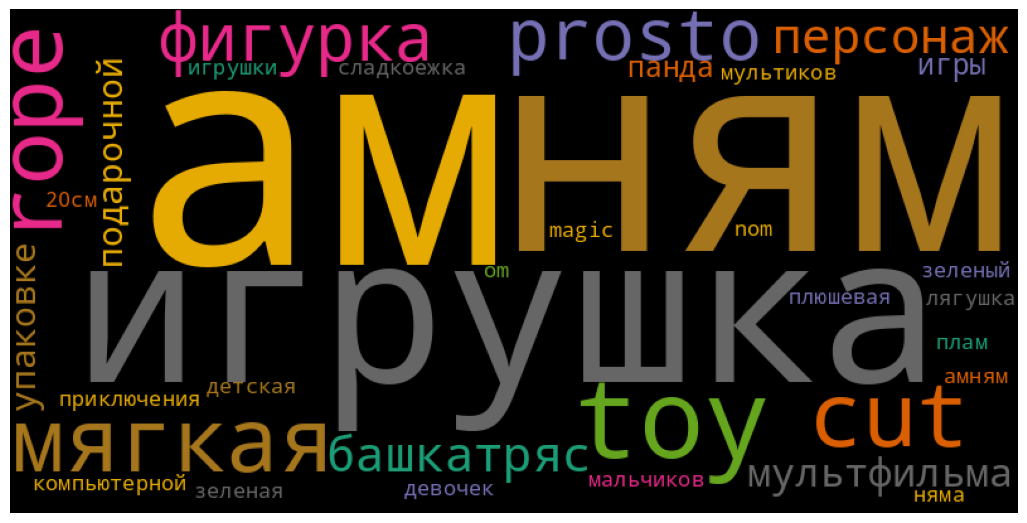

In [308]:
#Создаем объект WordCloud с заданными параметрами word_cloud_nazvanie
word_cloud_nazvanie = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_nazvanie)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_nazvanie)
plt.axis("off")

In [309]:
#создаем и обьединяем стеки copydata_opisanie
def stack_concat_opisanie():
  stack1_opisanie=copydata_opisanie['описание1'].apply(pd.Series).stack()
  stack2_opisanie=copydata_opisanie['описание2'].apply(pd.Series).stack()
  temp_opisanie=pd.concat([stack1_opisanie,stack2_opisanie])
  return temp_opisanie
ct_opisanie=stack_concat_opisanie()
stacked_opisanie=ct_opisanie.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

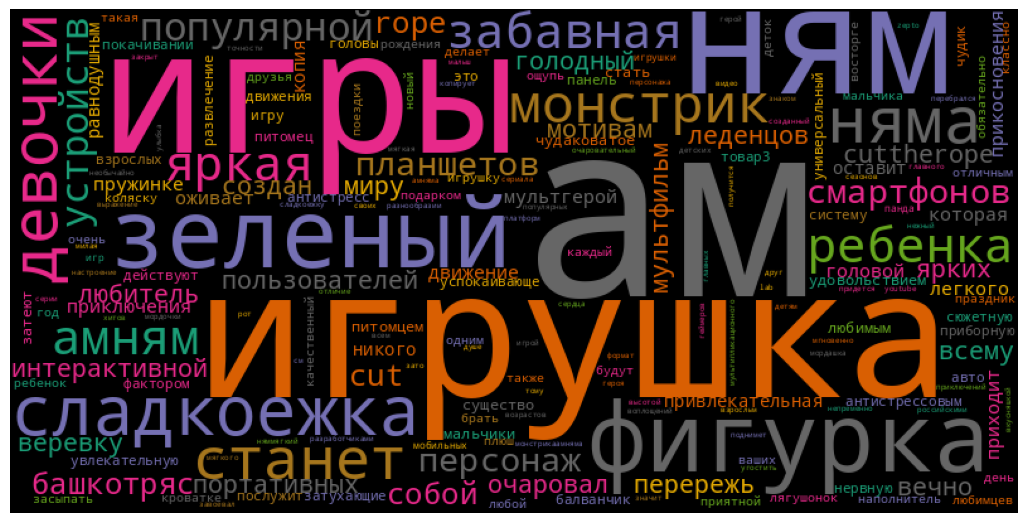

In [310]:
#Создаем объект WordCloud с заданными параметрами word_cloud_opisanie
word_cloud_opisanie = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_opisanie)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_opisanie)
plt.axis("off")

In [311]:
#создаем и обьединяем стеки tip
def stack_concat_tip():
  stack1_tip=copydata['тип1'].apply(pd.Series).stack()
  stack2_tip=copydata['тип2'].apply(pd.Series).stack()
  temp_tip=pd.concat([stack1_tip,stack2_tip])
  return temp_tip
ct_tip=stack_concat_tip()
stacked_tip=ct_tip.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

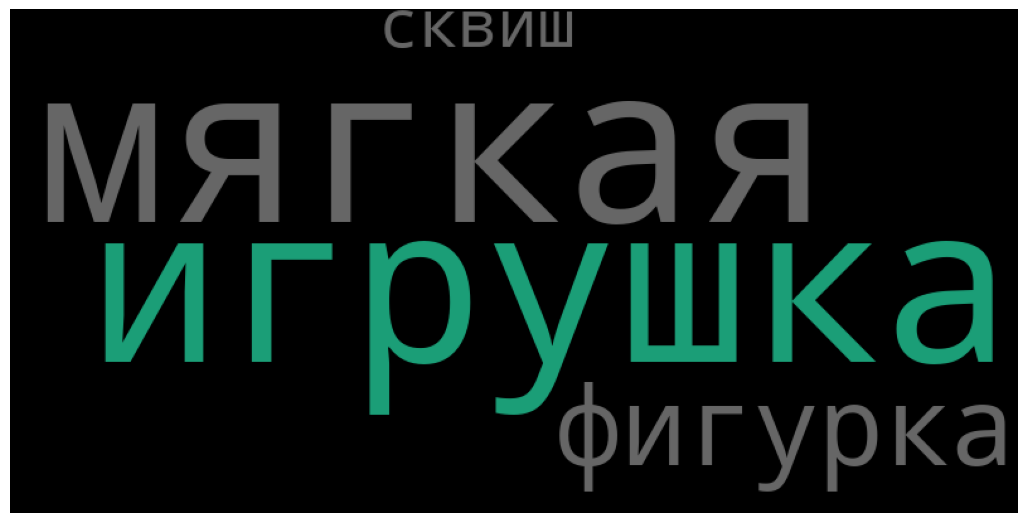

In [312]:
#Создаем объект WordCloud с заданными параметрами word_cloud_tip
word_cloud_tip = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_tip)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_tip)
plt.axis("off")

In [313]:
#создаем и обьединяем стеки material
def stack_concat_material():
  stack1_material=copydata['материал1'].apply(pd.Series).stack()
  stack2_material=copydata['материал2'].apply(pd.Series).stack()
  temp_material=pd.concat([stack1_material,stack2_material])
  return temp_material
ct_material=stack_concat_material()
stacked_material=ct_material.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

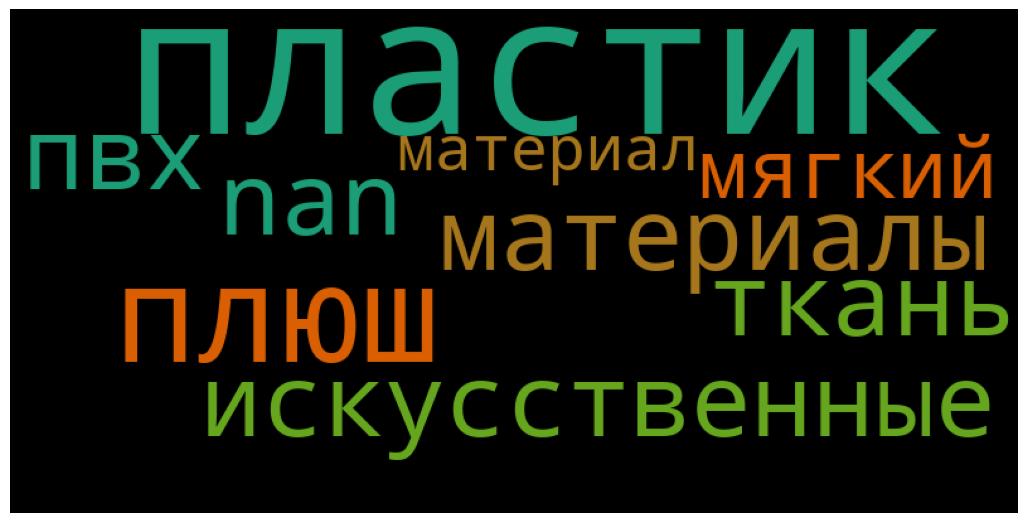

In [314]:
#Создаем объект WordCloud с заданными параметрами word_cloud_material
word_cloud_material = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_material)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_material)
plt.axis("off")

In [315]:
#создаем и обьединяем стеки vid_igrushki
def stack_concat_vid_igrushki():
  stack1_vid_igrushki=copydata['вид_игрушки1'].apply(pd.Series).stack()
  stack2_vid_igrushki=copydata['вид_игрушки2'].apply(pd.Series).stack()
  temp_vid_igrushki=pd.concat([stack1_vid_igrushki,stack2_vid_igrushki])
  return temp_vid_igrushki
ct_vid_igrushki=stack_concat_vid_igrushki()
stacked_vid_igrushki=ct_vid_igrushki.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

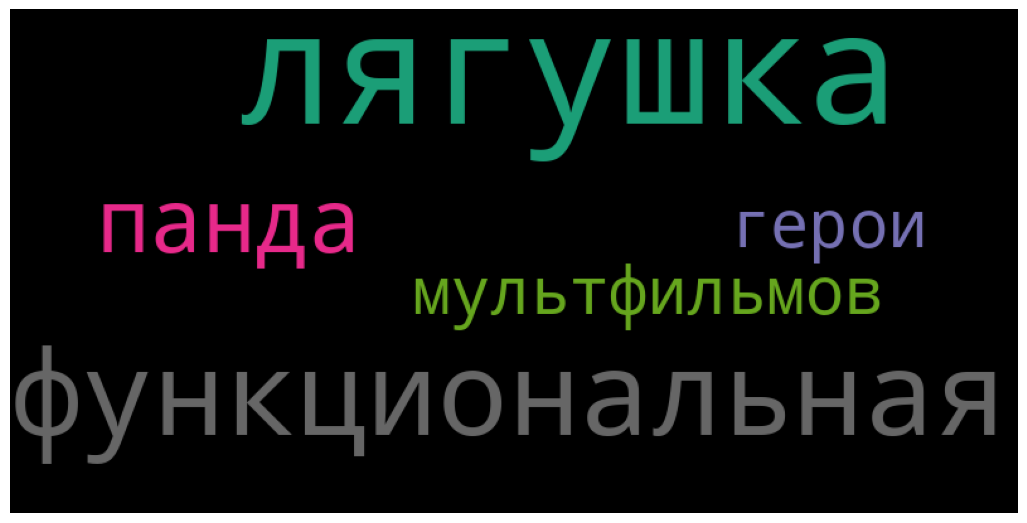

In [316]:
#Создаем объект WordCloud с заданными параметрами word_cloud_vid_igrushki
word_cloud_vid_igrushki = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_vid_igrushki)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_vid_igrushki)
plt.axis("off")

In [317]:
#создаем и обьединяем стеки color
def stack_concat_tsvet():
  stack1_tsvet=copydata['цвет1'].apply(pd.Series).stack()
  stack2_tsvet=copydata['цвет2'].apply(pd.Series).stack()
  temp_tsvet=pd.concat([stack1_tsvet,stack2_tsvet])
  return temp_tsvet
ct_tsvet=stack_concat_tsvet()
stacked_tsvet=ct_tsvet.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

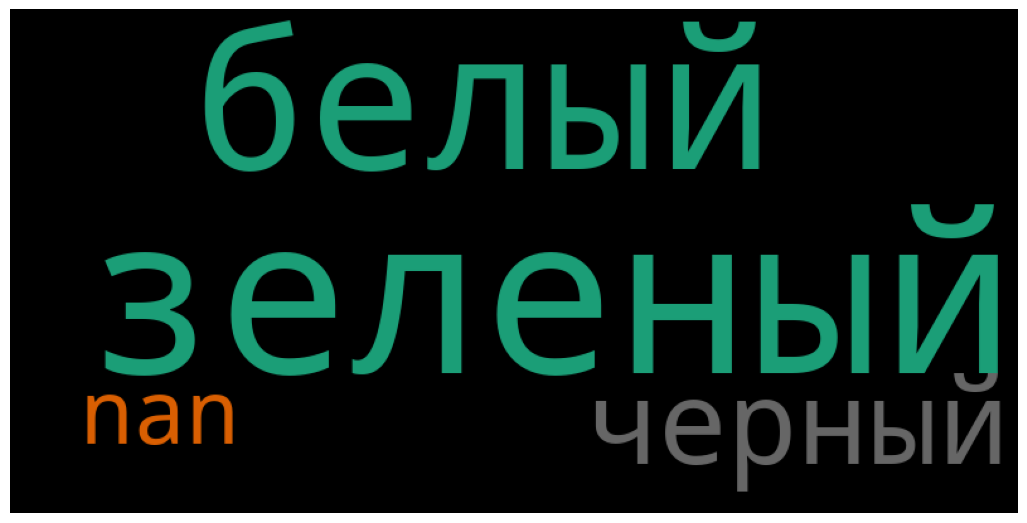

In [318]:
#Создаем объект WordCloud с заданными параметрами word_cloud_tsvet
word_cloud_tsvet = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_tsvet)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_tsvet)
plt.axis("off")

In [319]:
#создаем и обьединяем стеки dop_funkcii
def stack_concat_dop_funkcii():
  stack1_dop_funkcii=copydata['доп_функции1'].apply(pd.Series).stack()
  stack2_dop_funkcii=copydata['доп_функции2'].apply(pd.Series).stack()
  temp_dop_funkcii=pd.concat([stack1_dop_funkcii,stack2_dop_funkcii])
  return temp_dop_funkcii
ct_dop_funkcii=stack_concat_dop_funkcii()
stacked_dop_funkcii=ct_dop_funkcii.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

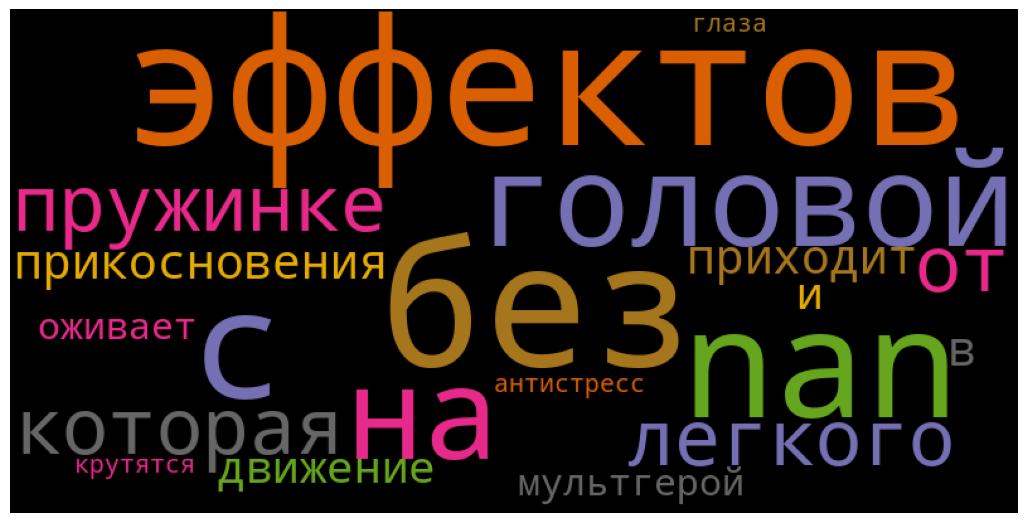

In [320]:
#Создаем объект WordCloud с заданными параметрами word_cloud_dop_funkcii
word_cloud_dop_funkcii = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_dop_funkcii)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_dop_funkcii)
plt.axis("off")

In [321]:
#создаем и обьединяем стеки trana_isgotovitel
def stack_concat_strana_isgotovitel():
  stack1_strana_isgotovitel=copydata['страна_изготовитель1'].apply(pd.Series).stack()
  stack2_strana_isgotovitel=copydata['страна_изготовитель2'].apply(pd.Series).stack()
  temp_strana_isgotovitel=pd.concat([stack1_strana_isgotovitel,stack2_strana_isgotovitel])
  return temp_strana_isgotovitel
ct_strana_isgotovitel=stack_concat_strana_isgotovitel()
stacked_strana_isgotovitel=ct_strana_isgotovitel.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

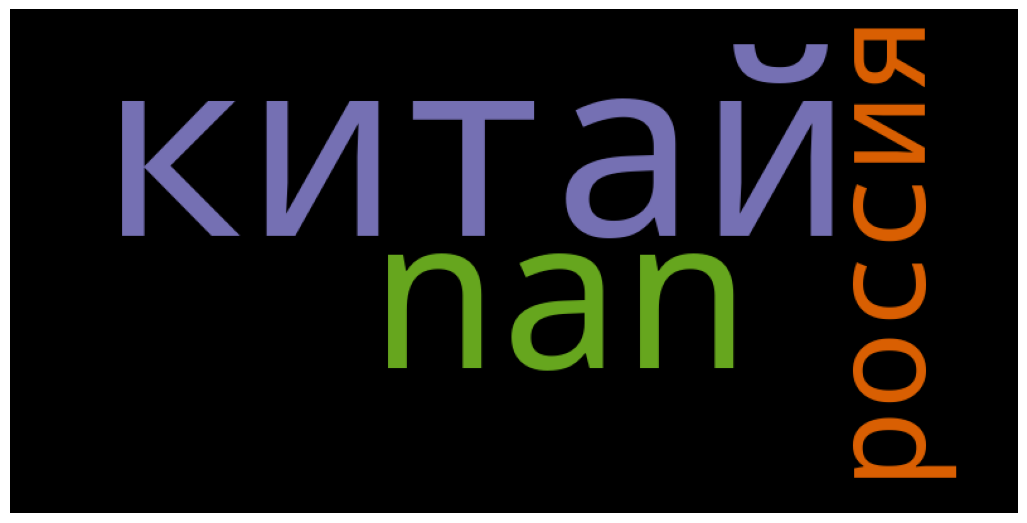

In [322]:
#Создаем объект WordCloud с заданными параметрами word_cloud_strana_isgotovitel
word_cloud_strana_isgotovitel = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_strana_isgotovitel)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_strana_isgotovitel)
plt.axis("off")

In [323]:
#создаем и обьединяем стеки min_vozrast
def stack_concat_min_vozrast():
  stack1_min_vozrast=copydata['мин_возраст1'].apply(pd.Series).stack()
  stack2_min_vozrast=copydata['мин_возраст2'].apply(pd.Series).stack()
  temp_min_vozrast=pd.concat([stack1_min_vozrast,stack2_min_vozrast])
  return temp_min_vozrast
ct_min_vozrast=stack_concat_min_vozrast()
stacked_min_vozrast=ct_min_vozrast.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

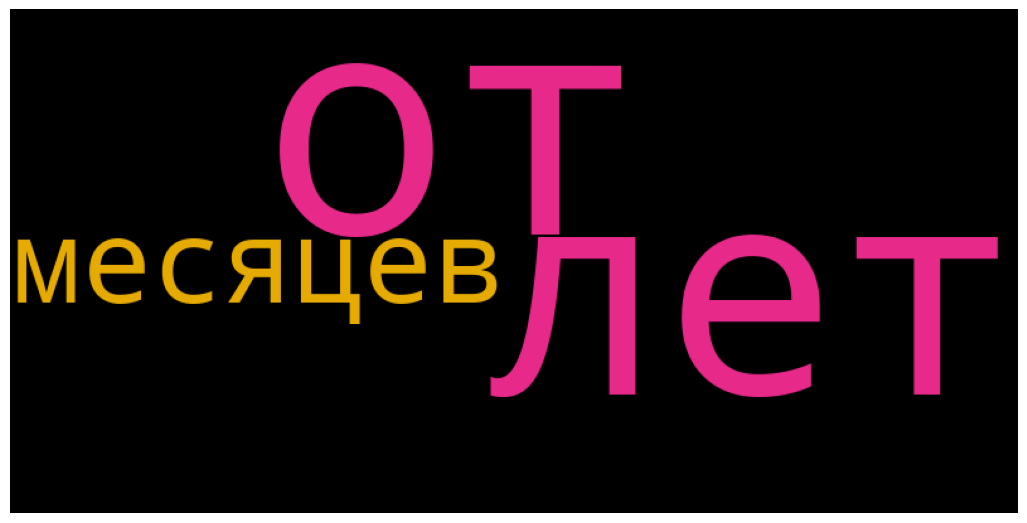

In [324]:
#Создаем объект WordCloud с заданными параметрами word_cloud_min_vozrast
word_cloud_min_vozrast = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_min_vozrast)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_min_vozrast)
plt.axis("off")

In [325]:
#создаем и обьединяем стеки personaz
def stack_concat_personaz():
  stack1_personaz=copydata['персонаж1'].apply(pd.Series).stack()
  stack2_personaz=copydata['персонаж2'].apply(pd.Series).stack()
  temp_personaz=pd.concat([stack1_personaz,stack2_personaz])
  return temp_personaz
ct_personaz=stack_concat_personaz()
stacked_personaz=ct_personaz.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

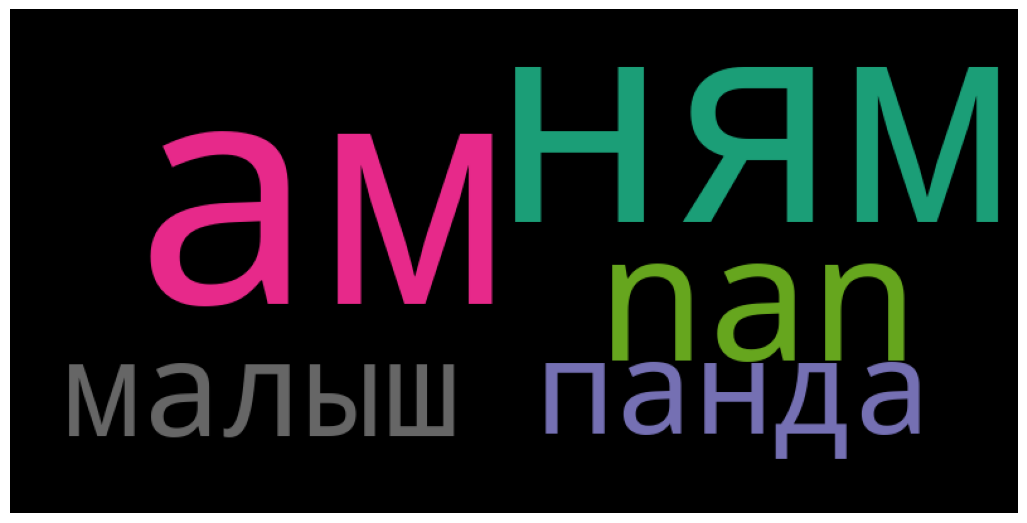

In [326]:
#Создаем объект WordCloud с заданными параметрами word_cloud_personaz
word_cloud_personaz = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_personaz)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_personaz)
plt.axis("off")

In [327]:
#создаем и обьединяем стеки sex
def stack_concat_pol():
  stack1_pol=copydata['пол_1'].apply(pd.Series).stack()
  stack2_pol=copydata['пол2'].apply(pd.Series).stack()
  temp_pol=pd.concat([stack1_pol,stack2_pol])
  return temp_pol
ct_pol=stack_concat_pol()
stacked_pol=ct_pol.str.cat(sep=' ')


(-0.5, 799.5, 399.5, -0.5)

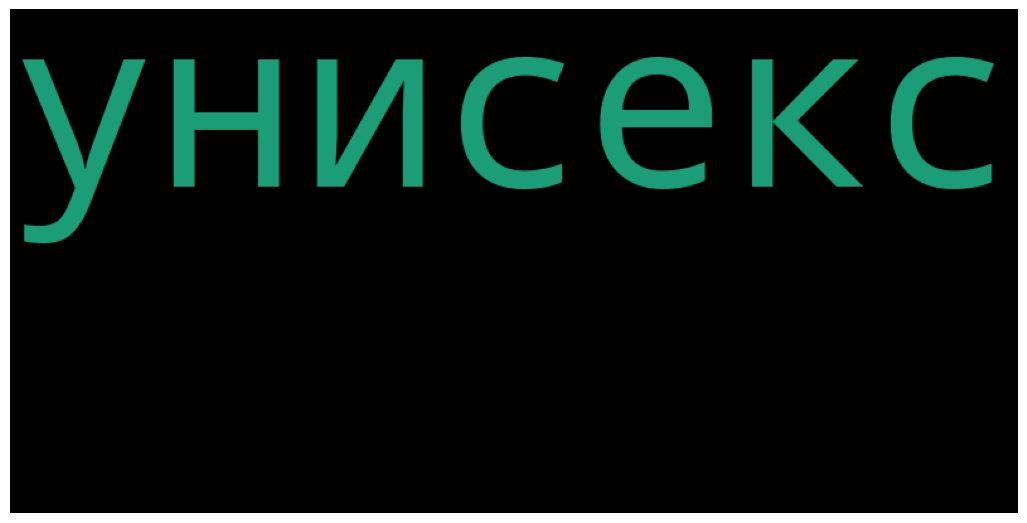

In [328]:
#Создаем объект WordCloud с заданными параметрами word_cloud_pol
word_cloud_pol = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_pol)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_pol)
plt.axis("off")

In [329]:
#создаем и обьединяем стеки Brend
def stack_concat_Brend():
  stack1_Brend=copydata['бренд1'].apply(pd.Series).stack()
  stack2_Brend=copydata['бренд2'].apply(pd.Series).stack()
  temp_Brend=pd.concat([stack1_Brend,stack2_Brend])
  return temp_Brend
ct_Brend=stack_concat_Brend()
stacked_Brend=ct_Brend.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

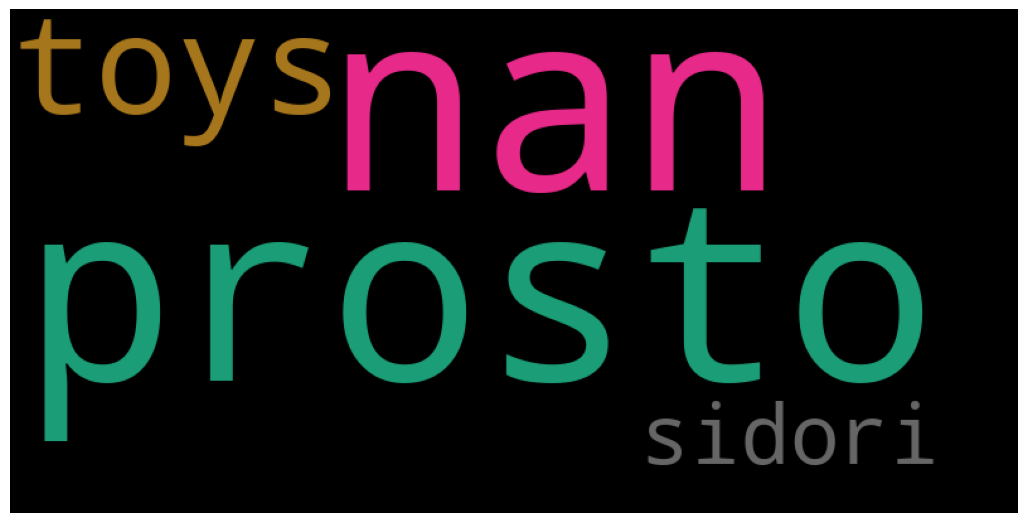

In [330]:
#Создаем объект WordCloud с заданными параметрами word_cloud_Brend
word_cloud_Brend = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_Brend)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_Brend)
plt.axis("off")

In [331]:
#создаем и обьединяем стеки charackteristiki_menshe10_
def stack_concat_charackteristiki_menshe10_():
  stack1_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_1'].apply(pd.Series).stack()
  stack2_charackteristiki_menshe10_=copydata['Характеристики отсутствующие значения <10%_2'].apply(pd.Series).stack()
  temp_charackteristiki_menshe10_=pd.concat([stack1_charackteristiki_menshe10_,stack2_charackteristiki_menshe10_])
  return temp_charackteristiki_menshe10_
ct_charackteristiki_menshe10_=stack_concat_charackteristiki_menshe10_()
stacked_charackteristiki_menshe10_=ct_charackteristiki_menshe10_.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

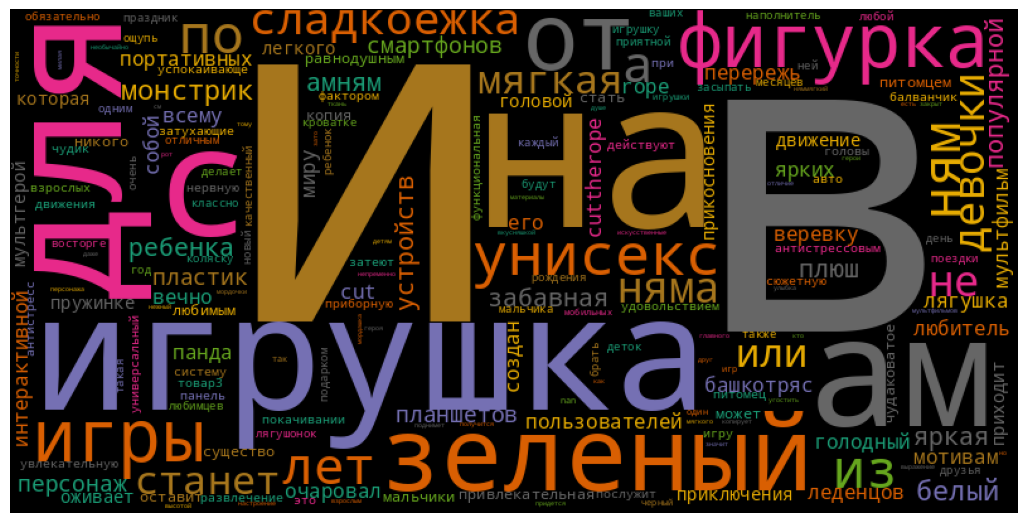

In [332]:
#Создаем объект WordCloud с заданными параметрами word_cloud_charackteristiki_menshe10_
word_cloud_charackteristiki_menshe10_ = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_charackteristiki_menshe10_)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_charackteristiki_menshe10_)
plt.axis("off")

In [333]:
#создаем и обьединяем стеки charackteristiki_bolshe10_
def stack_concat_charackteristiki_bolshe10_():
  stack1_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_1'].apply(pd.Series).stack()
  stack2_charackteristiki_bolshe10_=copydata['Характеристики отсутствующие значения >10%_2'].apply(pd.Series).stack()
  temp_charackteristiki_bolshe10_=pd.concat([stack1_charackteristiki_bolshe10_,stack2_charackteristiki_bolshe10_])
  return temp_charackteristiki_bolshe10_
ct_charackteristiki_bolshe10_=stack_concat_charackteristiki_bolshe10_()
stacked_charackteristiki_bolshe10_=ct_charackteristiki_bolshe10_.str.cat(sep=' ')

(-0.5, 799.5, 399.5, -0.5)

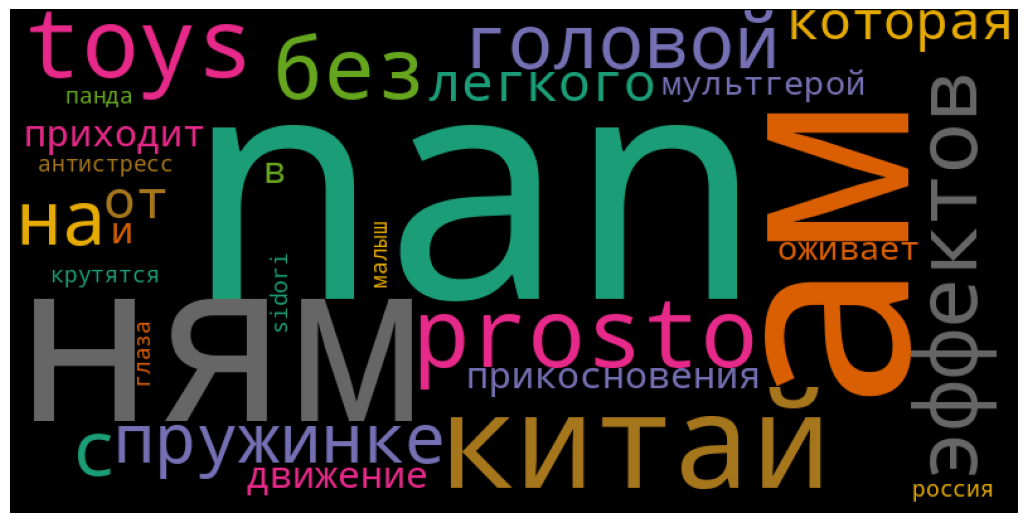

In [334]:
#Создаем объект WordCloud с заданными параметрами word_cloud_charackteristiki_bolshe10_
word_cloud_charackteristiki_bolshe10_ = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked_charackteristiki_bolshe10_)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud_charackteristiki_bolshe10_)
plt.axis("off")

___
**Распределение частоты**

**Графики частотного распределения для отображения встречаемости слов и различий**

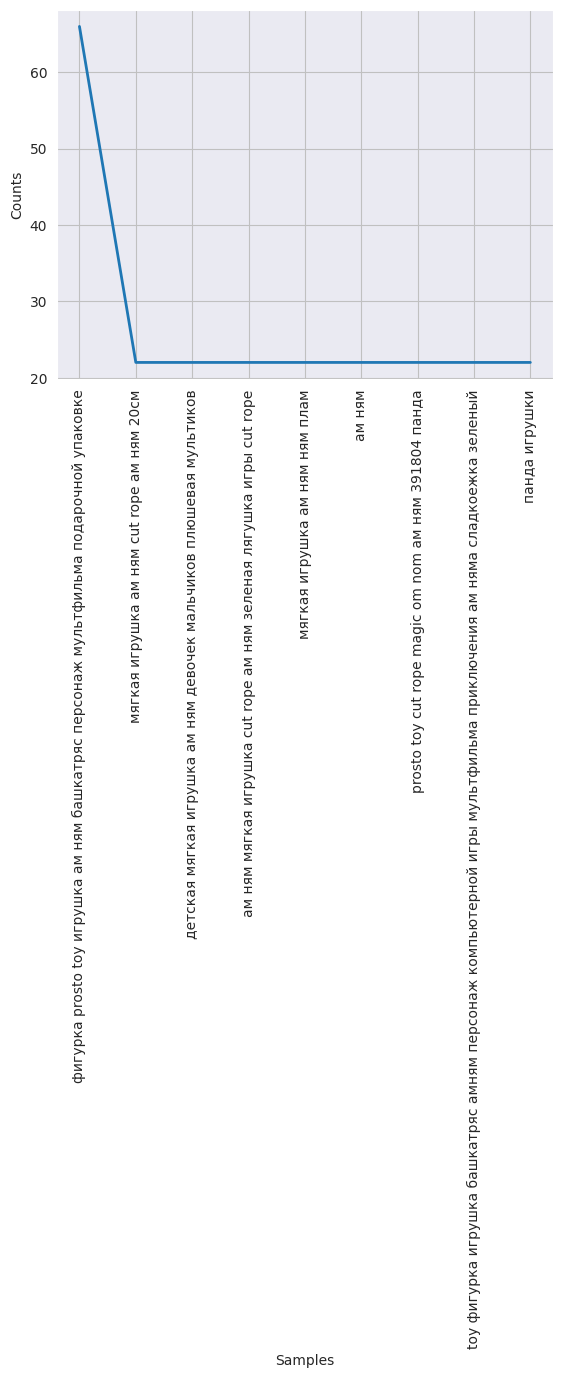

In [335]:
sns.set_style('darkgrid')
nlp_words_nazvanie=nltk.FreqDist(ct_nazvanie)
nlp_words_nazvanie.plot(20);

In [917]:
#выводим 10 наиболее часто встречающихся элементов с помощью метода most_common(10)
counts_nazvanie = Counter(ct_nazvanie)
print(counts_nazvanie.most_common(10))

[('фигурка prosto toy игрушка ам ням башкатряс персонаж мультфильма подарочной упаковке', 66), ('мягкая игрушка ам ням cut rope ам ням 20см', 22), ('детская мягкая игрушка ам ням девочек мальчиков плюшевая мультиков', 22), ('ам ням мягкая игрушка cut rope ам ням зеленая лягушка игры cut rope', 22), ('мягкая игрушка ам ням ням плам', 22), ('ам ням', 22), ('prosto toy cut rope magic om nom ам ням 391804 панда', 22), ('toy фигурка игрушка башкатряс амням персонаж компьютерной игры мультфильма приключения ам няма сладкоежка зеленый', 22), ('панда игрушки', 22)]


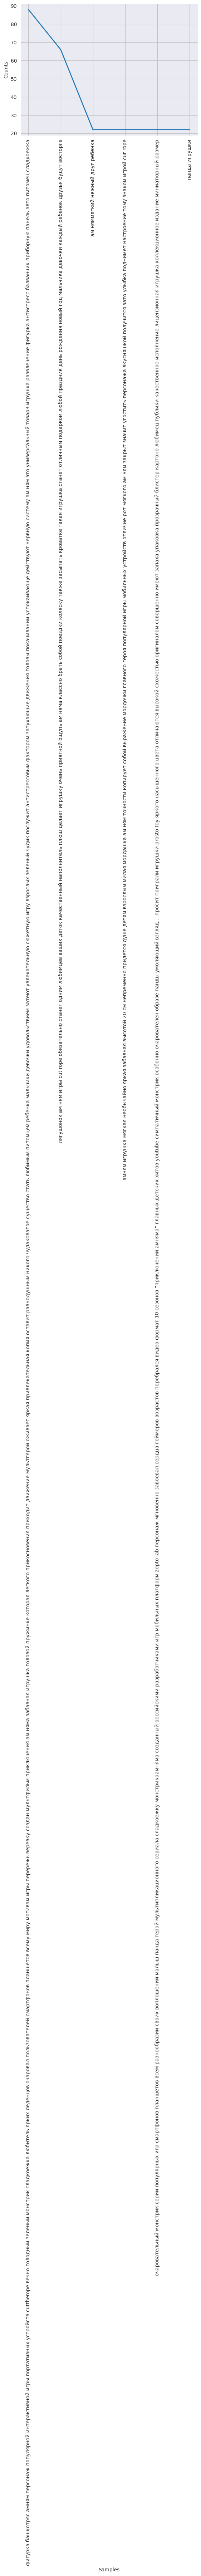

In [918]:
sns.set_style('darkgrid')
nlp_words_opisanie=nltk.FreqDist(ct_opisanie)
nlp_words_opisanie.plot(20);

In [919]:
counts_opisanie = Counter(ct_opisanie)
print(counts_opisanie.most_common(10))

[('фигурка башкотряс амням персонаж популярной интерактивной игры портативных устройств cuttherope вечно голодный зеленый монстрик сладкоежка любитель ярких леденцов очаровал пользователей смартфонов планшетов всему миру мотивам игры перережь веревку создан мультфильм приключения ам няма забавная игрушка головой пружинке которая легкого прикосновения приходит движение мультгерой оживает яркая привлекательная копия оставит равнодушным никого чудаковатое существо стать любимым питомцем ребенка мальчики девочки удовольствием затеют увлекательную сюжетную игру взрослых зеленый чудик послужит антистрессовым фактором затухающие движения головы покачивании успокаивающе действуют нервную систему ам ням это универсальный товар3 игрушка развлечение фигурка антистресс балванчик приборную панель авто питомец сладкоежка', 88), ('лягушонок ам ням игры cut rope обязательно станет одним любимцев ваших деток качественный наполнитель плюш делает игрушку очень приятной ощупь ам няма классно брать собой п

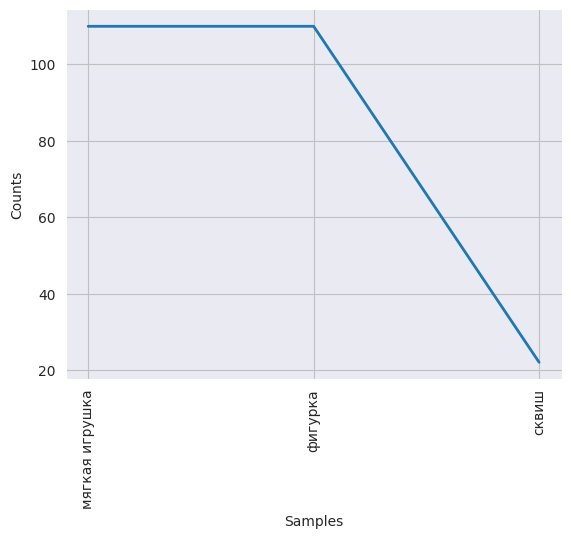

In [336]:
sns.set_style('darkgrid')
nlp_words_tip=nltk.FreqDist(ct_tip)
nlp_words_tip.plot(20);

In [337]:
counts_tip = Counter(ct_tip)
print(counts_tip.most_common(10))

[('мягкая игрушка', 110), ('фигурка', 110), ('сквиш', 22)]


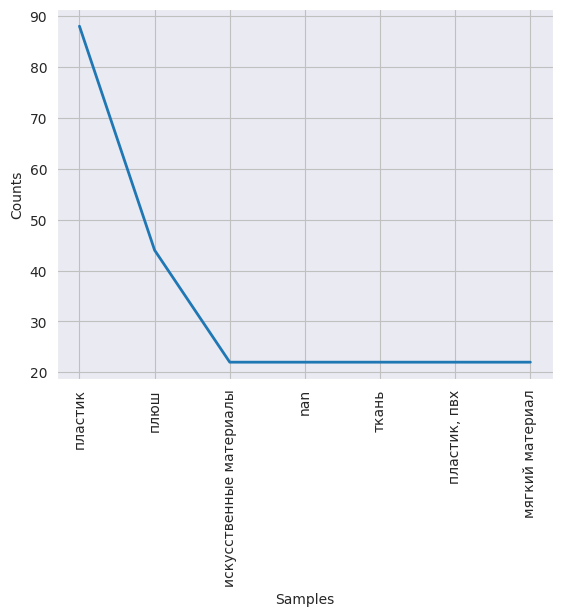

In [338]:
sns.set_style('darkgrid')
nlp_words_material=nltk.FreqDist(ct_material)
nlp_words_material.plot(20);


In [339]:
counts_material = Counter(ct_material)
print(counts_material.most_common(10))

[('пластик', 88), ('плюш', 44), ('искусственные материалы', 22), ('nan', 22), ('ткань', 22), ('пластик, пвх', 22), ('мягкий материал', 22)]


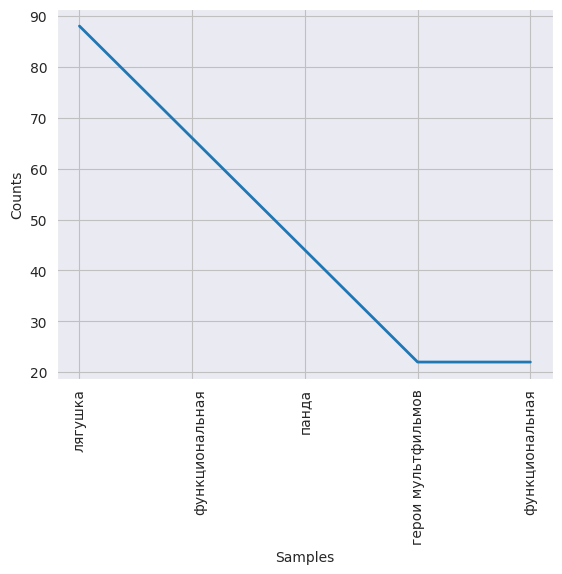

In [340]:
sns.set_style('darkgrid')
nlp_words_vid_igrushki=nltk.FreqDist(ct_vid_igrushki)
nlp_words_vid_igrushki.plot(20);

In [341]:
counts_vid_igrushki = Counter(ct_vid_igrushki)
print(counts_vid_igrushki.most_common(10))

[('лягушка', 88), ('\nфункциональная', 66), ('панда', 44), ('герои мультфильмов', 22), ('функциональная', 22)]


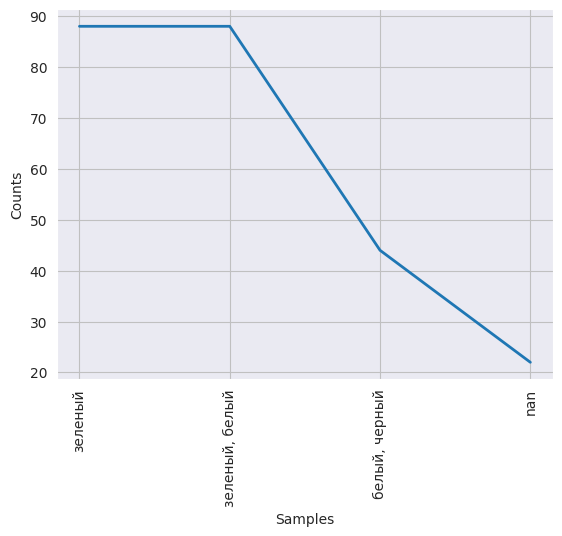

In [342]:
sns.set_style('darkgrid')
nlp_words_tsvet=nltk.FreqDist(ct_tsvet)
nlp_words_tsvet.plot(20);

In [343]:
counts_tsvet = Counter(ct_tsvet)
print(counts_tsvet.most_common(10))

[('зеленый', 88), ('зеленый, белый', 88), ('белый, черный', 44), ('nan', 22)]


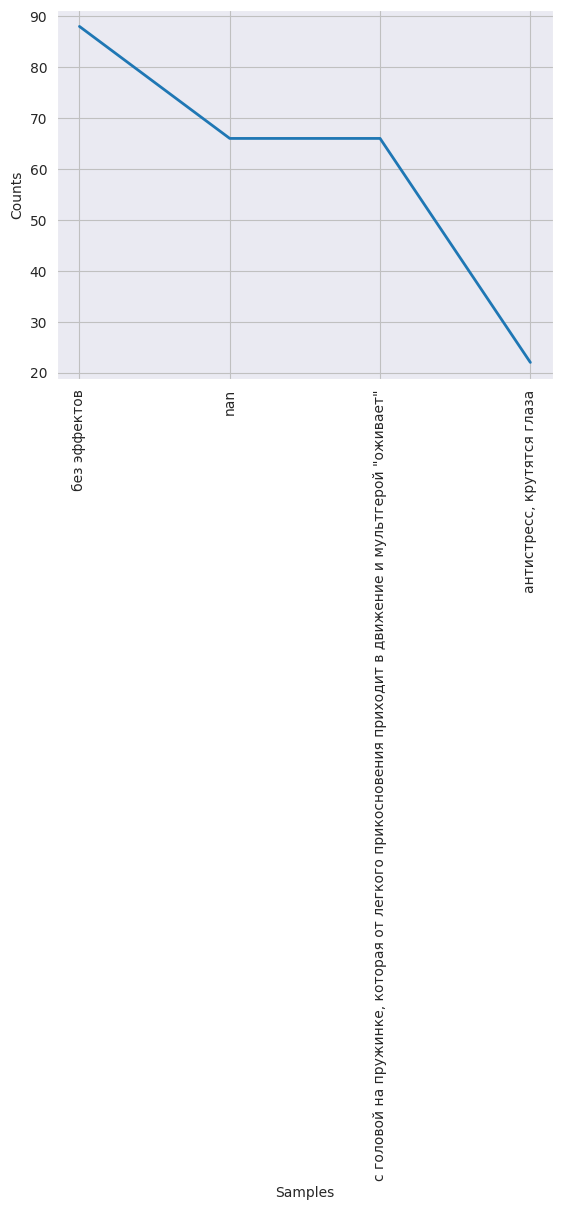

In [344]:
sns.set_style('darkgrid')
nlp_words_dop_funkcii=nltk.FreqDist(ct_dop_funkcii)
nlp_words_dop_funkcii.plot(20);

In [345]:
counts_dop_funkcii = Counter(ct_dop_funkcii)
print(counts_dop_funkcii.most_common(10))

[('без эффектов', 88), ('nan', 66), ('с головой на пружинке, которая от легкого прикосновения приходит в движение и мультгерой "оживает"', 66), ('антистресс, крутятся глаза', 22)]


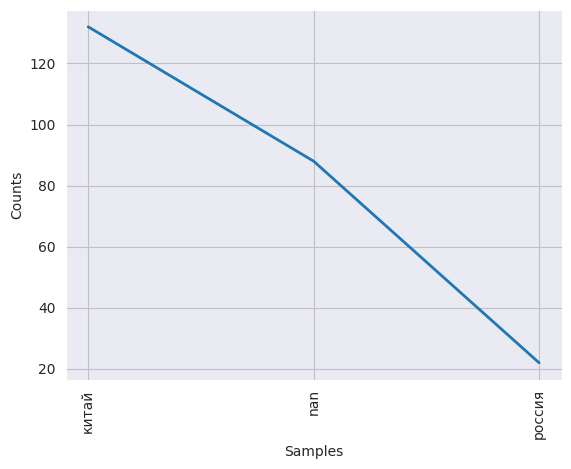

In [346]:
sns.set_style('darkgrid')
nlp_words_strana_isgotovitel=nltk.FreqDist(ct_strana_isgotovitel)
nlp_words_strana_isgotovitel.plot(20);

In [347]:
counts_strana_isgotovitel = Counter(ct_strana_isgotovitel)
print(counts_strana_isgotovitel.most_common(10))

[('китай', 132), ('nan', 88), ('россия', 22)]


In [348]:
counts_min_vozrast = Counter(ct_min_vozrast)
print(counts_min_vozrast.most_common(10))

[('от 3 лет', 132), ('10 месяцев', 44), ('от 2 лет', 44), ('0 месяцев', 22)]


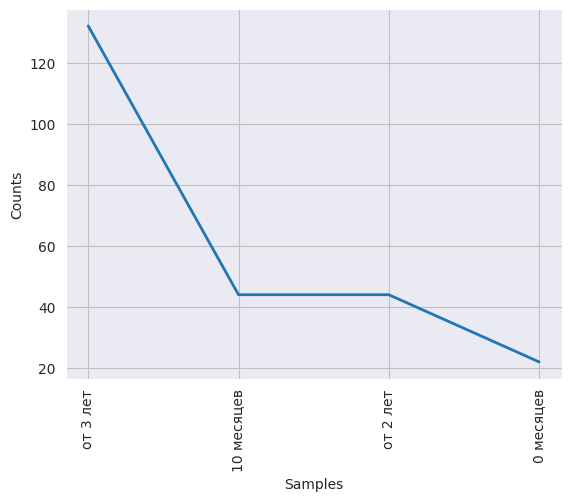

In [349]:
sns.set_style('darkgrid')
nlp_words_min_vozrast=nltk.FreqDist(ct_min_vozrast)
nlp_words_min_vozrast.plot(20);

In [350]:
counts_personaz = Counter(ct_personaz)
print(counts_personaz.most_common(10))

[('ам ням', 176), ('nan', 44), ('малыш панда, ам ням', 22)]


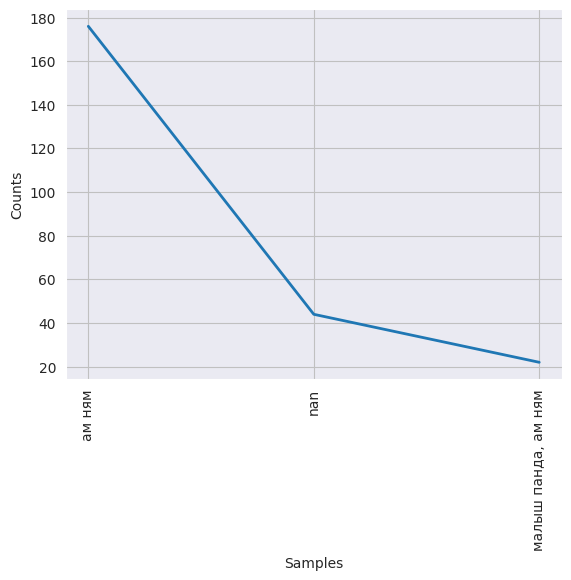

In [351]:
sns.set_style('darkgrid')
nlp_words_personaz=nltk.FreqDist(ct_personaz)
nlp_words_personaz.plot(20);

In [352]:
counts_pol = Counter(ct_pol)
print(counts_pol.most_common(10))

[('унисекс', 242)]


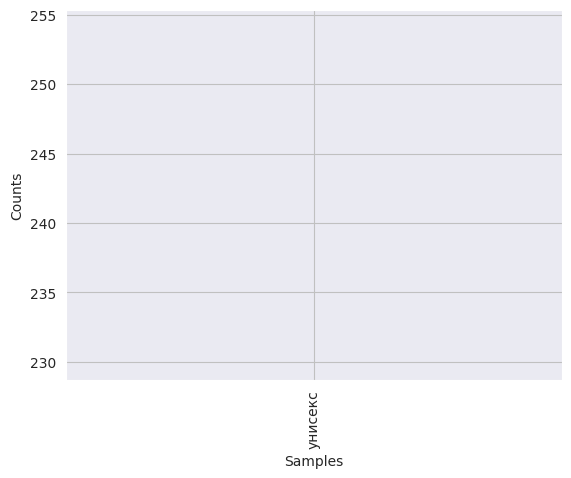

In [353]:
sns.set_style('darkgrid')
nlp_words_pol=nltk.FreqDist(ct_pol)
nlp_words_pol.plot(20);

In [354]:
counts_Brend = Counter(ct_Brend)
print(counts_Brend.most_common(10))

[('nan', 110), ('prosto toys', 110), ('sidori', 22)]


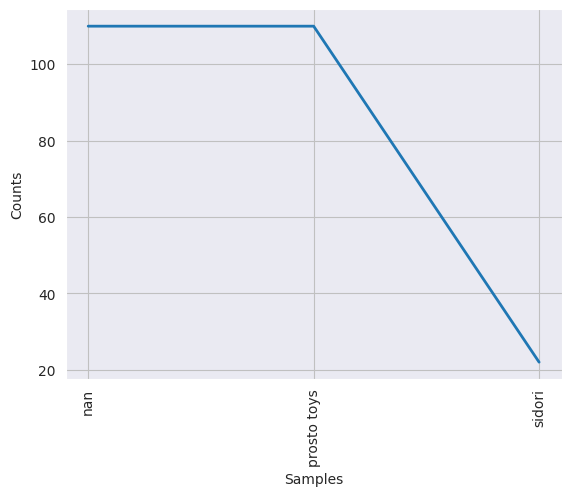

In [355]:
sns.set_style('darkgrid')
nlp_words_Brend=nltk.FreqDist(ct_Brend)
nlp_words_Brend.plot(20);


In [356]:
counts_charackteristiki_menshe10_ = Counter(ct_charackteristiki_menshe10_)
print(counts_charackteristiki_menshe10_.most_common(10))

[('фигурка-башкотряс амням персонаж популярной интерактивной игры для портативных устройств "cuttherope". вечно-голодный зеленый монстрик сладкоежка, любитель ярких леденцов, очаровал пользователей смартфонов и планшетов по всему миру. по мотивам игры "перережь веревку" создан мультфильм "приключения ам няма". забавная игрушка с головой на пружинке, которая от легкого прикосновения приходит в движение и мультгерой "оживает". яркая привлекательная копия не оставит равнодушным никого. чудаковатое существо может стать любимым питомцем ребенка. мальчики и девочки с удовольствием затеют увлекательную сюжетную игру. а для взрослых зеленый чудик послужит антистрессовым фактором. затухающие движения головы при покачивании успокаивающе действуют на нервную систему. ам ням -это универсальный товар3 в 1. игрушка- развлечение, фигурка антистресс, балванчик на приборную панель авто ,питомец-сладкоежка. фигурка пластик \nфункциональная зеленый, белый от 3 лет унисекс', 66), ('лягушонок ам ням из игр

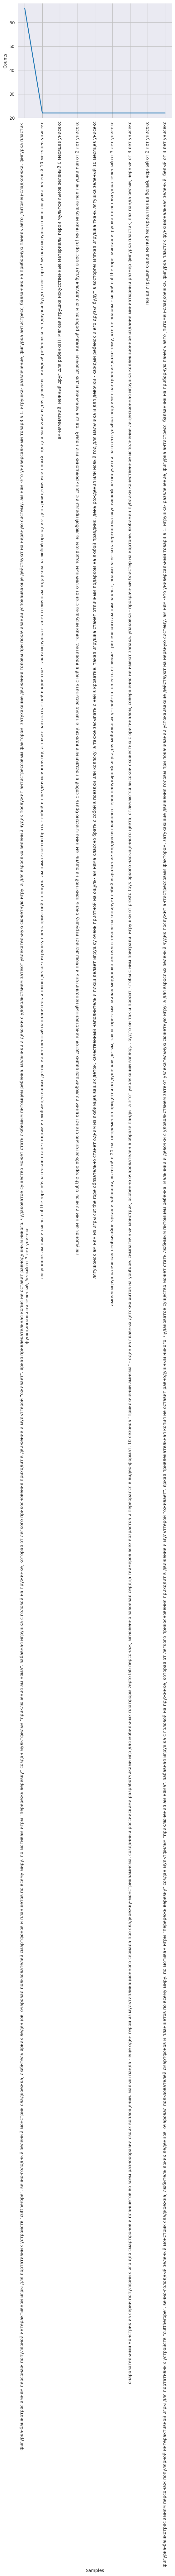

<Axes: xlabel='Samples', ylabel='Counts'>

In [357]:
sns.set_style('darkgrid')
nlp_words_charackteristiki_menshe10_=nltk.FreqDist(ct_charackteristiki_menshe10_)
nlp_words_charackteristiki_menshe10_.plot(20)

In [358]:
counts_charackteristiki_bolshe10_ = Counter(ct_charackteristiki_bolshe10_)
print(counts_charackteristiki_bolshe10_.most_common(10))

[('без эффектов китай ам ням nan', 44), ('nan nan ам ням nan', 44), ('с головой на пружинке, которая от легкого прикосновения приходит в движение и мультгерой "оживает" китай ам ням prosto toys', 44), ('без эффектов китай nan sidori', 22), ('без эффектов nan малыш панда, ам ням prosto toys', 22), ('с головой на пружинке, которая от легкого прикосновения приходит в движение и мультгерой "оживает" россия ам ням prosto toys', 22), ('антистресс, крутятся глаза китай nan nan', 22), ('nan nan ам ням prosto toys', 22)]


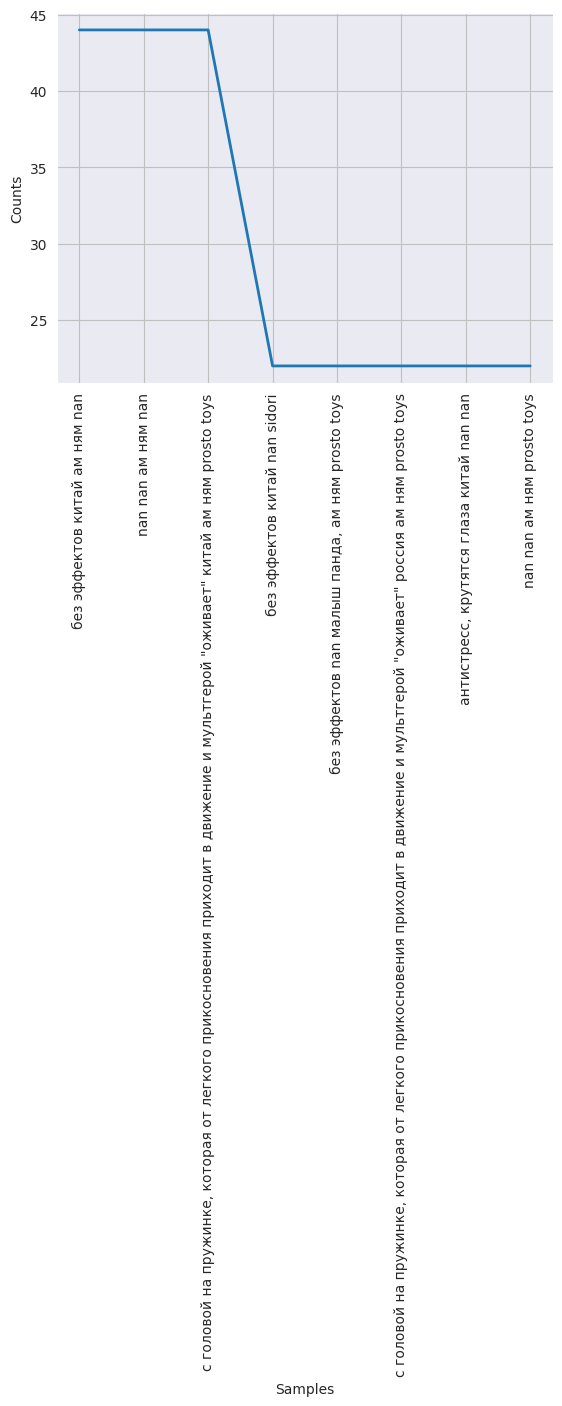

In [359]:
sns.set_style('darkgrid')
nlp_words_charackteristiki_bolshe10_=nltk.FreqDist(ct_charackteristiki_bolshe10_)
nlp_words_charackteristiki_bolshe10_.plot(20);

**Vecotrizer и подобие косинуса**

In [360]:
bow_converter = CountVectorizer()
copydata_nazvanie.pipe(detoken).pipe(remove_space)
similarity_nazvanie=[]
similarity_nazvanie = count_vcr_nazvanie()
data_cvr_nazvanie=copydata_nazvanie.copy()
data_cvr_nazvanie['Similarity_название']=similarity_nazvanie

KeyError: ignored

In [ ]:
def remove_punc(copydata):
  pattern = r'[' + string.punctuation + ']'
  copydata['название1']=data['название1'].map(lambda m:re.sub(pattern," ",m))
  copydata['название2']=data['название2'].map(lambda m:re.sub(pattern," ",m))
  return copydata


def lower(copydata):
  copydata['название1']=copydata['название1'].map(lambda m:m.lower())
  copydata['название2']=copydata['название2'].map(lambda m:m.lower())
  return copydata


def tokenization(text):
    tokens = re.split(' ',text)
    return tokens

def token(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: tokenization(x))
  copydata['название2']= copydata['название2'].apply(lambda x: tokenization(x))
  return copydata

#from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")

sw=nltk.corpus.stopwords.words('russian')

def remove_SW(copydata):
   copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item not in sw])
   copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item not in sw])
   return copydata


def remove_digits(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if not item.isdigit()])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if not item.isdigit()])
  return copydata


lemmatizer = WordNetLemmatizer()

def lemmatize(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  copydata['название2']=copydata['название2'].apply(lambda x: [lemmatizer.lemmatize(item) for item in x])
  return copydata


def remove_empty_tokens(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if item !=''])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if item !=''])
  return copydata


def remove_single_letters(copydata):
  copydata['название1']=copydata['название1'].apply(lambda x: [item for item in x if len(item) > 1])
  copydata['название2']=copydata['название2'].apply(lambda x: [item for item in x if len(item) > 1])
  return copydata


def detoken(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  copydata['название2']= copydata['название2'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))
  return copydata

def replace_spaces(x,space,second):
  result = x.replace(space, second)
  return result
def remove_space(copydata):
  copydata['название1']= copydata['название1'].apply(lambda x: replace_spaces(x,'  ',' '))
  copydata['название2']= copydata['название2'].apply(lambda x: replace_spaces(x,'  ',' '))
  return copydata
def count_vcr():
  for i in range(len(copydata)):
    doc1=copydata['название1'][i]
    doc2=copydata['название2'][i]
    docs=(doc1,doc2)
    matrix = CountVectorizer().fit_transform(docs)
    cosine_sim = cosine_similarity(matrix[0], matrix[1])
    similarity.append(cosine_sim)
  return similarity

def similarity_fn():
  for i in range(len(copydata)):
    doc1=copydata['название1'][i]
    doc2=copydata['название2'][i]
    docs=(doc1,doc2)
    tfidf_matrix = tfidf_vectorizer.fit_transform(docs)
    cosine_sim = cosine_similarity(tfidf_matrix[0], tfidf_matrix[1])
    similarity.append(cosine_sim)
  return similarity

##Preprocessing Pipeline

In [ ]:
#copydata=copydata.pipe(remove_punc).pipe(token).pipe(remove_SW).pipe(remove_digits).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)
copydata=copydata.pipe(remove_punc).pipe(lower).pipe(token).pipe(remove_SW).pipe(lemmatize).pipe(remove_empty_tokens).pipe(remove_single_letters)

In [ ]:
#copydata[:5]
copydata[:5]

##Word Cloud

**Stack and Concatinate both texts creating a combined Word Cloud**

In [ ]:
def stack_concat():
  stack1=copydata['название1'].apply(pd.Series).stack()
  stack2=copydata['название2'].apply(pd.Series).stack()
  temp=pd.concat([stack1,stack2])
  return temp
ct=stack_concat()
stacked=ct.str.cat(sep=' ')

In [ ]:
word_cloud = WordCloud(width=800, height=400,colormap="Dark2",collocations=False,).generate(stacked)
plt.figure( figsize=(13,8) )
plt.imshow(word_cloud)
plt.axis("off")

##Frequency Distribution

**Frequency Distribution Graph to Display Word Occurrence and Differences**

In [ ]:
sns.set_style('darkgrid')
nlp_words=nltk.FreqDist(ct)
nlp_words.plot(20);

In [ ]:
counts = Counter(ct)
print(counts.most_common(10))

##Count Vecotrizer and Cosine Similarity

In [ ]:
bow_converter = CountVectorizer()
copydata.pipe(detoken).pipe(remove_space)
similarity=[]
similarity=count_vcr()
data_cvr=copydata.copy()
data_cvr['Similarity_название']=similarity
data_cvr[:5]

##Tf-Idf Vecotrizer and Cosine Similarity

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
similarity=[]
similarity=similarity_fn()
data_tf=copydata.copy()
data_tf['Similarity']=similarity

In [ ]:
data_tf['Similarity_название'] = data_tf['Similarity']

##Combined Similarities

In [ ]:
all_data=data_cvr.copy()
all_data['Count-Vec Similarity_название']=all_data['Similarity_название']
all_data=all_data.drop('Similarity_название',axis=1)
all_data['Tf-idf Similarity_название']=data_tf['Similarity_название']

In [ ]:
all_data.head(5)